### Data Mining Project - XYZ Sports Company

**MSc:** Data Science and Advanced Analytics - Nova IMS <br>
**Course:** Data Mining <br>
Fall Semester 2023-2024 | Nova IMS

**Group members:** <br>
Flavio Ivo Riedlinger - 20230571 <br>
Mohammad Walihulla - 20230768 <br>



### Introduction



# 1. Import Packages:

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans


In [13]:
import warnings
# Suprimir FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 2. Import Dataset:

In [14]:
# Load DataFrame
data_original = pd.read_csv('xyz.csv', delimiter=';')

In [15]:
data=data_original.copy()

# 3. Exploratory Analysis:

In [16]:
data.head()

ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0  10000   60  Female  5500.0      2019-09-03       2019-10-31   
1  10001   29  Female  2630.0      2014-08-12       2015-09-14   
2  10002   23    Male  1980.0      2017-05-02       2017-06-01   
3  10003    9    Male     0.0      2018-09-05       2019-02-12   
4  10004   35    Male  4320.0      2016-04-20       2018-06-07   

  LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  ...  \
0      2019-07-01       2019-12-31    2019-10-30                     1  ...   
1      2015-01-01       2015-12-31    2015-07-16                    60  ...   
2      2017-01-01       2017-06-30    2017-05-25                     7  ...   
3      2018-07-01       2019-06-30    2019-01-21                    22  ...   
4      2018-01-01       2018-06-30    2017-11-09                   210  ...   

   OtherActivities  NumberOfFrequencies  AttendedClasses  \
0              0.0                  9.0                7   
1              0.0                 23.0                1   
2              0.0                  6.0                0   
3              0.0                 20.0                2   
4              NaN                 41.0                0   

   AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  RealNumberOfVisits  \
0                       NaN                        6.28                   2   
1                       2.0                       17.42                   1   
2                       7.0                       30.03                   6   
3                       2.0                       17.72                   3   
4                       7.0                       60.97                   0   

   NumberOfRenewals  HasReferences  NumberOfReferences  Dropout  
0                 0            0.0                   0        0  
1                 2            0.0                   0        1  
2                 0            0.0                   0        1  
3                 0            0.0                   0        1  
4                 3            0.0                   0        1  

[5 rows x 31 columns]

In [17]:
print('Dataset:','\nRows:', data.shape[0], '\nColumns:', data.shape[1])

Dataset: 
Rows: 14942 
Columns: 31


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [19]:
import pandas as pd

def describe_variables(df, include_non_numeric=False, exclude_zeros=False):
    # Create a DataFrame to store the information
    info_df = pd.DataFrame(columns=['Type', 'First Value', 'Count', 'Mean', 'Std', 'Min', 
                                    'Max', 'Quartiles', 'Null Count', 'Zero %', 'Empty %', 'NaN %', '? %'])

    # Iterate over columns
    for col in df.columns:
        data_type = df[col].dtype

        count = mean = std = min_value = max_value = quartiles = first_value = None

        if data_type in ['int64', 'float64']:
            count = df[col].count()
            mean = df[col].mean()
            std = df[col].std()
            min_value = df[col].min()
            max_value = df[col].max()
            quartiles = df[col].quantile([0.25, 0.5, 0.75]).to_dict()
            first_value = df[col].dropna().iloc[0]  # First non-NaN value

        if data_type == 'object':
            first_value = df[col].loc[df[col].ne('').idxmax()]  # First non-empty value

        null_count = df[col].isnull().sum()

        zero_count = df[df[col] == 0].shape[0] if exclude_zeros and data_type in ['int64', 'float64'] else 0
        empty_count = df[df[col] == ''].shape[0] if data_type == 'object' else 0
        nan_count = df[df[col].isna()].shape[0]
        question_count = df[df[col] == '?'].shape[0] if data_type == 'object' else 0

        total_count = len(df)
        zero_percent = (zero_count / total_count) * 100
        empty_percent = (empty_count / total_count) * 100
        nan_percent = (nan_count / total_count) * 100
        question_percent = (question_count / total_count) * 100

        info_df.loc[col] = [data_type, first_value, count, mean, std, min_value, 
                            max_value, quartiles, null_count, f'{zero_count} ({zero_percent:.2f}%)', 
                            f'{empty_count} ({empty_percent:.2f}%)', f'{nan_count} ({nan_percent:.2f}%)', 
                            f'{question_count} ({question_percent:.2f}%)']

    # Set the display width for columns
    pd.set_option('display.max_colwidth', 100)

    return info_df

# Usage:
# Replace 'data' with your actual DataFrame
# Set include_non_numeric=True to include non-numeric variables
# Set exclude_zeros=True to exclude zeros from zero count
result_df = describe_variables(data, include_non_numeric=True, exclude_zeros=True)
result_df



Type First Value  Count          Mean  \
ID                            int64       10000  14942  17470.500000   
Age                           int64          60  14942     26.015794   
Gender                       object      Female   None           NaN   
Income                      float64      5500.0  14447   2230.816086   
EnrollmentStart              object  2019-09-03   None           NaN   
EnrollmentFinish             object  2019-10-31   None           NaN   
LastPeriodStart              object  2019-07-01   None           NaN   
LastPeriodFinish             object  2019-12-31   None           NaN   
DateLastVisit                object  2019-10-30   None           NaN   
DaysWithoutFrequency          int64           1  14942     81.224936   
LifetimeValue               float64       89.35  14942    302.561871   
UseByTime                     int64           0  14942      0.047116   
AthleticsActivities         float64         0.0  14906      0.007380   
WaterActivities             float64         0.0  14905      0.296209   
FitnessActivities           float64         1.0  14907      0.576038   
DanceActivities             float64         0.0  14906      0.000000   
TeamActivities              float64         0.0  14907      0.055544   
RacketActivities            float64         0.0  14905      0.023415   
CombatActivities            float64         0.0  14909      0.107921   
NatureActivities            float64         0.0  14895      0.000000   
SpecialActivities           float64         0.0  14898      0.026514   
OtherActivities             float64         0.0  14907      0.001878   
NumberOfFrequencies         float64         9.0  14916     40.120542   
AttendedClasses               int64           7  14942     10.152456   
AllowedWeeklyVisitsBySLA    float64         2.0  14407      5.759561   
AllowedNumberOfVisitsBySLA  float64        6.28  14942     41.636299   
RealNumberOfVisits            int64           2  14942      5.320707   
NumberOfRenewals              int64           0  14942      1.205260   
HasReferences               float64         0.0  14930      0.019893   
NumberOfReferences            int64           0  14942      0.022286   
Dropout                       int64           0  14942      0.800964   

                                    Std    Min      Max  \
ID                          4313.528196  10000    24941   
Age                           14.156582      0       87   
Gender                              NaN   None     None   
Income                      1566.527734    0.0  10890.0   
EnrollmentStart                     NaN   None     None   
EnrollmentFinish                    NaN   None     None   
LastPeriodStart                     NaN   None     None   
LastPeriodFinish                    NaN   None     None   
DateLastVisit                       NaN   None     None   
DaysWithoutFrequency         144.199576      0     1745   
LifetimeValue                364.319566    0.0   6727.8   
UseByTime                      0.211893      0        1   
AthleticsActivities            0.085590    0.0      1.0   
WaterActivities                0.456600    0.0      1.0   
FitnessActivities              0.494201    0.0      1.0   
DanceActivities                0.000000    0.0      0.0   
TeamActivities                 0.229047    0.0      1.0   
RacketActivities               0.151222    0.0      1.0   
CombatActivities               0.310292    0.0      1.0   
NatureActivities               0.000000    0.0      0.0   
SpecialActivities              0.160662    0.0      1.0   
OtherActivities                0.043300    0.0      1.0   
NumberOfFrequencies           65.466459    1.0   1031.0   
AttendedClasses               29.154202      0      581   
AllowedWeeklyVisitsBySLA       2.118867    1.0      7.0   
AllowedNumberOfVisitsBySLA    21.066166   0.56   240.03   
RealNumberOfVisits             6.332958      0       84   
NumberOfRenewals               1.381305      0        6   
HasReferences  

Deal with Duplicates

In [20]:
# Check for duplicate IDs
duplicates = data[data.duplicated(subset='ID', keep=False)]

# If there are duplicates, 'duplicates' will contain the duplicate rows. Otherwise, it will be empty.
if not duplicates.empty:
    print("Duplicate IDs found:")
    print(duplicates)
else:
    print("No duplicate IDs found.")


No duplicate IDs found.


In [21]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
data.describe().T


Descriptive Statistics:


count          mean          std       min  \
ID                          14942.0  17470.500000  4313.528196  10000.00   
Age                         14942.0     26.015794    14.156582      0.00   
Income                      14447.0   2230.816086  1566.527734      0.00   
DaysWithoutFrequency        14942.0     81.224936   144.199576      0.00   
LifetimeValue               14942.0    302.561871   364.319566      0.00   
UseByTime                   14942.0      0.047116     0.211893      0.00   
AthleticsActivities         14906.0      0.007380     0.085590      0.00   
WaterActivities             14905.0      0.296209     0.456600      0.00   
FitnessActivities           14907.0      0.576038     0.494201      0.00   
DanceActivities             14906.0      0.000000     0.000000      0.00   
TeamActivities              14907.0      0.055544     0.229047      0.00   
RacketActivities            14905.0      0.023415     0.151222      0.00   
CombatActivities            14909.0      0.107921     0.310292      0.00   
NatureActivities            14895.0      0.000000     0.000000      0.00   
SpecialActivities           14898.0      0.026514     0.160662      0.00   
OtherActivities             14907.0      0.001878     0.043300      0.00   
NumberOfFrequencies         14916.0     40.120542    65.466459      1.00   
AttendedClasses             14942.0     10.152456    29.154202      0.00   
AllowedWeeklyVisitsBySLA    14407.0      5.759561     2.118867      1.00   
AllowedNumberOfVisitsBySLA  14942.0     41.636299    21.066166      0.56   
RealNumberOfVisits          14942.0      5.320707     6.332958      0.00   
NumberOfRenewals            14942.0      1.205260     1.381305      0.00   
HasReferences               14930.0      0.019893     0.139637      0.00   
NumberOfReferences          14942.0      0.022286     0.166777      0.00   
Dropout                     14942.0      0.800964     0.399289      0.00   

                                 25%       50%        75%       max  
ID                          13735.25  17470.50  21205.750  24941.00  
Age                            19.00     23.00     31.000     87.00  
Income                       1470.00   1990.00   2790.000  10890.00  
DaysWithoutFrequency           13.00     41.00     83.750   1745.00  
LifetimeValue                  83.60    166.20    355.075   6727.80  
UseByTime                       0.00      0.00      0.000      1.00  
AthleticsActivities             0.00      0.00      0.000      1.00  
WaterActivities                 0.00      0.00      1.000      1.00  
FitnessActivities               0.00      1.00      1.000      1.00  
DanceActivities                 0.00      0.00      0.000      0.00  
TeamActivities                  0.00      0.00      0.000      1.00  
RacketActivities                0.00      0.00      0.000      1.00  
CombatActivities                0.00      0.00      0.000      1.00  
NatureActivities                0.00      0.00      0.000      0.00  
SpecialActivities               0.00      0.00      0.000      1.00  
OtherActivities                 0.00      0.00      0.000      1.00  
NumberOfFrequencies             7.00     18.00     45.000   1031.00  
AttendedClasses                 0.00      0.00      3.000    581.00  
AllowedWeeklyVisitsBySLA        4.00      7.00      7.000      7.00  
AllowedNumberOfVisitsBySLA     25.72     38.99     60.970    240.03  
RealNumberOfVisits              1.00      4.00      7.000     84.00  
NumberOfRenewals                0.00      1.00      2.000      6.00  
HasReferences                   0.00      0.00      0.000      1.00  
NumberOfReferences              0.00      0.00      0.000      3.00  
Dropout                         1.00      1.00      1.000      1.00

In [22]:

def describe_with_missing(data):
    # Calcula estatísticas descritivas para o DataFrame
    desc_stats = data.describe()

    # Identifica valores ausentes em cada coluna
    missing_values = data.isnull().sum()

    # Adiciona as informações de valores ausentes ao DataFrame de estatísticas descritivas
    desc_stats.loc['missing'] = missing_values

    return desc_stats.T

# Exemplo de uso da função
result = describe_with_missing(data)

# Imprime o resultado
#print(result)
result

count          mean          std       min  \
ID                          14942.0  17470.500000  4313.528196  10000.00   
Age                         14942.0     26.015794    14.156582      0.00   
Income                      14447.0   2230.816086  1566.527734      0.00   
DaysWithoutFrequency        14942.0     81.224936   144.199576      0.00   
LifetimeValue               14942.0    302.561871   364.319566      0.00   
UseByTime                   14942.0      0.047116     0.211893      0.00   
AthleticsActivities         14906.0      0.007380     0.085590      0.00   
WaterActivities             14905.0      0.296209     0.456600      0.00   
FitnessActivities           14907.0      0.576038     0.494201      0.00   
DanceActivities             14906.0      0.000000     0.000000      0.00   
TeamActivities              14907.0      0.055544     0.229047      0.00   
RacketActivities            14905.0      0.023415     0.151222      0.00   
CombatActivities            14909.0      0.107921     0.310292      0.00   
NatureActivities            14895.0      0.000000     0.000000      0.00   
SpecialActivities           14898.0      0.026514     0.160662      0.00   
OtherActivities             14907.0      0.001878     0.043300      0.00   
NumberOfFrequencies         14916.0     40.120542    65.466459      1.00   
AttendedClasses             14942.0     10.152456    29.154202      0.00   
AllowedWeeklyVisitsBySLA    14407.0      5.759561     2.118867      1.00   
AllowedNumberOfVisitsBySLA  14942.0     41.636299    21.066166      0.56   
RealNumberOfVisits          14942.0      5.320707     6.332958      0.00   
NumberOfRenewals            14942.0      1.205260     1.381305      0.00   
HasReferences               14930.0      0.019893     0.139637      0.00   
NumberOfReferences          14942.0      0.022286     0.166777      0.00   
Dropout                     14942.0      0.800964     0.399289      0.00   

                                 25%       50%        75%       max  missing  
ID                          13735.25  17470.50  21205.750  24941.00      0.0  
Age                            19.00     23.00     31.000     87.00      0.0  
Income                       1470.00   1990.00   2790.000  10890.00    495.0  
DaysWithoutFrequency           13.00     41.00     83.750   1745.00      0.0  
LifetimeValue                  83.60    166.20    355.075   6727.80      0.0  
UseByTime                       0.00      0.00      0.000      1.00      0.0  
AthleticsActivities             0.00      0.00      0.000      1.00     36.0  
WaterActivities                 0.00      0.00      1.000      1.00     37.0  
FitnessActivities               0.00      1.00      1.000      1.00     35.0  
DanceActivities                 0.00      0.00      0.000      0.00     36.0  
TeamActivities                  0.00      0.00      0.000      1.00     35.0  
RacketActivities                0.00      0.00      0.000      1.00     37.0  
CombatActivities                0.00      0.00      0.000      1.00     33.0  
NatureActivities                0.00      0.00      0.000      0.00     47.0  
SpecialActivities               0.00      0.00      0.000      1.00     44.0  
OtherActivities                 0.00      0.00      0.000      1.00     35.0  
NumberOfFrequencies             7.00     18.00     45.000   1031.00     26.0  
AttendedClasses                 0.00      0.00      3.000    581.00      0.0  
AllowedWeeklyVisitsBySLA        4.00      7.00      7.000      7.00    535.0  
AllowedNumberOfVisitsBySLA     25.72     38.99     60.970    240.03      0.0  
RealNumberOfVisits              1.00      4.00      7.000     84.00      0.0  
NumberOfRenewals                0.00      1.00      2.000      6.00      0.0  
HasReferences                   0.00      0.00      0.000      1.00     12.0  
NumberOfReferences              0.00      0.00      0.000      3.00      0.0  
Dropout                         1.00      1.00      1.000      1.00      0.0

Deal with Gender 

In [23]:
dict_Gender = {'Male':1, 'Female': 2}

data['Gender'] = data['Gender'].map(dict_Gender)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  int64  
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

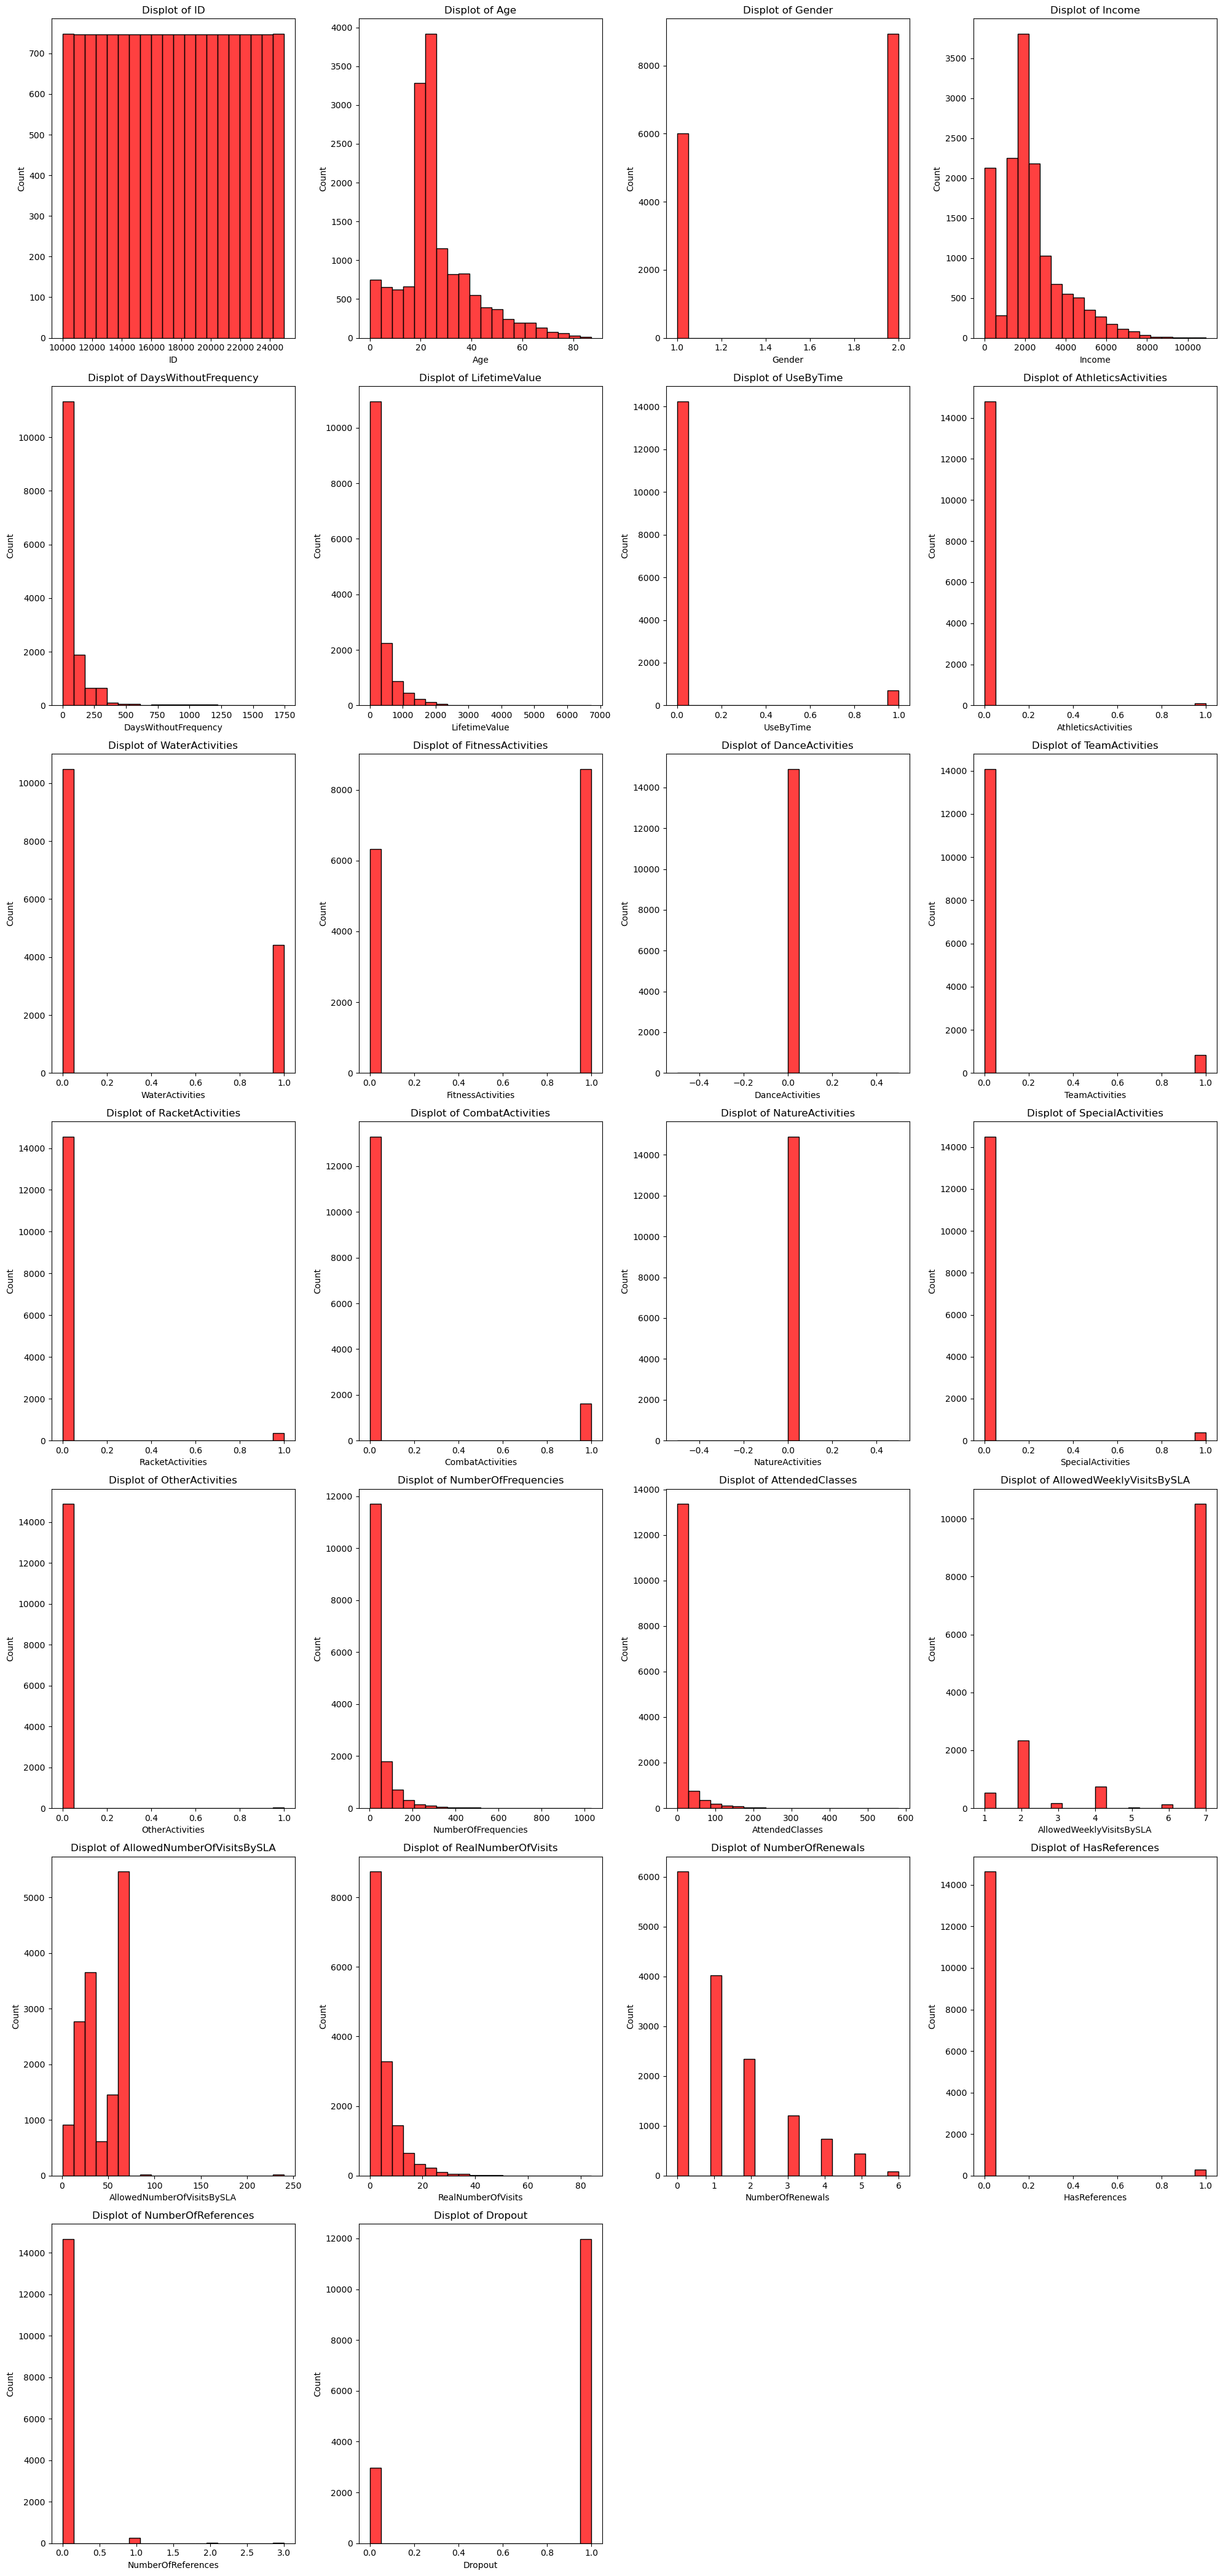

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeros = data.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numeros)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows

plt.figure(1, figsize=(20, num_rows * 6))

for n, x in enumerate(numeros, 1):
    plt.subplot(num_rows, 4, n)
    sns.histplot(data[x], bins=20, color='red')
    plt.title('Displot of {}'.format(x))

plt.tight_layout()
plt.show()


Deal with ID

In [25]:
data_1 = data.drop("ID", axis=1)

In [26]:
data_1.describe()

Age        Gender        Income  DaysWithoutFrequency  \
count  14942.000000  14942.000000  14447.000000          14942.000000   
mean      26.015794      1.597711   2230.816086             81.224936   
std       14.156582      0.490376   1566.527734            144.199576   
min        0.000000      1.000000      0.000000              0.000000   
25%       19.000000      1.000000   1470.000000             13.000000   
50%       23.000000      2.000000   1990.000000             41.000000   
75%       31.000000      2.000000   2790.000000             83.750000   
max       87.000000      2.000000  10890.000000           1745.000000   

       LifetimeValue     UseByTime  AthleticsActivities  WaterActivities  \
count   14942.000000  14942.000000          14906.00000     14905.000000   
mean      302.561871      0.047116              0.00738         0.296209   
std       364.319566      0.211893              0.08559         0.456600   
min         0.000000      0.000000              0.00000         0.000000   
25%        83.600000      0.000000              0.00000         0.000000   
50%       166.200000      0.000000              0.00000         0.000000   
75%       355.075000      0.000000              0.00000         1.000000   
max      6727.800000      1.000000              1.00000         1.000000   

       FitnessActivities  DanceActivities  ...  OtherActivities  \
count       14907.000000          14906.0  ...     14907.000000   
mean            0.576038              0.0  ...         0.001878   
std             0.494201              0.0  ...         0.043300   
min             0.000000              0.0  ...         0.000000   
25%             0.000000              0.0  ...         0.000000   
50%             1.000000              0.0  ...         0.000000   
75%             1.000000              0.0  ...         0.000000   
max             1.000000              0.0  ...         1.000000   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
count         14916.000000     14942.000000              14407.000000   
mean             40.120542        10.152456                  5.759561   
std              65.466459        29.154202                  2.118867   
min               1.000000         0.000000                  1.000000   
25%               7.000000         0.000000                  4.000000   
50%              18.000000         0.000000                  7.000000   
75%              45.000000         3.000000                  7.000000   
max            1031.000000       581.000000                  7.000000   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
count                14942.000000        14942.000000      14942.000000   
mean                    41.636299            5.320707          1.205260   
std                     21.066166            6.332958          1.381305   
min                      0.560000            0.000000          0.000000   
25%                     25.720000            1.000000          0.000000   
50%                     38.990000            4.000000          1.000000   
75%                     60.970000            7.000000          2.000000   
max                    240.030000           84.000000          6.000000   

       HasReferences  NumberOfReferences       Dropout  
count   14930.000000        14942.000000  14942.000000  
mean        0.019893            0.022286      0.800964  
std         0.139637            0.166777      0.399289  
min         0.000000            0.000000      0.000000  
25%         0.000000            0.000000      1.000000  
50%         0.000000            0.000000      1.000000  
75%         0.000000            0.000000      1.000000  
max         1.000000            3.000000      1.000000  

[8 rows x 25 columns]

# 4. Data Treatment

## 4.1 Dataset Consistency I

# 4.11 Checking for Variables with Identical Values

This code is  for data quality control. Identifying columns with identical values may highlight potential issues or redundancies in the dataset. It allows data analysts to investigate further and decide whether any corrective actions are necessary.

In [27]:
# Create an empty list to store column names with identical non-NaN values
identical_non_nan_value_columns = []

# Check if any column has all identical non-NaN values
for column in data.columns:
    non_nan_values = data[column].dropna()
    if len(non_nan_values.unique()) == 1:
        identical_non_nan_value_columns.append(column)

# Print the results
if len(identical_non_nan_value_columns) > 0:
    print("Columns with Identical Non-NaN Values:")
    for column in identical_non_nan_value_columns:
        print(f"- '{column}'")
    print("These columns have all identical non-NaN values in the 'data' database.")
else:
    print("No columns with all identical non-NaN values found in the 'data' database.")



Columns with Identical Non-NaN Values:
- 'DanceActivities'
- 'NatureActivities'
These columns have all identical non-NaN values in the 'data' database.


## 4.12 Drop Variables w Identical Value and Verify

In [28]:
df_0 = data.copy()

In [29]:
# Create a list of column names with identical non-NaN values
identical_non_nan_value_columns = []

# Check if any column has all identical non-NaN values in df_0
for column in df_0.columns:
    non_nan_values = df_0[column].dropna()
    if len(non_nan_values.unique()) == 1:
        identical_non_nan_value_columns.append(column)

# Drop columns with identical non-NaN values from the df_0 DataFrame
df_0.drop(columns=identical_non_nan_value_columns, inplace=True)

# Print the list of dropped columns
if len(identical_non_nan_value_columns) > 0:
    print("Dropped Columns with Identical Non-NaN Values:")
    for column in identical_non_nan_value_columns:
        print(f"- '{column}'")
else:
    print("No columns with all identical non-NaN values found in the 'df_0' DataFrame.")



Dropped Columns with Identical Non-NaN Values:
- 'DanceActivities'
- 'NatureActivities'


In [30]:
# Get the size of the DataFrame (number of rows and columns)
num_rows, num_columns = df_0.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 14942
Number of columns: 29


## 4.2 Dataset Consistency II

### 4.21 Data Exploration 

In [31]:
df_1 = df_0.copy()

In [32]:
result_df_1 = describe_with_missing(df_1)
result_df_1

count          mean          std       min  \
ID                          14942.0  17470.500000  4313.528196  10000.00   
Age                         14942.0     26.015794    14.156582      0.00   
Gender                      14942.0      1.597711     0.490376      1.00   
Income                      14447.0   2230.816086  1566.527734      0.00   
DaysWithoutFrequency        14942.0     81.224936   144.199576      0.00   
LifetimeValue               14942.0    302.561871   364.319566      0.00   
UseByTime                   14942.0      0.047116     0.211893      0.00   
AthleticsActivities         14906.0      0.007380     0.085590      0.00   
WaterActivities             14905.0      0.296209     0.456600      0.00   
FitnessActivities           14907.0      0.576038     0.494201      0.00   
TeamActivities              14907.0      0.055544     0.229047      0.00   
RacketActivities            14905.0      0.023415     0.151222      0.00   
CombatActivities            14909.0      0.107921     0.310292      0.00   
SpecialActivities           14898.0      0.026514     0.160662      0.00   
OtherActivities             14907.0      0.001878     0.043300      0.00   
NumberOfFrequencies         14916.0     40.120542    65.466459      1.00   
AttendedClasses             14942.0     10.152456    29.154202      0.00   
AllowedWeeklyVisitsBySLA    14407.0      5.759561     2.118867      1.00   
AllowedNumberOfVisitsBySLA  14942.0     41.636299    21.066166      0.56   
RealNumberOfVisits          14942.0      5.320707     6.332958      0.00   
NumberOfRenewals            14942.0      1.205260     1.381305      0.00   
HasReferences               14930.0      0.019893     0.139637      0.00   
NumberOfReferences          14942.0      0.022286     0.166777      0.00   
Dropout                     14942.0      0.800964     0.399289      0.00   

                                 25%       50%        75%       max  missing  
ID                          13735.25  17470.50  21205.750  24941.00      0.0  
Age                            19.00     23.00     31.000     87.00      0.0  
Gender                          1.00      2.00      2.000      2.00      0.0  
Income                       1470.00   1990.00   2790.000  10890.00    495.0  
DaysWithoutFrequency           13.00     41.00     83.750   1745.00      0.0  
LifetimeValue                  83.60    166.20    355.075   6727.80      0.0  
UseByTime                       0.00      0.00      0.000      1.00      0.0  
AthleticsActivities             0.00      0.00      0.000      1.00     36.0  
WaterActivities                 0.00      0.00      1.000      1.00     37.0  
FitnessActivities               0.00      1.00      1.000      1.00     35.0  
TeamActivities                  0.00      0.00      0.000      1.00     35.0  
RacketActivities                0.00      0.00      0.000      1.00     37.0  
CombatActivities                0.00      0.00      0.000      1.00     33.0  
SpecialActivities               0.00      0.00      0.000      1.00     44.0  
OtherActivities                 0.00      0.00      0.000      1.00     35.0  
NumberOfFrequencies             7.00     18.00     45.000   1031.00     26.0  
AttendedClasses                 0.00      0.00      3.000    581.00      0.0  
AllowedWeeklyVisitsBySLA        4.00      7.00      7.000      7.00    535.0  
AllowedNumberOfVisitsBySLA     25.72     38.99     60.970    240.03      0.0  
RealNumberOfVisits              1.00      4.00      7.000     84.00      0.0  
NumberOfRenewals                0.00      1.00      2.000      6.00      0.0  
HasReferences                   0.00      0.00      0.000      1.00     12.0  
NumberOfReferences              0.00      0.00      0.000      3.00      0.0  
Dropout                         1.00      1.00      1.000      1.00      0.0

### 4.22 Verify 'EnrollmentFinish' Consistency



### Explanation

The provided Python code aims to create a new variable/column in a DataFrame, named 'EnrollmentFinish_1'. This process is driven by the metadata specifications, which dictate that 'DateLastVisit' (representing the date and time of the user's last visit to the sports facility) and 'DaysWithoutFrequency' (indicating the number of days a user did not visit the facility before being considered a dropout) should align with 'EnrollmentFinish' (denoting the finish date of the last enrollment).

According to the metadata:

- **DateLastVisit**: Represents the date and time of the user's last visit to the sports facility.
- **DaysWithoutFrequency**: Indicates the number of days a user did not visit the facility before being considered a dropout.
- **EnrollmentFinish**: Denotes the finish date of the last enrollment.

The code performs the following steps to ensure alignment with the metadata:

1. **Datetime Conversion**: It begins by converting the 'DateLastVisit' column into datetime objects. This step is crucial to ensure that the dates are recognized and treated as date data.

2. **Date Adjustment**: The code then proceeds to add the values from the 'DaysWithoutFrequency' column to the 'DateLastVisit' column. This operation calculates the 'EnrollmentFinish_1' column, aligning the data according to the metadata requirements.

3. **Date Formatting**: The 'EnrollmentFinish_1' column is formatted to display dates in the "dd/mm/yyyy" format, enhancing readability and consistency.

4. **DataFrame Display**: Finally, the code prints the DataFrame with the newly created and formatted 'EnrollmentFinish_1' column for review.

In summary, this code ensures that the 'EnrollmentFinish_1' variable adheres to the metadata specifications by adjusting and formatting it based on existing date and numeric columns within the DataFrame.

In [33]:

# Convert the 'DateLastVisit' column to datetime objects with infer_datetime_format=True
df_1['DateLastVisit'] = pd.to_datetime(df_1['DateLastVisit'], infer_datetime_format=True)

# Add the 'DaysWithoutFrequency' column directly to the 'DateLastVisit' column
df_1['EnrollmentFinish_1'] = df_1['DateLastVisit'] + pd.to_timedelta(df_1['DaysWithoutFrequency'], unit='D')

# Format the 'EnrollmentFinish_1' column in the desired format (dd/mm/yyyy)
df_1['EnrollmentFinish_1'] = df_1['EnrollmentFinish_1'].dt.strftime("%d/%m/%Y")

# Display the DataFrame with the new column
print(df_1['EnrollmentFinish_1'])


0        31/10/2019
1        14/09/2015
2        01/06/2017
3        12/02/2019
4        07/06/2018
            ...    
14937    31/10/2019
14938    04/06/2016
14939    31/03/2017
14940    31/10/2019
14941    11/06/2019
Name: EnrollmentFinish_1, Length: 14942, dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_20680\1072677061.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_1['DateLastVisit'] = pd.to_datetime(df_1['DateLastVisit'], infer_datetime_format=True)


In [34]:
print(df_1)

          ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60       2  5500.0      2019-09-03       2019-10-31   
1      10001   29       2  2630.0      2014-08-12       2015-09-14   
2      10002   23       1  1980.0      2017-05-02       2017-06-01   
3      10003    9       1     0.0      2018-09-05       2019-02-12   
4      10004   35       1  4320.0      2016-04-20       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14       1     0.0      2016-09-08       2016-09-08   
14938  24938   39       1     NaN      2015-09-17       2016-06-04   
14939  24939   20       1  1810.0      2017-03-01       2017-03-31   
14940  24940   55       1  4800.0      2018-03-01       2018-03-01   
14941  24941   32       2  3700.0      2016-04-01       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          2019-07-01       2019-12-31    2019-10-30                     1   
1  

In [35]:
df_1['EnrollmentFinish_1']

0        31/10/2019
1        14/09/2015
2        01/06/2017
3        12/02/2019
4        07/06/2018
            ...    
14937    31/10/2019
14938    04/06/2016
14939    31/03/2017
14940    31/10/2019
14941    11/06/2019
Name: EnrollmentFinish_1, Length: 14942, dtype: object

### 4.23 Verify 'EnrollmentStart' Consistency

Check if 'EnrollmentStart' is less than 'EnrollmentFinish_1', and if the date range is between June 1st, 2014, and October 31st, 2019.

In [36]:

# Convert 'EnrollmentStart' to the '31/12/2019' format
df_1['EnrollmentStart'] = pd.to_datetime(df_1['EnrollmentStart'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')



In [37]:
df_1['EnrollmentStart']

0        03/09/2019
1        12/08/2014
2        02/05/2017
3        05/09/2018
4        20/04/2016
            ...    
14937    08/09/2016
14938    17/09/2015
14939    01/03/2017
14940    01/03/2018
14941    01/04/2016
Name: EnrollmentStart, Length: 14942, dtype: object

In [38]:
print(df_1)

          ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60       2  5500.0      03/09/2019       2019-10-31   
1      10001   29       2  2630.0      12/08/2014       2015-09-14   
2      10002   23       1  1980.0      02/05/2017       2017-06-01   
3      10003    9       1     0.0      05/09/2018       2019-02-12   
4      10004   35       1  4320.0      20/04/2016       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14       1     0.0      08/09/2016       2016-09-08   
14938  24938   39       1     NaN      17/09/2015       2016-06-04   
14939  24939   20       1  1810.0      01/03/2017       2017-03-31   
14940  24940   55       1  4800.0      01/03/2018       2018-03-01   
14941  24941   32       2  3700.0      01/04/2016       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          2019-07-01       2019-12-31    2019-10-30                     1   
1  

In [39]:

# Check if 'EnrollmentStart' meets at least one of the desired conditions
condition_1 = (df_1['EnrollmentStart'] >= '2014/06/01') & (df_1['EnrollmentStart'].notna())
condition_2 = (df_1['EnrollmentStart'] <= '2019/10/31')

# Apply the mask based on at least one of the conditions
filtered_data = df_1[condition_1 | condition_2]

# Print the DataFrame with the rows that meet at least one of the conditions
print(filtered_data)



          ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60       2  5500.0      03/09/2019       2019-10-31   
1      10001   29       2  2630.0      12/08/2014       2015-09-14   
2      10002   23       1  1980.0      02/05/2017       2017-06-01   
3      10003    9       1     0.0      05/09/2018       2019-02-12   
4      10004   35       1  4320.0      20/04/2016       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14       1     0.0      08/09/2016       2016-09-08   
14938  24938   39       1     NaN      17/09/2015       2016-06-04   
14939  24939   20       1  1810.0      01/03/2017       2017-03-31   
14940  24940   55       1  4800.0      01/03/2018       2018-03-01   
14941  24941   32       2  3700.0      01/04/2016       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          2019-07-01       2019-12-31    2019-10-30                     1   
1  

In [40]:
print(df_1)

          ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60       2  5500.0      03/09/2019       2019-10-31   
1      10001   29       2  2630.0      12/08/2014       2015-09-14   
2      10002   23       1  1980.0      02/05/2017       2017-06-01   
3      10003    9       1     0.0      05/09/2018       2019-02-12   
4      10004   35       1  4320.0      20/04/2016       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14       1     0.0      08/09/2016       2016-09-08   
14938  24938   39       1     NaN      17/09/2015       2016-06-04   
14939  24939   20       1  1810.0      01/03/2017       2017-03-31   
14940  24940   55       1  4800.0      01/03/2018       2018-03-01   
14941  24941   32       2  3700.0      01/04/2016       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          2019-07-01       2019-12-31    2019-10-30                     1   
1  

In [41]:
# Check if 'EnrollmentStart' meets at least one of the desired conditions
condition_1 = (df_1['EnrollmentStart'] >= '2014/06/01') & (df_1['EnrollmentStart'].notna())
condition_2 = (df_1['EnrollmentStart'] <= '2019/10/31')

# Apply the mask based on at least one of the conditions
filtered_data = df_1[condition_1 | condition_2]

# Check which rows do not meet either of the conditions
not_matching_data = df_1[~(condition_1 | condition_2)]

# Print the rows that do not meet either of the conditions
print(not_matching_data)


Empty DataFrame
Columns: [ID, Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, TeamActivities, RacketActivities, CombatActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout, EnrollmentFinish_1]
Index: []

[0 rows x 30 columns]


In [42]:
print(df_1)

          ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60       2  5500.0      03/09/2019       2019-10-31   
1      10001   29       2  2630.0      12/08/2014       2015-09-14   
2      10002   23       1  1980.0      02/05/2017       2017-06-01   
3      10003    9       1     0.0      05/09/2018       2019-02-12   
4      10004   35       1  4320.0      20/04/2016       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14       1     0.0      08/09/2016       2016-09-08   
14938  24938   39       1     NaN      17/09/2015       2016-06-04   
14939  24939   20       1  1810.0      01/03/2017       2017-03-31   
14940  24940   55       1  4800.0      01/03/2018       2018-03-01   
14941  24941   32       2  3700.0      01/04/2016       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          2019-07-01       2019-12-31    2019-10-30                     1   
1  

In [43]:

# Assuming 'EnrollmentStart' and 'EnrollmentFinish_1' are in the format 'dd/mm/yyyy'
date_format = "%d/%m/%Y"
df_1['EnrollmentStart'] = pd.to_datetime(df_1['EnrollmentStart'], format=date_format)
df_1['EnrollmentFinish_1'] = pd.to_datetime(df_1['EnrollmentFinish_1'], format=date_format)

# Check if 'EnrollmentStart' is greater than 'EnrollmentFinish_1'
condition = df_1['EnrollmentStart'] > df_1['EnrollmentFinish_1']

# Filter the DataFrame to keep only the rows that meet the condition
not_matching_df = df_1[condition]

# Print the rows where 'EnrollmentStart' is greater than 'EnrollmentFinish_1'
print("Rows where EnrollmentStart > EnrollmentFinish_1:")
print(not_matching_df)





Rows where EnrollmentStart > EnrollmentFinish_1:
Empty DataFrame
Columns: [ID, Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, TeamActivities, RacketActivities, CombatActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout, EnrollmentFinish_1]
Index: []

[0 rows x 30 columns]


In [44]:
print(df_1)


          ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60       2  5500.0      2019-09-03       2019-10-31   
1      10001   29       2  2630.0      2014-08-12       2015-09-14   
2      10002   23       1  1980.0      2017-05-02       2017-06-01   
3      10003    9       1     0.0      2018-09-05       2019-02-12   
4      10004   35       1  4320.0      2016-04-20       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14       1     0.0      2016-09-08       2016-09-08   
14938  24938   39       1     NaN      2015-09-17       2016-06-04   
14939  24939   20       1  1810.0      2017-03-01       2017-03-31   
14940  24940   55       1  4800.0      2018-03-01       2018-03-01   
14941  24941   32       2  3700.0      2016-04-01       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          2019-07-01       2019-12-31    2019-10-30                     1   
1  

In [45]:
df_11 = df_1.copy()

In [46]:
print(df_11)

          ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60       2  5500.0      2019-09-03       2019-10-31   
1      10001   29       2  2630.0      2014-08-12       2015-09-14   
2      10002   23       1  1980.0      2017-05-02       2017-06-01   
3      10003    9       1     0.0      2018-09-05       2019-02-12   
4      10004   35       1  4320.0      2016-04-20       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14       1     0.0      2016-09-08       2016-09-08   
14938  24938   39       1     NaN      2015-09-17       2016-06-04   
14939  24939   20       1  1810.0      2017-03-01       2017-03-31   
14940  24940   55       1  4800.0      2018-03-01       2018-03-01   
14941  24941   32       2  3700.0      2016-04-01       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          2019-07-01       2019-12-31    2019-10-30                     1   
1  

In [47]:
result_df_11 = describe_with_missing(df_11)
result_df_11

count                           mean  \
ID                          14942.0                        17470.5   
Age                         14942.0                      26.015794   
Gender                      14942.0                       1.597711   
Income                      14447.0                    2230.816086   
EnrollmentStart               14942  2016-11-10 07:44:13.620666624   
DateLastVisit                 14942  2017-10-23 22:24:18.118056448   
DaysWithoutFrequency        14942.0                      81.224936   
LifetimeValue               14942.0                     302.561871   
UseByTime                   14942.0                       0.047116   
AthleticsActivities         14906.0                        0.00738   
WaterActivities             14905.0                       0.296209   
FitnessActivities           14907.0                       0.576038   
TeamActivities              14907.0                       0.055544   
RacketActivities            14905.0                       0.023415   
CombatActivities            14909.0                       0.107921   
SpecialActivities           14898.0                       0.026514   
OtherActivities             14907.0                       0.001878   
NumberOfFrequencies         14916.0                      40.120542   
AttendedClasses             14942.0                      10.152456   
AllowedWeeklyVisitsBySLA    14407.0                       5.759561   
AllowedNumberOfVisitsBySLA  14942.0                      41.636299   
RealNumberOfVisits          14942.0                       5.320707   
NumberOfRenewals            14942.0                        1.20526   
HasReferences               14930.0                       0.019893   
NumberOfReferences          14942.0                       0.022286   
Dropout                     14942.0                       0.800964   
EnrollmentFinish_1            14942  2018-01-13 03:48:12.624816128   

                                            min                  25%  \
ID                                      10000.0             13735.25   
Age                                         0.0                 19.0   
Gender                                      1.0                  1.0   
Income                                      0.0               1470.0   
EnrollmentStart             2014-06-02 00:00:00  2015-08-01 00:00:00   
DateLastVisit               2014-07-03 00:00:00  2016-05-25 00:00:00   
DaysWithoutFrequency                        0.0                 13.0   
LifetimeValue                               0.0                 83.6   
UseByTime                                   0.0                  0.0   
AthleticsActivities                         0.0                  0.0   
WaterActivities                             0.0                  0.0   
FitnessActivities                           0.0                  0.0   
TeamActivities                              0.0                  0.0   
RacketActivities                            0.0                  0.0   
CombatActivities                            0.0                  0.0   
SpecialActivities                           0.0                  0.0   
OtherActivities                             0.0                  0.0   
NumberOfFrequencies                         1.0                  7.0   
AttendedClasses                             0.0                  0.0   
AllowedWeeklyVisitsBySLA                    1.0                  4.0   
AllowedNumberOfVisitsBySLA                 0.56                25.72   
RealNumberOfVisits                          0.0                  1.0   
NumberOfRenewals                            0.0                  0.0   
HasReferences                               0.0                  0.0   
NumberOfReferences                          0.0                  0.0   
Dropout                                     0.0                  1.0   
EnrollmentFinish_1          2014-07-11 00:00:00  2016-07-31 00:00:00   

                                            50%     

### 4.24 Adjusting LastPeriodStart and LastPeriodFinish to Comply with Metadata and Database Logic


In this code, we perform adjustments on the columns `LastPeriodStart` and `LastPeriodFinish` to align them with the provided metadata descriptions and the underlying logic of the database.

### Condition-Based Column Adjustment

 `LastPeriodFinish_1` (End date of last activity or last two months if less)
We create a new column `LastPeriodFinish_1` based on a condition. If `LastPeriodFinish` is greater than `EnrollmentFinish`, we set `LastPeriodFinish_1` to be equal to `EnrollmentFinish`. This ensures that `LastPeriodFinish_1` adheres to the metadata description and does not exceed the enrollment finish date.

 `LastPeriodStart_1` (Start date of the last activity or the last two months if less)
Similarly, we create a new column `LastPeriodStart_1` based on a condition. If `LastPeriodStart` is less than `EnrollmentStart`, we set `LastPeriodStart_1` to be equal to `EnrollmentStart`. This ensures that `LastPeriodStart_1` aligns with the metadata description and does not precede the enrollment start date.

### Datetime Conversion
We convert the columns `EnrollmentFinish`, `LastPeriodFinish_1`, and `LastPeriodStart_1` to datetime objects to facilitate date calculations.

### Date Difference Calculation
We calculate the difference in days between `LastPeriodFinish_1` and `LastPeriodStart_1` using the `dt.days` property.

### Conditional Date Adjustment

If the difference between `LastPeriodFinish_1` and `LastPeriodStart_1` is greater than 60 days, we apply a conditional adjustment to `LastPeriodStart_1`. The purpose of this adjustment is to ensure that the difference between these two dates does not exceed 60 days, aligning with the logic and requirements of the database.

To achieve this, we utilize `LastPeriodFinish_1` as a reference point. If the difference exceeds 60 days, we make the necessary adjustments to `LastPeriodStart_1` to maintain the maximum 60-day gap while still adhering to the metadata and database specifications.

### Dropping Unnecessary Column
Finally, we drop the temporary 'Diff' column, which was used for calculations but is no longer needed.

### Display Adjusted DataFrame
The code concludes by printing the 'data' DataFrame, showcasing the adjusted columns `LastPeriodFinish_1` and `LastPeriodStart_1`, which now comply with the metadata descriptions and the logic of the database.

In [48]:

# Assuming 'LastPeriodStart' and 'LastPeriodFinish' are in the format 'yyyy-mm-dd'
date_format = "%Y-%m-%d"

# Convert 'LastPeriodStart' to the 'dd/mm/yyyy' format
df_11['LastPeriodStart'] = pd.to_datetime(df_11['LastPeriodStart'], format=date_format).dt.strftime('%d/%m/%Y')

# Convert 'LastPeriodFinish' to the 'dd/mm/yyyy' format
df_11['LastPeriodFinish'] = pd.to_datetime(df_11['LastPeriodFinish'], format=date_format).dt.strftime('%d/%m/%Y')

# Convert 'LastPeriodFinish' to the 'dd/mm/yyyy' format
df_11['EnrollmentFinish_1'] = pd.to_datetime(df_11['EnrollmentFinish_1'], format=date_format).dt.strftime('%d/%m/%Y')

# Print the DataFrame with the adjusted columns
print(df_11)


          ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60       2  5500.0      2019-09-03       2019-10-31   
1      10001   29       2  2630.0      2014-08-12       2015-09-14   
2      10002   23       1  1980.0      2017-05-02       2017-06-01   
3      10003    9       1     0.0      2018-09-05       2019-02-12   
4      10004   35       1  4320.0      2016-04-20       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14       1     0.0      2016-09-08       2016-09-08   
14938  24938   39       1     NaN      2015-09-17       2016-06-04   
14939  24939   20       1  1810.0      2017-03-01       2017-03-31   
14940  24940   55       1  4800.0      2018-03-01       2018-03-01   
14941  24941   32       2  3700.0      2016-04-01       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          01/07/2019       31/12/2019    2019-10-30                     1   
1  

In [49]:
df_11['LastPeriodFinish']

0        31/12/2019
1        31/12/2015
2        30/06/2017
3        30/06/2019
4        30/06/2018
            ...    
14937    31/12/2019
14938    30/06/2016
14939    30/06/2017
14940    31/12/2019
14941    30/06/2019
Name: LastPeriodFinish, Length: 14942, dtype: object

In [50]:
df_11['LastPeriodStart']

0        01/07/2019
1        01/01/2015
2        01/01/2017
3        01/07/2018
4        01/01/2018
            ...    
14937    01/07/2019
14938    01/01/2016
14939    01/01/2017
14940    01/07/2019
14941    01/01/2019
Name: LastPeriodStart, Length: 14942, dtype: object

In [51]:
df_11['EnrollmentFinish_1']

0        31/10/2019
1        14/09/2015
2        01/06/2017
3        12/02/2019
4        07/06/2018
            ...    
14937    31/10/2019
14938    04/06/2016
14939    31/03/2017
14940    31/10/2019
14941    11/06/2019
Name: EnrollmentFinish_1, Length: 14942, dtype: object

In [52]:

# Assuming all date columns are in the format 'dd/mm/yyyy'
date_format = "%d/%m/%Y"

# Convert date columns to datetime objects
df_11['LastPeriodStart'] = pd.to_datetime(df_11['LastPeriodStart'], format=date_format)
df_11['LastPeriodFinish'] = pd.to_datetime(df_11['LastPeriodFinish'], format=date_format)
df_11['EnrollmentStart'] = pd.to_datetime(df_11['EnrollmentStart'], format=date_format)
df_11['EnrollmentFinish_1'] = pd.to_datetime(df_11['EnrollmentFinish_1'], format=date_format)

# Create a new column 'LastPeriodFinish_1' based on the condition
df_11['LastPeriodFinish_1'] = df_11[['LastPeriodFinish', 'EnrollmentFinish_1']].max(axis=1)

# Create a new column 'LastPeriodStart_1' based on the condition
df_11['LastPeriodStart_1'] = df_11[['LastPeriodStart', 'EnrollmentStart']].min(axis=1)

# Calculate the difference in days between LastPeriodFinish_1 and LastPeriodStart_1
df_11['Diff'] = (df_11['LastPeriodFinish_1'] - df_11['LastPeriodStart_1']).dt.days

# Apply the condition that the difference should be less than or equal to 60 days
df_11['LastPeriodStart_1'] = df_11.apply(lambda row: row['LastPeriodFinish_1'] - pd.DateOffset(days=60) if row['Diff'] > 60 else row['LastPeriodStart_1'], axis=1)

# Drop the 'Diff' column if necessary
df_11 = df_11.drop(columns=['Diff'])

# Exiba o DataFrame com as colunas ajustadas
print(df_11)




          ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60       2  5500.0      2019-09-03       2019-10-31   
1      10001   29       2  2630.0      2014-08-12       2015-09-14   
2      10002   23       1  1980.0      2017-05-02       2017-06-01   
3      10003    9       1     0.0      2018-09-05       2019-02-12   
4      10004   35       1  4320.0      2016-04-20       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14       1     0.0      2016-09-08       2016-09-08   
14938  24938   39       1     NaN      2015-09-17       2016-06-04   
14939  24939   20       1  1810.0      2017-03-01       2017-03-31   
14940  24940   55       1  4800.0      2018-03-01       2018-03-01   
14941  24941   32       2  3700.0      2016-04-01       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          2019-07-01       2019-12-31    2019-10-30                     1   
1  

## 4.3 Age and Income

In [53]:
df_2 = df_11.copy()

In [54]:
result_df_2 = describe_with_missing(df_2)
result_df_2

count                           mean  \
ID                          14942.0                        17470.5   
Age                         14942.0                      26.015794   
Gender                      14942.0                       1.597711   
Income                      14447.0                    2230.816086   
EnrollmentStart               14942  2016-11-10 07:44:13.620666624   
LastPeriodStart               14942  2017-06-30 17:48:05.878731008   
LastPeriodFinish              14942  2018-03-06 15:23:26.558693632   
DateLastVisit                 14942  2017-10-23 22:24:18.118056448   
DaysWithoutFrequency        14942.0                      81.224936   
LifetimeValue               14942.0                     302.561871   
UseByTime                   14942.0                       0.047116   
AthleticsActivities         14906.0                        0.00738   
WaterActivities             14905.0                       0.296209   
FitnessActivities           14907.0                       0.576038   
TeamActivities              14907.0                       0.055544   
RacketActivities            14905.0                       0.023415   
CombatActivities            14909.0                       0.107921   
SpecialActivities           14898.0                       0.026514   
OtherActivities             14907.0                       0.001878   
NumberOfFrequencies         14916.0                      40.120542   
AttendedClasses             14942.0                      10.152456   
AllowedWeeklyVisitsBySLA    14407.0                       5.759561   
AllowedNumberOfVisitsBySLA  14942.0                      41.636299   
RealNumberOfVisits          14942.0                       5.320707   
NumberOfRenewals            14942.0                        1.20526   
HasReferences               14930.0                       0.019893   
NumberOfReferences          14942.0                       0.022286   
Dropout                     14942.0                       0.800964   
EnrollmentFinish_1            14942  2018-01-13 03:48:12.624816128   
LastPeriodFinish_1            14942  2018-04-04 19:51:27.297550592   
LastPeriodStart_1             14942  2018-02-03 19:51:27.297550592   

                                            min                  25%  \
ID                                      10000.0             13735.25   
Age                                         0.0                 19.0   
Gender                                      1.0                  1.0   
Income                                      0.0               1470.0   
EnrollmentStart             2014-06-02 00:00:00  2015-08-01 00:00:00   
LastPeriodStart             2014-01-01 00:00:00  2016-01-01 00:00:00   
LastPeriodFinish            2014-12-31 00:00:00  2016-12-31 00:00:00   
DateLastVisit               2014-07-03 00:00:00  2016-05-25 00:00:00   
DaysWithoutFrequency                        0.0                 13.0   
LifetimeValue                               0.0                 83.6   
UseByTime                                   0.0                  0.0   
AthleticsActivities                         0.0                  0.0   
WaterActivities                             0.0                  0.0   
FitnessActivities                           0.0                  0.0   
TeamActivities                              0.0                  0.0   
RacketActivities                            0.0                  0.0   
CombatActivities                            0.0                  0.0   
SpecialActivities                           0.0                  0.0   
OtherActivities                             0.0                  0.0   
NumberOfFrequencies                         1.0                  7.0   
AttendedClasses                             0.0                  0.0   
AllowedWeeklyVisitsBySLA                    1.0                  4.0   
AllowedNumberOfVisitsBySLA                 0.56                25.72   
RealNumberOfVisits                          0.0              

### 4.31 Create new variable Age_1

We created a new variable, 'AgeGroup,' divided into intervals to gain a better understanding of age groupings in the context of sports. For this purpose, we utilized scientific criteria, as adapted from Viana, M. O. (2014), available at https://repositorio-aberto.up.pt/bitstream/10216/77153/2/33261.pdf, which investigated sports supply and demand, with a case study of Guimarães, European City of Sport 2013.

In [55]:
# Define the age range boundaries
bins = [0, 15, 20, 35, 49, 65, float('inf')]

# Labels for the age ranges
labels = ['[00,15[', '[16,20[', '[20,35[', '[35,49[', '[49,65[', '[65,inf[']

# Create the new 'Age_1' column with age intervals
df_2['Age_1'] = pd.cut(df_2['Age'], bins=bins, labels=labels, right=False)

# Print both 'Age' and 'Age_1' columns side by side
print("Original Age and New Age_1 Columns:")
print(df_2[['Age', 'Age_1']])


Original Age and New Age_1 Columns:
       Age    Age_1
0       60  [49,65[
1       29  [20,35[
2       23  [20,35[
3        9  [00,15[
4       35  [35,49[
...    ...      ...
14937   14  [00,15[
14938   39  [35,49[
14939   20  [20,35[
14940   55  [49,65[
14941   32  [20,35[

[14942 rows x 2 columns]


### 4.32 Age Versus Income


To check for inconsistencies like unusually low age values in relation to income, you can write a code that identifies and highlights these cases. A common approach is to set a reasonable age threshold (e.g., 16 years old) and then filter the dataset to find records where age is below this threshold, but income is greater than zero.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


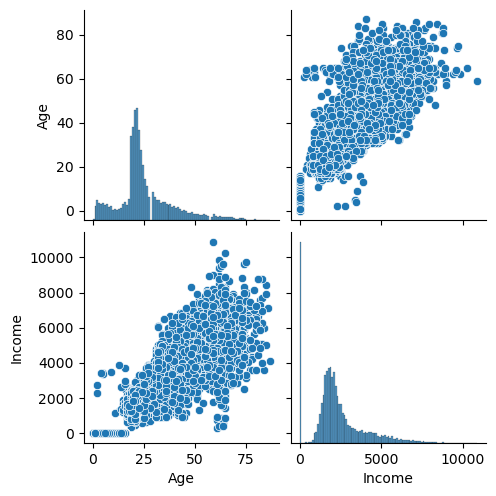

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_2[['Age', 'Income']])
plt.show()

In [57]:
# Identifying the lowest age with 'Income' greater than zero
age_with_income = df_2[df_2['Income'] > 0]['Age'].min()
print(age_with_income)

2


### 4.33 Impact Age & Income

In [58]:
# Define the age range
minimum_age = 16 # Equal than
maximum_age = 19 # Equal than

# Check for 'Age' being zero or NaN
age_zero_count = len(df_2[df_2['Age'] == minimum_age])
age_nan_count = len(df_2[df_2['Age'].isna()])

# Displaying the count and specific cases
print(f"Inconsistencies with 'Age' in range {minimum_age} to <={maximum_age}:")
print(f"Number of cases with 'Age' = 0: {age_zero_count}")
print(f"Number of cases with 'Age' NaN: {age_nan_count}\n")

# Filter for cases where 'Income' is greater than zero within the age range
inconsistencies_greater_than_zero_within_range = df_2[(df_2['Age'] >= minimum_age) & 
                                                            (df_2['Age'] <= maximum_age) & 
                                                            (df_2['Income'] > 0)][['Age', 'Income']]

# Filter for cases where 'Income' is equal to zero within the age range
inconsistencies_zero_within_range = df_2[(df_2['Age'] >= minimum_age) & 
                                                (df_2['Age'] <= maximum_age) & 
                                                (df_2['Income'] == 0)][['Age', 'Income']]

# Filter for cases where 'Income' is NaN within the age range
inconsistencies_nan_within_range = df_2[(df_2['Age'] >= minimum_age) & 
                                              (df_2['Age'] <= maximum_age) & 
                                              df_2['Income'].isna()][['Age', 'Income']]

# Filter for cases at the maximum age
inconsistencies_at_max_age = df_2[df_2['Age'] == maximum_age]

# Displaying the count and specific inconsistencies for 'Income'
print(f"Inconsistencies with Income in range {minimum_age} to <={maximum_age}:")
print(f" - 'Income' > 0: {len(inconsistencies_greater_than_zero_within_range)}")
print(f" - 'Income' = 0: {len(inconsistencies_zero_within_range)}")
print(f" - 'Income' NaN: {len(inconsistencies_nan_within_range)}\n")

# Displaying the count and specific inconsistencies for 'Income' at maximum age
print(f"Inconsistencies with Income at age equal to {maximum_age}:")
print(f" - 'Income' > 0: {len(inconsistencies_at_max_age[inconsistencies_at_max_age['Income'] > 0])}")
print(f" - 'Income' = 0: {len(inconsistencies_at_max_age[inconsistencies_at_max_age['Income'] == 0])}")
print(f" - 'Income' NaN: {len(inconsistencies_at_max_age[inconsistencies_at_max_age['Income'].isna()])}")



Inconsistencies with 'Age' in range 16 to <=19:
Number of cases with 'Age' = 0: 194
Number of cases with 'Age' NaN: 0

Inconsistencies with Income in range 16 to <=19:
 - 'Income' > 0: 1298
 - 'Income' = 0: 153
 - 'Income' NaN: 34

Inconsistencies with Income at age equal to 19:
 - 'Income' > 0: 889
 - 'Income' = 0: 0
 - 'Income' NaN: 10


In [59]:
df_21 = df_2.copy()

### 4.34 Create Income_1

We have decided initially that, based on the age and income graph, there is a possibility of data inconsistency when considering the incomes of individuals at a young age. In this regard, we have followed the statistical practices presented by INE (Instituto Nacional de Estatística), which involve considering the lower age bracket of the employed population, typically between 16 and 74 years old. In this context, we have adjusted income data for individuals under the age of 16 to be zero, as it is assumed that individuals below this age do not have incomes.

https://www.ine.pt/xportal/xmain?xpgid=ine_tema&xpid=INE&tema_cod=1114&xlang=pt

In [60]:
# Using
# Define the function to apply the condition
def adjust_income(row, age_limit=16):
    if row['Age'] < age_limit:
        return 0
    else:
        return row['Income']


# Apply the function to create the new column 'Income_1'
df_21['Income_1'] = df_21.apply(lambda row: adjust_income(row, age_limit=16), axis=1)


# Display the DataFrame with the new column
#print(df_21['Age'],df_21['Income_1'])
#df_21['Income_1']

# Create a new DataFrame containing both 'Age' and 'Income_1' columns
combined_df = pd.concat([df_21['Age'], df_21['Income_1']], axis=1)

# Display the combined DataFrame
#print(combined_df)
combined_df.head(20)

Age  Income_1
0    60    5500.0
1    29    2630.0
2    23    1980.0
3     9       0.0
4    35    4320.0
5    24    2220.0
6    23    2340.0
7    23    1910.0
8    29    3220.0
9    14       0.0
10   20    1800.0
11   29    2790.0
12   63    4040.0
13   12       0.0
14   28    2050.0
15   26    2580.0
16   47    4490.0
17   39    3890.0
18   19    1660.0
19   28    2510.0

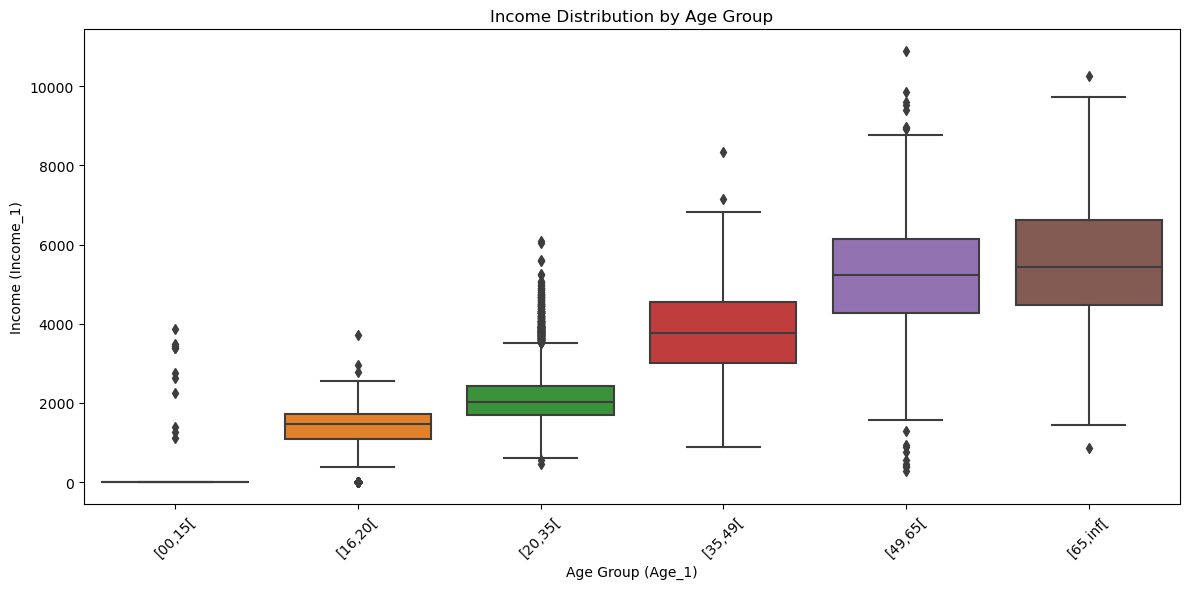

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie um gráfico de caixa para visualizar a relação entre 'Age_1' e 'Income_1'
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário
sns.boxplot(x='Age_1', y='Income', data=df_21)
plt.xticks(rotation=45)  # Rotacione os rótulos do eixo x para melhor legibilidade
plt.xlabel('Age Group (Age_1)')
plt.ylabel('Income (Income_1)')
plt.title('Income Distribution by Age Group')
plt.tight_layout()

# Exiba o gráfico
plt.show()


In [62]:

# Define the age range
minimum_age = 17 # Equal than
maximum_age = 19 # Equal than

# Check for 'Age' being zero or NaN
age_zero_count = len(df_21[df_21['Age'] == minimum_age])
age_nan_count = len(df_21[df_21['Age'].isna()])

# Displaying the count and specific cases
print(f"Inconsistencies with 'Age' in range {minimum_age} to <={maximum_age}:")
print(f"Number of cases with 'Age' = 0: {age_zero_count}")
print(f"Number of cases with 'Age' NaN: {age_nan_count}\n")

# Filter for cases where 'Income_1' is greater than zero within the age range
inconsistencies_greater_than_zero_within_range = df_21[(df_21['Age'] >= minimum_age) & 
                                                            (df_21['Age'] <= maximum_age) & 
                                                            (df_21['Income_1'] > 0)][['Age', 'Income_1']]

# Filter for cases where 'Income_1' is equal to zero within the age range
inconsistencies_zero_within_range = df_21[(df_21['Age'] >= minimum_age) & 
                                                (df_21['Age'] <= maximum_age) & 
                                                (df_21['Income_1'] == 0)][['Age', 'Income_1']]

# Filter for cases where 'Income_1' is NaN within the age range
inconsistencies_nan_within_range = df_21[(df_21['Age'] >= minimum_age) & 
                                              (df_21['Age'] <= maximum_age) & 
                                              df_21['Income_1'].isna()][['Age', 'Income_1']]

# Filter for cases at the maximum age
inconsistencies_at_max_age = df_21[df_21['Age'] == maximum_age]

# Displaying the count and specific inconsistencies for 'Income'
print(f"Inconsistencies with Income_1 in range {minimum_age} to <={maximum_age}:")
print(f" - 'Income_1' > 0: {len(inconsistencies_greater_than_zero_within_range)}")
print(f" - 'Income_1' = 0: {len(inconsistencies_zero_within_range)}")
print(f" - 'Income_1' NaN: {len(inconsistencies_nan_within_range)}\n")

# Displaying the count and specific inconsistencies for 'Income_1' at maximum age
print(f"Inconsistencies with Income at age equal to {maximum_age}:")
print(f" - 'Income_1' > 0: {len(inconsistencies_at_max_age[inconsistencies_at_max_age['Income_1'] > 0])}")
print(f" - 'Income_1' = 0: {len(inconsistencies_at_max_age[inconsistencies_at_max_age['Income_1'] == 0])}")
print(f" - 'Income_1' NaN: {len(inconsistencies_at_max_age[inconsistencies_at_max_age['Income_1'].isna()])}")

Inconsistencies with 'Age' in range 17 to <=19:
Number of cases with 'Age' = 0: 162
Number of cases with 'Age' NaN: 0

Inconsistencies with Income_1 in range 17 to <=19:
 - 'Income_1' > 0: 1280
 - 'Income_1' = 0: 0
 - 'Income_1' NaN: 11

Inconsistencies with Income at age equal to 19:
 - 'Income_1' > 0: 889
 - 'Income_1' = 0: 0
 - 'Income_1' NaN: 10


In [63]:
result_df_21 = describe_with_missing(df_21)
result_df_21

count                           mean  \
ID                          14942.0                        17470.5   
Age                         14942.0                      26.015794   
Gender                      14942.0                       1.597711   
Income                      14447.0                    2230.816086   
EnrollmentStart               14942  2016-11-10 07:44:13.620666624   
LastPeriodStart               14942  2017-06-30 17:48:05.878731008   
LastPeriodFinish              14942  2018-03-06 15:23:26.558693632   
DateLastVisit                 14942  2017-10-23 22:24:18.118056448   
DaysWithoutFrequency        14942.0                      81.224936   
LifetimeValue               14942.0                     302.561871   
UseByTime                   14942.0                       0.047116   
AthleticsActivities         14906.0                        0.00738   
WaterActivities             14905.0                       0.296209   
FitnessActivities           14907.0                       0.576038   
TeamActivities              14907.0                       0.055544   
RacketActivities            14905.0                       0.023415   
CombatActivities            14909.0                       0.107921   
SpecialActivities           14898.0                       0.026514   
OtherActivities             14907.0                       0.001878   
NumberOfFrequencies         14916.0                      40.120542   
AttendedClasses             14942.0                      10.152456   
AllowedWeeklyVisitsBySLA    14407.0                       5.759561   
AllowedNumberOfVisitsBySLA  14942.0                      41.636299   
RealNumberOfVisits          14942.0                       5.320707   
NumberOfRenewals            14942.0                        1.20526   
HasReferences               14930.0                       0.019893   
NumberOfReferences          14942.0                       0.022286   
Dropout                     14942.0                       0.800964   
EnrollmentFinish_1            14942  2018-01-13 03:48:12.624816128   
LastPeriodFinish_1            14942  2018-04-04 19:51:27.297550592   
LastPeriodStart_1             14942  2018-02-03 19:51:27.297550592   
Income_1                    14787.0                    2176.733617   

                                            min                  25%  \
ID                                      10000.0             13735.25   
Age                                         0.0                 19.0   
Gender                                      1.0                  1.0   
Income                                      0.0               1470.0   
EnrollmentStart             2014-06-02 00:00:00  2015-08-01 00:00:00   
LastPeriodStart             2014-01-01 00:00:00  2016-01-01 00:00:00   
LastPeriodFinish            2014-12-31 00:00:00  2016-12-31 00:00:00   
DateLastVisit               2014-07-03 00:00:00  2016-05-25 00:00:00   
DaysWithoutFrequency                        0.0                 13.0   
LifetimeValue                               0.0                 83.6   
UseByTime                                   0.0                  0.0   
AthleticsActivities                         0.0                  0.0   
WaterActivities                             0.0                  0.0   
FitnessActivities                           0.0                  0.0   
TeamActivities                              0.0                  0.0   
RacketActivities                            0.0                  0.0   
CombatActivities                            0.0                  0.0   
SpecialActivities                           0.0                  0.0   
OtherActivities                             0.0                  0.0   
NumberOfFrequencies                         1.0                  7.0   
AttendedClasses                             0.0                  0.0   
AllowedWeeklyVisitsBySLA                    1.0                  4.0   
AllowedNumberOfVisitsBySLA                 0.56                

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


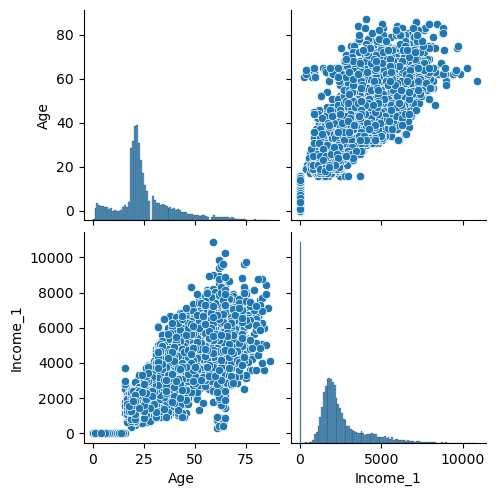

In [64]:
sns.pairplot(df_21[['Age', 'Income_1']])
plt.show()

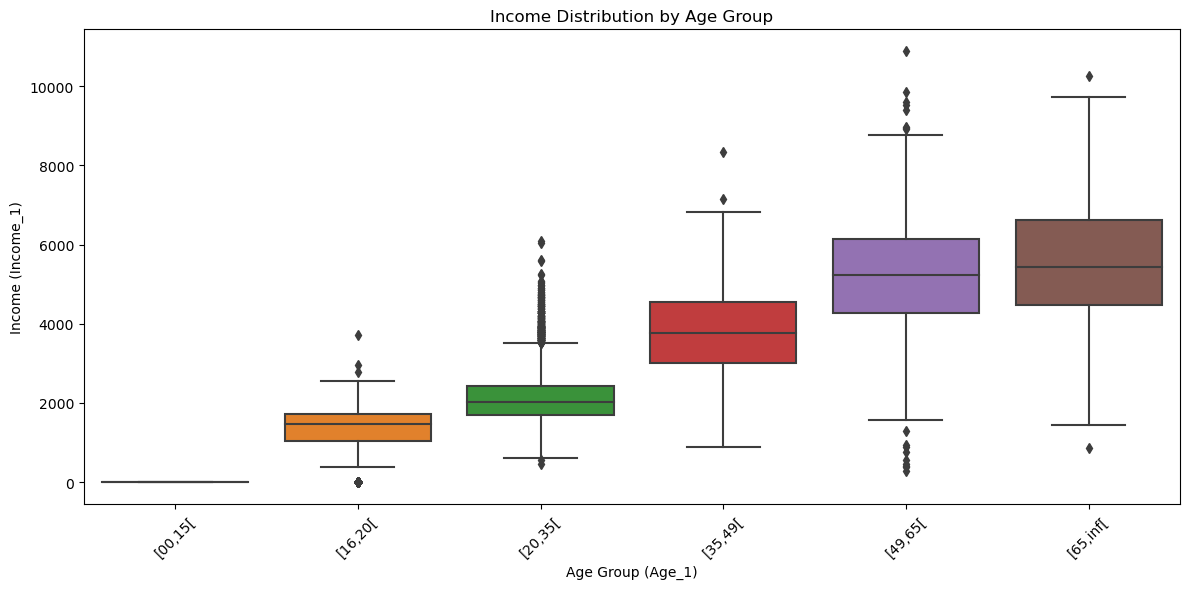

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie um gráfico de caixa para visualizar a relação entre 'Age_1' e 'Income_1'
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário
sns.boxplot(x='Age_1', y='Income_1', data=df_21)
plt.xticks(rotation=45)  # Rotacione os rótulos do eixo x para melhor legibilidade
plt.xlabel('Age Group (Age_1)')
plt.ylabel('Income (Income_1)')
plt.title('Income Distribution by Age Group')
plt.tight_layout()

# Exiba o gráfico
plt.show()


# 5 - Missing Values

In [66]:
df_3 = df_21.copy()

In [67]:
result_df_3 = describe_with_missing(df_3)
result_df_3

count                           mean  \
ID                          14942.0                        17470.5   
Age                         14942.0                      26.015794   
Gender                      14942.0                       1.597711   
Income                      14447.0                    2230.816086   
EnrollmentStart               14942  2016-11-10 07:44:13.620666624   
LastPeriodStart               14942  2017-06-30 17:48:05.878731008   
LastPeriodFinish              14942  2018-03-06 15:23:26.558693632   
DateLastVisit                 14942  2017-10-23 22:24:18.118056448   
DaysWithoutFrequency        14942.0                      81.224936   
LifetimeValue               14942.0                     302.561871   
UseByTime                   14942.0                       0.047116   
AthleticsActivities         14906.0                        0.00738   
WaterActivities             14905.0                       0.296209   
FitnessActivities           14907.0                       0.576038   
TeamActivities              14907.0                       0.055544   
RacketActivities            14905.0                       0.023415   
CombatActivities            14909.0                       0.107921   
SpecialActivities           14898.0                       0.026514   
OtherActivities             14907.0                       0.001878   
NumberOfFrequencies         14916.0                      40.120542   
AttendedClasses             14942.0                      10.152456   
AllowedWeeklyVisitsBySLA    14407.0                       5.759561   
AllowedNumberOfVisitsBySLA  14942.0                      41.636299   
RealNumberOfVisits          14942.0                       5.320707   
NumberOfRenewals            14942.0                        1.20526   
HasReferences               14930.0                       0.019893   
NumberOfReferences          14942.0                       0.022286   
Dropout                     14942.0                       0.800964   
EnrollmentFinish_1            14942  2018-01-13 03:48:12.624816128   
LastPeriodFinish_1            14942  2018-04-04 19:51:27.297550592   
LastPeriodStart_1             14942  2018-02-03 19:51:27.297550592   
Income_1                    14787.0                    2176.733617   

                                            min                  25%  \
ID                                      10000.0             13735.25   
Age                                         0.0                 19.0   
Gender                                      1.0                  1.0   
Income                                      0.0               1470.0   
EnrollmentStart             2014-06-02 00:00:00  2015-08-01 00:00:00   
LastPeriodStart             2014-01-01 00:00:00  2016-01-01 00:00:00   
LastPeriodFinish            2014-12-31 00:00:00  2016-12-31 00:00:00   
DateLastVisit               2014-07-03 00:00:00  2016-05-25 00:00:00   
DaysWithoutFrequency                        0.0                 13.0   
LifetimeValue                               0.0                 83.6   
UseByTime                                   0.0                  0.0   
AthleticsActivities                         0.0                  0.0   
WaterActivities                             0.0                  0.0   
FitnessActivities                           0.0                  0.0   
TeamActivities                              0.0                  0.0   
RacketActivities                            0.0                  0.0   
CombatActivities                            0.0                  0.0   
SpecialActivities                           0.0                  0.0   
OtherActivities                             0.0                  0.0   
NumberOfFrequencies                         1.0                  7.0   
AttendedClasses                             0.0                  0.0   
AllowedWeeklyVisitsBySLA                    1.0                  4.0   
AllowedNumberOfVisitsBySLA                 0.56                

## 5.1 Missing Values in Age

When dealing with demographic data, such as 'Age,' it's essential to ensure the data's integrity and reliability. In cases where demographic information is missing (e.g., 'Age' values are absent), there may not be a reasonable or reliable method for imputing or substituting these missing values. Imputing missing demographic data without a sound basis can lead to inaccurate or biased results in data analysis. Therefore, it's crucial to acknowledge that, in such cases, missing demographic data might need to be handled by excluding or carefully considering the impact of these missing values on the analysis, rather than attempting arbitrary imputations.

No Missing in Age

## 5.2 Missing Values Income_1

In [68]:
df_3[['Age', 'Age_1', 'Income_1']].head(20)


Age    Age_1  Income_1
0    60  [49,65[    5500.0
1    29  [20,35[    2630.0
2    23  [20,35[    1980.0
3     9  [00,15[       0.0
4    35  [35,49[    4320.0
5    24  [20,35[    2220.0
6    23  [20,35[    2340.0
7    23  [20,35[    1910.0
8    29  [20,35[    3220.0
9    14  [00,15[       0.0
10   20  [20,35[    1800.0
11   29  [20,35[    2790.0
12   63  [49,65[    4040.0
13   12  [00,15[       0.0
14   28  [20,35[    2050.0
15   26  [20,35[    2580.0
16   47  [35,49[    4490.0
17   39  [35,49[    3890.0
18   19  [16,20[    1660.0
19   28  [20,35[    2510.0

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


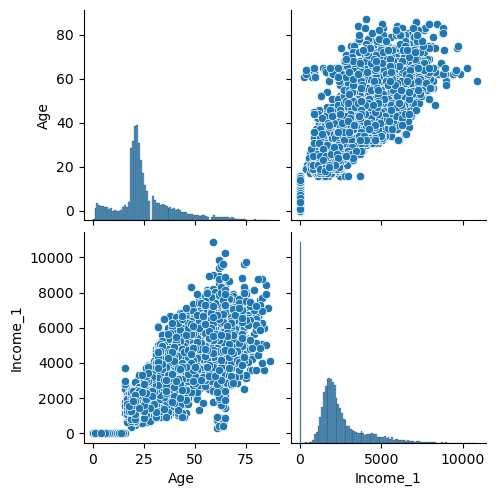

In [69]:
sns.pairplot(df_3[['Age', 'Income_1']])
plt.show()

In [70]:
result_df_3 = describe_with_missing(df_3)
result_df_3

count                           mean  \
ID                          14942.0                        17470.5   
Age                         14942.0                      26.015794   
Gender                      14942.0                       1.597711   
Income                      14447.0                    2230.816086   
EnrollmentStart               14942  2016-11-10 07:44:13.620666624   
LastPeriodStart               14942  2017-06-30 17:48:05.878731008   
LastPeriodFinish              14942  2018-03-06 15:23:26.558693632   
DateLastVisit                 14942  2017-10-23 22:24:18.118056448   
DaysWithoutFrequency        14942.0                      81.224936   
LifetimeValue               14942.0                     302.561871   
UseByTime                   14942.0                       0.047116   
AthleticsActivities         14906.0                        0.00738   
WaterActivities             14905.0                       0.296209   
FitnessActivities           14907.0                       0.576038   
TeamActivities              14907.0                       0.055544   
RacketActivities            14905.0                       0.023415   
CombatActivities            14909.0                       0.107921   
SpecialActivities           14898.0                       0.026514   
OtherActivities             14907.0                       0.001878   
NumberOfFrequencies         14916.0                      40.120542   
AttendedClasses             14942.0                      10.152456   
AllowedWeeklyVisitsBySLA    14407.0                       5.759561   
AllowedNumberOfVisitsBySLA  14942.0                      41.636299   
RealNumberOfVisits          14942.0                       5.320707   
NumberOfRenewals            14942.0                        1.20526   
HasReferences               14930.0                       0.019893   
NumberOfReferences          14942.0                       0.022286   
Dropout                     14942.0                       0.800964   
EnrollmentFinish_1            14942  2018-01-13 03:48:12.624816128   
LastPeriodFinish_1            14942  2018-04-04 19:51:27.297550592   
LastPeriodStart_1             14942  2018-02-03 19:51:27.297550592   
Income_1                    14787.0                    2176.733617   

                                            min                  25%  \
ID                                      10000.0             13735.25   
Age                                         0.0                 19.0   
Gender                                      1.0                  1.0   
Income                                      0.0               1470.0   
EnrollmentStart             2014-06-02 00:00:00  2015-08-01 00:00:00   
LastPeriodStart             2014-01-01 00:00:00  2016-01-01 00:00:00   
LastPeriodFinish            2014-12-31 00:00:00  2016-12-31 00:00:00   
DateLastVisit               2014-07-03 00:00:00  2016-05-25 00:00:00   
DaysWithoutFrequency                        0.0                 13.0   
LifetimeValue                               0.0                 83.6   
UseByTime                                   0.0                  0.0   
AthleticsActivities                         0.0                  0.0   
WaterActivities                             0.0                  0.0   
FitnessActivities                           0.0                  0.0   
TeamActivities                              0.0                  0.0   
RacketActivities                            0.0                  0.0   
CombatActivities                            0.0                  0.0   
SpecialActivities                           0.0                  0.0   
OtherActivities                             0.0                  0.0   
NumberOfFrequencies                         1.0                  7.0   
AttendedClasses                             0.0                  0.0   
AllowedWeeklyVisitsBySLA                    1.0                  4.0   
AllowedNumberOfVisitsBySLA                 0.56                

## 5.2 Filling Missing Income Values Based on Age Groups

In this code, we will fill missing (NaN) values in the 'Income' column of our DataFrame based on age groups. We've defined specific age intervals and calculated the mean income for each interval (excluding ages below 16, where income is considered null).

Here are the steps we'll follow:

1. Define age range boundaries and labels for age groups.
2. Create a new 'Age_1' column with age intervals.
3. Calculate the mean income for each age interval, excluding ages below 16 to check the values.
4. Fill NaN values in the 'Income' column with the median income based on the corresponding 'Age_1' interval.


In [71]:
df_3[['Age', 'Age_1', 'Income_1']].head(20)

Age    Age_1  Income_1
0    60  [49,65[    5500.0
1    29  [20,35[    2630.0
2    23  [20,35[    1980.0
3     9  [00,15[       0.0
4    35  [35,49[    4320.0
5    24  [20,35[    2220.0
6    23  [20,35[    2340.0
7    23  [20,35[    1910.0
8    29  [20,35[    3220.0
9    14  [00,15[       0.0
10   20  [20,35[    1800.0
11   29  [20,35[    2790.0
12   63  [49,65[    4040.0
13   12  [00,15[       0.0
14   28  [20,35[    2050.0
15   26  [20,35[    2580.0
16   47  [35,49[    4490.0
17   39  [35,49[    3890.0
18   19  [16,20[    1660.0
19   28  [20,35[    2510.0

In [72]:
df_31 = df_3.copy()

In [73]:
# Calculate the mode of 'Income_1' for each age interval
mode_income_by_age = df_31.groupby('Age_1')['Income_1'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Display the mode of 'Income_1' for each age interval
#print(mode_income_by_age)

mode_income_by_age


Age_1
[00,15[        0.0
[16,20[        0.0
[20,35[     1890.0
[35,49[     3420.0
[49,65[     4370.0
[65,inf[    4960.0
Name: Income_1, dtype: float64

## Missing Values in Income 

 Specifically, we have set their missing values to the mode of each bin of Age_1. 

In [74]:

# Calculate the mode Income_1 for each age bin
mode_income_by_age_bin = df_31.groupby('Age_1')['Income_1'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill missing Income_1 values with the mode of their corresponding age bin
df_31['Income_1'] = df_31.apply(lambda row: mode_income_by_age_bin[row['Age_1']] if pd.isna(row['Income_1']) else row['Income_1'], axis=1)

# Display the DataFrame with filled 'Income_1' values
print(df_31[['Age_1', 'Income_1']])


         Age_1  Income_1
0      [49,65[    5500.0
1      [20,35[    2630.0
2      [20,35[    1980.0
3      [00,15[       0.0
4      [35,49[    4320.0
...        ...       ...
14937  [00,15[       0.0
14938  [35,49[    3420.0
14939  [20,35[    1810.0
14940  [49,65[    4800.0
14941  [20,35[    3700.0

[14942 rows x 2 columns]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


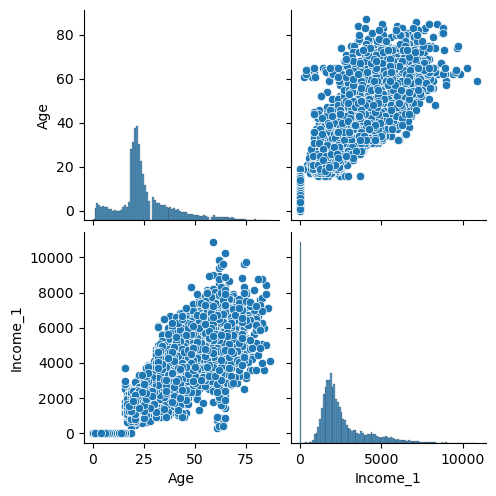

In [75]:
sns.pairplot(df_31[['Age', 'Income_1']])
plt.show()

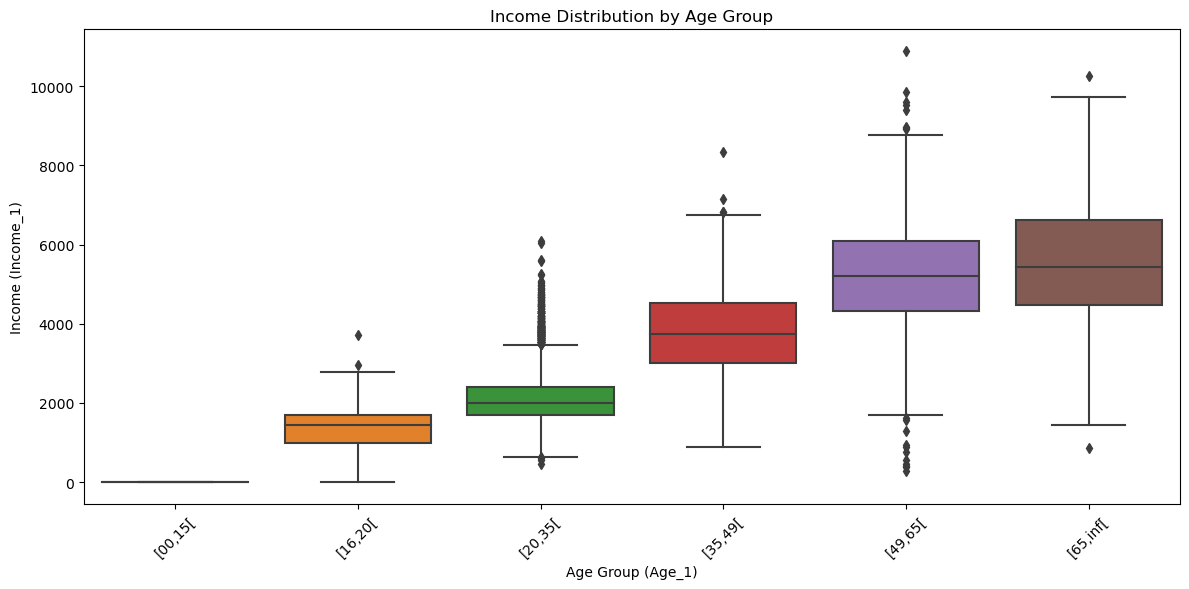

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie um gráfico de caixa para visualizar a relação entre 'Age_1' e 'Income_1'
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário
sns.boxplot(x='Age_1', y='Income_1', data=df_31)
plt.xticks(rotation=45)  # Rotacione os rótulos do eixo x para melhor legibilidade
plt.xlabel('Age Group (Age_1)')
plt.ylabel('Income (Income_1)')
plt.title('Income Distribution by Age Group')
plt.tight_layout()

# Exiba o gráfico
plt.show()


In [77]:
result_df_31 = describe_with_missing(df_31)
result_df_31

count                           mean  \
ID                          14942.0                        17470.5   
Age                         14942.0                      26.015794   
Gender                      14942.0                       1.597711   
Income                      14447.0                    2230.816086   
EnrollmentStart               14942  2016-11-10 07:44:13.620666624   
LastPeriodStart               14942  2017-06-30 17:48:05.878731008   
LastPeriodFinish              14942  2018-03-06 15:23:26.558693632   
DateLastVisit                 14942  2017-10-23 22:24:18.118056448   
DaysWithoutFrequency        14942.0                      81.224936   
LifetimeValue               14942.0                     302.561871   
UseByTime                   14942.0                       0.047116   
AthleticsActivities         14906.0                        0.00738   
WaterActivities             14905.0                       0.296209   
FitnessActivities           14907.0                       0.576038   
TeamActivities              14907.0                       0.055544   
RacketActivities            14905.0                       0.023415   
CombatActivities            14909.0                       0.107921   
SpecialActivities           14898.0                       0.026514   
OtherActivities             14907.0                       0.001878   
NumberOfFrequencies         14916.0                      40.120542   
AttendedClasses             14942.0                      10.152456   
AllowedWeeklyVisitsBySLA    14407.0                       5.759561   
AllowedNumberOfVisitsBySLA  14942.0                      41.636299   
RealNumberOfVisits          14942.0                       5.320707   
NumberOfRenewals            14942.0                        1.20526   
HasReferences               14930.0                       0.019893   
NumberOfReferences          14942.0                       0.022286   
Dropout                     14942.0                       0.800964   
EnrollmentFinish_1            14942  2018-01-13 03:48:12.624816128   
LastPeriodFinish_1            14942  2018-04-04 19:51:27.297550592   
LastPeriodStart_1             14942  2018-02-03 19:51:27.297550592   
Income_1                    14942.0                    2174.098514   

                                            min                  25%  \
ID                                      10000.0             13735.25   
Age                                         0.0                 19.0   
Gender                                      1.0                  1.0   
Income                                      0.0               1470.0   
EnrollmentStart             2014-06-02 00:00:00  2015-08-01 00:00:00   
LastPeriodStart             2014-01-01 00:00:00  2016-01-01 00:00:00   
LastPeriodFinish            2014-12-31 00:00:00  2016-12-31 00:00:00   
DateLastVisit               2014-07-03 00:00:00  2016-05-25 00:00:00   
DaysWithoutFrequency                        0.0                 13.0   
LifetimeValue                               0.0                 83.6   
UseByTime                                   0.0                  0.0   
AthleticsActivities                         0.0                  0.0   
WaterActivities                             0.0                  0.0   
FitnessActivities                           0.0                  0.0   
TeamActivities                              0.0                  0.0   
RacketActivities                            0.0                  0.0   
CombatActivities                            0.0                  0.0   
SpecialActivities                           0.0                  0.0   
OtherActivities                             0.0                  0.0   
NumberOfFrequencies                         1.0                  7.0   
AttendedClasses                             0.0                  0.0   
AllowedWeeklyVisitsBySLA                    1.0                  4.0   
AllowedNumberOfVisitsBySLA                 0.56                

## 5.3 Verify Missing in Activities

In [78]:
df_4=df_31.copy()

### 5.31 Missing Values in the 'Activities' 

These codes will verify if there are any missing values in the 'Activities' columns, specifically 'AthleticsActivities,' 'FitnessActivities,' and 'TeamActivities.' If missing values are found, they will be replaced with the mode value of the respective column. Additionally, it's worth noting that the columns 'DanceActivities' and 'NatureActivities' were eliminated as they only contained identical values or missing values.

In [79]:
import pandas as pd

# Lista de colunas a serem descritas
activity_columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                    'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']

# Calcule a descrição das colunas de atividades (incluindo a moda)
description = df_31[activity_columns].describe()

# Calcule a moda para cada coluna de atividades
mode_values = df_31[activity_columns].mode().iloc[0]  # A moda pode retornar múltiplos valores, pegamos o primeiro

# Adicione as modas às estatísticas descritivas
description.loc['mode'] = mode_values

# Print das estatísticas descritivas com a moda
print(description)


       AthleticsActivities  WaterActivities  FitnessActivities  \
count          14906.00000     14905.000000       14907.000000   
mean               0.00738         0.296209           0.576038   
std                0.08559         0.456600           0.494201   
min                0.00000         0.000000           0.000000   
25%                0.00000         0.000000           0.000000   
50%                0.00000         0.000000           1.000000   
75%                0.00000         1.000000           1.000000   
max                1.00000         1.000000           1.000000   
mode               0.00000         0.000000           1.000000   

       TeamActivities  RacketActivities  CombatActivities  SpecialActivities  \
count    14907.000000      14905.000000      14909.000000       14898.000000   
mean         0.055544          0.023415          0.107921           0.026514   
std          0.229047          0.151222          0.310292           0.160662   
min          0.0000

In [80]:
def replace_missing_with_mode(df, columns):
    for column in columns:
        if df[column].isna().any():
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
            print(f"NaN values in '{column}' have been replaced with the mode value: {mode_value}")
        else:
            print(f"No NaN values found in '{column}'.")

# List of columns to process
activity_columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                    'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']

# Call the function with the DataFrame and list of columns
replace_activities= replace_missing_with_mode(df_4, activity_columns)


NaN values in 'AthleticsActivities' have been replaced with the mode value: 0.0
NaN values in 'WaterActivities' have been replaced with the mode value: 0.0
NaN values in 'FitnessActivities' have been replaced with the mode value: 1.0
NaN values in 'TeamActivities' have been replaced with the mode value: 0.0
NaN values in 'RacketActivities' have been replaced with the mode value: 0.0
NaN values in 'CombatActivities' have been replaced with the mode value: 0.0
NaN values in 'SpecialActivities' have been replaced with the mode value: 0.0
NaN values in 'OtherActivities' have been replaced with the mode value: 0.0


Verify the Results

In [81]:
# List of columns to describe
activity_columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                    'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']

# Describe the selected columns after replacing missing values
description = df_4[activity_columns].describe()

# Print the summary statistics
print(description)


       AthleticsActivities  WaterActivities  FitnessActivities  \
count         14942.000000     14942.000000       14942.000000   
mean              0.007362         0.295476           0.577031   
std               0.085487         0.456272           0.494047   
min               0.000000         0.000000           0.000000   
25%               0.000000         0.000000           0.000000   
50%               0.000000         0.000000           1.000000   
75%               0.000000         1.000000           1.000000   
max               1.000000         1.000000           1.000000   

       TeamActivities  RacketActivities  CombatActivities  SpecialActivities  \
count    14942.000000      14942.000000      14942.000000       14942.000000   
mean         0.055414          0.023357          0.107683           0.026436   
std          0.228795          0.151040          0.309990           0.160432   
min          0.000000          0.000000          0.000000           0.000000   
25%  

### 5.32 Missing in AllowedWeeklyVisitsBySLA

In [82]:
missing_columns = ['AllowedWeeklyVisitsBySLA']                  
replace_missing= replace_missing_with_mode(df_4, missing_columns)
df_4['AllowedWeeklyVisitsBySLA'].describe()

NaN values in 'AllowedWeeklyVisitsBySLA' have been replaced with the mode value: 7.0


count    14942.000000
mean         5.803975
std          2.093313
min          1.000000
25%          4.000000
50%          7.000000
75%          7.000000
max          7.000000
Name: AllowedWeeklyVisitsBySLA, dtype: float64

### 5.33 Missing in NumberOfFrequencies and HasReferences

In [83]:
# Define the columns to process
columns_to_process = ['NumberOfFrequencies', 'HasReferences']

# Call the function to replace missing values with mode for the specified columns
replace_missing_with_mode(df_4, columns_to_process)


NaN values in 'NumberOfFrequencies' have been replaced with the mode value: 2.0
NaN values in 'HasReferences' have been replaced with the mode value: 0.0


In [84]:
# Calculate the description for the 'NumberOfFrequencies' column (including mode)
description_frequencies = df_4['NumberOfFrequencies'].describe()

# Calculate the mode for the 'NumberOfFrequencies' column
mode_frequencies = df_4['NumberOfFrequencies'].mode().iloc[0]  # Get the first mode value

# Add the mode to the descriptive statistics
description_frequencies['mode'] = mode_frequencies

# Print the descriptive statistics with the mode for 'NumberOfFrequencies'
print(description_frequencies)

# Calculate the description for the 'HasReferences' column (including mode)
description_references = df_4['HasReferences'].describe()

# Calculate the mode for the 'HasReferences' column
mode_references = df_4['HasReferences'].mode().iloc[0]  # Get the first mode value

# Add the mode to the descriptive statistics
description_references['mode'] = mode_references

# Print the descriptive statistics with the mode for 'HasReferences'
print(description_references)

count    14942.000000
mean        40.054210
std         65.428767
min          1.000000
25%          7.000000
50%         18.000000
75%         45.000000
max       1031.000000
mode         2.000000
Name: NumberOfFrequencies, dtype: float64
count    14942.000000
mean         0.019877
std          0.139582
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
mode         0.000000
Name: HasReferences, dtype: float64


In [85]:
result_df_4 = describe_with_missing(df_4)
result_df_4

count                           mean  \
ID                          14942.0                        17470.5   
Age                         14942.0                      26.015794   
Gender                      14942.0                       1.597711   
Income                      14447.0                    2230.816086   
EnrollmentStart               14942  2016-11-10 07:44:13.620666624   
LastPeriodStart               14942  2017-06-30 17:48:05.878731008   
LastPeriodFinish              14942  2018-03-06 15:23:26.558693632   
DateLastVisit                 14942  2017-10-23 22:24:18.118056448   
DaysWithoutFrequency        14942.0                      81.224936   
LifetimeValue               14942.0                     302.561871   
UseByTime                   14942.0                       0.047116   
AthleticsActivities         14942.0                       0.007362   
WaterActivities             14942.0                       0.295476   
FitnessActivities           14942.0                       0.577031   
TeamActivities              14942.0                       0.055414   
RacketActivities            14942.0                       0.023357   
CombatActivities            14942.0                       0.107683   
SpecialActivities           14942.0                       0.026436   
OtherActivities             14942.0                       0.001874   
NumberOfFrequencies         14942.0                       40.05421   
AttendedClasses             14942.0                      10.152456   
AllowedWeeklyVisitsBySLA    14942.0                       5.803975   
AllowedNumberOfVisitsBySLA  14942.0                      41.636299   
RealNumberOfVisits          14942.0                       5.320707   
NumberOfRenewals            14942.0                        1.20526   
HasReferences               14942.0                       0.019877   
NumberOfReferences          14942.0                       0.022286   
Dropout                     14942.0                       0.800964   
EnrollmentFinish_1            14942  2018-01-13 03:48:12.624816128   
LastPeriodFinish_1            14942  2018-04-04 19:51:27.297550592   
LastPeriodStart_1             14942  2018-02-03 19:51:27.297550592   
Income_1                    14942.0                    2174.098514   

                                            min                  25%  \
ID                                      10000.0             13735.25   
Age                                         0.0                 19.0   
Gender                                      1.0                  1.0   
Income                                      0.0               1470.0   
EnrollmentStart             2014-06-02 00:00:00  2015-08-01 00:00:00   
LastPeriodStart             2014-01-01 00:00:00  2016-01-01 00:00:00   
LastPeriodFinish            2014-12-31 00:00:00  2016-12-31 00:00:00   
DateLastVisit               2014-07-03 00:00:00  2016-05-25 00:00:00   
DaysWithoutFrequency                        0.0                 13.0   
LifetimeValue                               0.0                 83.6   
UseByTime                                   0.0                  0.0   
AthleticsActivities                         0.0                  0.0   
WaterActivities                             0.0                  0.0   
FitnessActivities                           0.0                  0.0   
TeamActivities                              0.0                  0.0   
RacketActivities                            0.0                  0.0   
CombatActivities                            0.0                  0.0   
SpecialActivities                           0.0                  0.0   
OtherActivities                             0.0                  0.0   
NumberOfFrequencies                         1.0                  7.0   
AttendedClasses                             0.0                  0.0   
AllowedWeeklyVisitsBySLA                    1.0                  4.0   
AllowedNumberOfVisitsBySLA                 0.56                

We chose to use the mode as a method to fill in the missing values, both because of the low number of missing values for most of the variables and because 'AllowedWeeklyVisitsBySLA' is a variable chosen in the contract terms. The mode should not be an inappropriate option in this context.

## 6 Variable Processing

In [86]:
df_5=df_4.copy()

In [87]:
result_df_5 = describe_with_missing(df_5)
result_df_5

count                           mean  \
ID                          14942.0                        17470.5   
Age                         14942.0                      26.015794   
Gender                      14942.0                       1.597711   
Income                      14447.0                    2230.816086   
EnrollmentStart               14942  2016-11-10 07:44:13.620666624   
LastPeriodStart               14942  2017-06-30 17:48:05.878731008   
LastPeriodFinish              14942  2018-03-06 15:23:26.558693632   
DateLastVisit                 14942  2017-10-23 22:24:18.118056448   
DaysWithoutFrequency        14942.0                      81.224936   
LifetimeValue               14942.0                     302.561871   
UseByTime                   14942.0                       0.047116   
AthleticsActivities         14942.0                       0.007362   
WaterActivities             14942.0                       0.295476   
FitnessActivities           14942.0                       0.577031   
TeamActivities              14942.0                       0.055414   
RacketActivities            14942.0                       0.023357   
CombatActivities            14942.0                       0.107683   
SpecialActivities           14942.0                       0.026436   
OtherActivities             14942.0                       0.001874   
NumberOfFrequencies         14942.0                       40.05421   
AttendedClasses             14942.0                      10.152456   
AllowedWeeklyVisitsBySLA    14942.0                       5.803975   
AllowedNumberOfVisitsBySLA  14942.0                      41.636299   
RealNumberOfVisits          14942.0                       5.320707   
NumberOfRenewals            14942.0                        1.20526   
HasReferences               14942.0                       0.019877   
NumberOfReferences          14942.0                       0.022286   
Dropout                     14942.0                       0.800964   
EnrollmentFinish_1            14942  2018-01-13 03:48:12.624816128   
LastPeriodFinish_1            14942  2018-04-04 19:51:27.297550592   
LastPeriodStart_1             14942  2018-02-03 19:51:27.297550592   
Income_1                    14942.0                    2174.098514   

                                            min                  25%  \
ID                                      10000.0             13735.25   
Age                                         0.0                 19.0   
Gender                                      1.0                  1.0   
Income                                      0.0               1470.0   
EnrollmentStart             2014-06-02 00:00:00  2015-08-01 00:00:00   
LastPeriodStart             2014-01-01 00:00:00  2016-01-01 00:00:00   
LastPeriodFinish            2014-12-31 00:00:00  2016-12-31 00:00:00   
DateLastVisit               2014-07-03 00:00:00  2016-05-25 00:00:00   
DaysWithoutFrequency                        0.0                 13.0   
LifetimeValue                               0.0                 83.6   
UseByTime                                   0.0                  0.0   
AthleticsActivities                         0.0                  0.0   
WaterActivities                             0.0                  0.0   
FitnessActivities                           0.0                  0.0   
TeamActivities                              0.0                  0.0   
RacketActivities                            0.0                  0.0   
CombatActivities                            0.0                  0.0   
SpecialActivities                           0.0                  0.0   
OtherActivities                             0.0                  0.0   
NumberOfFrequencies                         1.0                  7.0   
AttendedClasses                             0.0                  0.0   
AllowedWeeklyVisitsBySLA                    1.0                  4.0   
AllowedNumberOfVisitsBySLA                 0.56                

# 7. Feature Engineering:

## 7.1 New Features Generation

We intend to create variables that can handle date-related data and derive additional variables from them. These derived variables will be used in various analyses, including clustering and providing insights for the customer segmentation process.

Since the performance of Machine Learning techniques is obtained through the manipulation of values (Gama et al. 2017), in addition to the attributes directly mapped from the source database, some attributes have been transformed, discretized through numeric-symbolic conversions, or created new attributes that derive from transformations made on the original data.

### 7.1.1 'Enrollmentlength'

In [88]:

# Convert 'EnrollmentStart' and 'EnrollmentFinish' columns to datetime objects
df_5['EnrollmentStart'] = pd.to_datetime(df_5['EnrollmentStart'], format="%d/%m/%Y")
df_5['EnrollmentFinish_1'] = pd.to_datetime(df_5['EnrollmentFinish_1'], format="%d/%m/%Y")

# Calculate the difference in months between 'EnrollmentStart' and 'EnrollmentFinish'
df_5['Enrollmentlength'] = (df_5['EnrollmentFinish_1'] - df_5['EnrollmentStart']).dt.days // 30

# Print the DataFrame with the new 'Enrollmentlength' column
#print(df_5)
df_5['Enrollmentlength']

0         1
1        13
2         1
3         5
4        25
         ..
14937    38
14938     8
14939     1
14940    20
14941    38
Name: Enrollmentlength, Length: 14942, dtype: int64

### 7.1.2 'EnrollmentInterval'

EnrollmentInterval Variable
The "EnrollmentInterval" variable categorizes the length of enrollment or participation duration into specific time intervals. It provides a way to group individuals based on how long they have been enrolled or actively participating in a program, service, or membership. This categorization helps analyze user behavior and engagement patterns.

The intervals are defined as follows:

"[00,01]" for durations between 0 and 1 month.
"]01,02]" for durations less than 2 months.
"]02,03]" for durations between 2 and 3 months.
"]03,06]" for durations between 3 and 6 months.
"]06,09]" for durations between 6 and 9 months.
"]09,12]" for durations between 9 and 12 months.
"]12,inf[" for durations longer than 12 months.
Code to Create "EnrollmentInterval"

In [89]:

# Define the interval boundaries
bins = [0, 1, 2, 3, 6, 9, 12, float('inf')]

# Labels for the intervals
labels = ['[00,01]', ']01,02]', ']02,03]', ']03,06]', ']06,09]', ']09,12]', ']12,inf[']

# Create the new 'EnrollmentInterval' column based on the intervals
df_5['EnrollmentInterval'] = pd.cut(df_5['Enrollmentlength'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'EnrollmentInterval' column
#print(df_5[['EnrollmentLength', 'EnrollmentInterval']])

df_5[['Enrollmentlength', 'EnrollmentInterval']]


Enrollmentlength EnrollmentInterval
0                     1            ]01,02]
1                    13           ]12,inf[
2                     1            ]01,02]
3                     5            ]03,06]
4                    25           ]12,inf[
...                 ...                ...
14937                38           ]12,inf[
14938                 8            ]06,09]
14939                 1            ]01,02]
14940                20           ]12,inf[
14941                38           ]12,inf[

[14942 rows x 2 columns]

### 7.1.3 'EnrollmentLengthQ'

We have created a new variable, 'EnrollmentLengthQ,' using the 'EnrollmentLength' variable. This new variable categorizes 'EnrollmentLength' values into quartiles (Q1, median, Q3, Q4). Here's what each quartile represents:

'Q1' represents the 25th percentile of 'EnrollmentLength.'
'Median' represents the 50th percentile (median) of 'EnrollmentLength.'
'Q3' represents the 75th percentile of 'EnrollmentLength.'
'Q4' represents the maximum value of 'EnrollmentLength.'
By categorizing 'EnrollmentLength' in this way, we gain insights into its distribution within the dataset, allowing for better analysis and understanding of enrollment duration patterns.

In [90]:
# Calculate quartiles
quartiles = df_5['Enrollmentlength'].quantile([0, 0.25, 0.5, 0.75, 1])

# Create custom bins and labels
custom_bins = [quartiles.iloc[0], quartiles.iloc[1], quartiles.iloc[2], quartiles.iloc[3], quartiles.iloc[4]]
custom_labels = [1, 2, 3, 4]

# Create the new 'EnrollmentLengthQ' column with custom bins and labels
df_5['EnrollmentLengthQ'] = pd.cut(df_5['Enrollmentlength'], bins=custom_bins, labels=custom_labels, right=False)

# Print the DataFrame with the new variable
#print(df_5[['Enrollmentlength', 'EnrollmentLengthQ']])
df_5[['Enrollmentlength', 'EnrollmentLengthQ']]


Enrollmentlength EnrollmentLengthQ
0                     1                 1
1                    13                 3
2                     1                 1
3                     5                 2
4                    25                 4
...                 ...               ...
14937                38                 4
14938                 8                 2
14939                 1                 1
14940                20                 4
14941                38                 4

[14942 rows x 2 columns]

### 7.1.4 'DaysWithoutFreqLength'

We will create a new variable, 'DaysWithoutFreqLength' based on the values of the 'DaysWithoutFrequency' attribute using the following ranges:

"[00,07]": for between 0 and 7 days (1 week) without attending.
"]07,15]": for 8 to 15 days (2 weeks) without attending.
"]15,30]": for between 16 and 30 days (approximately between 16 days and 1 month) without attending.
"]30,60]": for between 31 and 60 days (approximately between 1 and 2 months) without attending.
"]60,90]": for between 61 and 90 days (approximately between 2 and 3 months) without attending.
"]90,inf]": for more than 90 days without attending or one trimester.

In [91]:
# Define the boundaries for the ranges
bins = [0, 7, 15, 30, 60, 90, float('inf')]

# Labels for the ranges
labels = ['[00,07]', ']07,15]', ']15,30]', ']30,60]', ']60,90]', ']90,inf]']

# Create the new 'DaysWithoutFreqLength' column based on the ranges
df_5['DaysWithoutFreqLength'] = pd.cut(df_5['DaysWithoutFrequency'], bins=bins, labels=labels, right=False)

# Print the DataFrame with the new variable
#print(df_5[['DaysWithoutFrequency', 'DaysWithoutFreqLength']])
df_5[['DaysWithoutFrequency', 'DaysWithoutFreqLength']]

DaysWithoutFrequency DaysWithoutFreqLength
0                         1               [00,07]
1                        60               ]60,90]
2                         7               ]07,15]
3                        22               ]15,30]
4                       210              ]90,inf]
...                     ...                   ...
14937                     2               [00,07]
14938                    38               ]30,60]
14939                     2               [00,07]
14940                     3               [00,07]
14941                    14               ]07,15]

[14942 rows x 2 columns]

### 7.1.5 'DaysWithoutFreqQ'

We have created a new variable, 'DaysWithoutFreqQ' which expresses the 'DaysWithoutFrequency' variable in quartiles (Q1, median, Q3). This transformation allows us to categorize the 'DaysWithoutFrequency' values into four quartiles, with 'Q1' representing the 25th percentile, 'Median' representing the 50th percentile (median), 'Q3' representing the 75th percentile, and 'Q4' representing the maximum value. This categorization helps us understand the distribution of 'DaysWithoutFrequency' values within the dataset.

In [92]:
# Calculate quartiles
quartiles = df_5['DaysWithoutFrequency'].quantile([0, 0.25, 0.5, 0.75, 1])

# Create custom bins and labels
custom_bins = [quartiles.iloc[0], quartiles.iloc[1], quartiles.iloc[2], quartiles.iloc[3], quartiles.iloc[4]]
custom_labels = [1, 2, 3, 4]

# Create the new 'DaysWithoutFreqQ' column with custom bins and labels
df_5['DaysWithoutFreqQ'] = pd.cut(df_5['DaysWithoutFrequency'], bins=custom_bins, labels=custom_labels, right=False)

# Print the DataFrame with the new variable
#print(df_5[['DaysWithoutFrequency', 'DaysWithoutFreqQ']])
df_5[['DaysWithoutFrequency', 'DaysWithoutFreqQ']]


DaysWithoutFrequency DaysWithoutFreqQ
0                         1                1
1                        60                3
2                         7                1
3                        22                2
4                       210                4
...                     ...              ...
14937                     2                1
14938                    38                2
14939                     2                1
14940                     3                1
14941                    14                2

[14942 rows x 2 columns]

### 7.1.6 'LifetimeValueQ'

We have created a new variable, 'LifetimeValueQ' using the 'LifetimeValue' variable. This new variable categorizes 'LifetimeValue' values into quartiles (Q1, median, Q3, Q4). Here's what each quartile represents:

'Q1' represents the 25th percentile of 'LifetimeValue.'
'Median' represents the 50th percentile (median) of 'LifetimeValue.'
'Q3' represents the 75th percentile of 'LifetimeValue.'
'Q4' represents the maximum value of 'LifetimeValue.'
By categorizing 'LifetimeValue' in this way, we gain insights into its distribution within the dataset, allowing for better analysis and understanding of customer lifetime value patterns.

In [93]:
# Calculate quartiles
quartiles = df_5['LifetimeValue'].quantile([0, 0.25, 0.5, 0.75, 1])

# Create custom bins and labels
custom_bins = [quartiles.iloc[0], quartiles.iloc[1], quartiles.iloc[2], quartiles.iloc[3], quartiles.iloc[4]]
custom_labels = [1, 2, 3, 4]

# Create the new 'LifetimeValueQ' column with custom bins and labels
df_5['LifetimeValueQ'] = pd.cut(df_5['LifetimeValue'], bins=custom_bins, labels=custom_labels, right=False)

# Print the DataFrame with the new variable
#print(df_5[['LifetimeValue', 'LifetimeValueQ']])

df_5[['LifetimeValue', 'LifetimeValueQ']]


LifetimeValue LifetimeValueQ
0              89.35              2
1             479.20              4
2              37.60              1
3             155.40              2
4             373.20              4
...              ...            ...
14937        1460.45              4
14938         343.85              3
14939          43.60              1
14940         788.60              4
14941         919.60              4

[14942 rows x 2 columns]

### 7.1.7 Creating 'ActivitiesTotal' Variable

To calculate the total activities for each row in our DataFrame 'df_5', we sum the values from specific columns representing various types of activities:

- 'AthleticsActivities'
- 'WaterActivities'
- 'FitnessActivities'
- 'TeamActivities'
- 'RacketActivities'
- 'CombatActivities'
- 'SpecialActivities'
- 'OtherActivities'

We create a new column named 'ActivitiesTotal' in 'df_5' to store the total activities. This variable will provide a consolidated measure of overall activities for each row, taking into account all the different types of activities recorded.


In [94]:
# List of columns to sum
activity_columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                    'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']

# Create the 'ActivitiesTotal' column by summing the selected columns
df_5['ActivitiesTotal'] = df_5[activity_columns].sum(axis=1)
df_5['ActivitiesTotal']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14937    1.0
14938    1.0
14939    1.0
14940    1.0
14941    1.0
Name: ActivitiesTotal, Length: 14942, dtype: float64

### 7.1.8 Create the new 'NumberOfFreqQ' column containing quartiles 

In [95]:
# Calculate quartiles
quartiles = df_5['NumberOfFrequencies'].quantile([0, 0.25, 0.5, 0.75, 1])

# Create custom bins and labels
custom_bins = [quartiles.iloc[0], quartiles.iloc[1], quartiles.iloc[2], quartiles.iloc[3], quartiles.iloc[4]]
custom_labels = [1, 2, 3, 4]

# Create the new 'NumberOfFreqQ' column with custom bins and labels
df_5['NumberOfFreqQ'] = pd.cut(df_5['NumberOfFrequencies'], bins=custom_bins, labels=custom_labels, right=False)

# Print the DataFrame with the new variable
#print(df_5[['NumberOfFrequencies', 'NumberOfFreqQ']])
df_5[['NumberOfFrequencies', 'NumberOfFreqQ']]


NumberOfFrequencies NumberOfFreqQ
0                      9.0             2
1                     23.0             3
2                      6.0             1
3                     20.0             3
4                     41.0             3
...                    ...           ...
14937                112.0             4
14938                 57.0             4
14939                  6.0             1
14940                185.0             4
14941                169.0             4

[14942 rows x 2 columns]

### 7.1.9 Create the new 'AttendedClassesQ' column containing quartiles 

In [96]:
# Calculate quartiles
quartiles = df_5['AttendedClasses'].quantile([0, 0.25, 0.5, 0.75, 1])

# Create custom bins and labels
custom_bins = [quartiles.iloc[0], quartiles.iloc[1] + 1e-6, quartiles.iloc[2] + 2e-6, quartiles.iloc[3] + 3e-6, quartiles.iloc[4] + 4e-6]
custom_labels = [1, 2, 3, 4]

# Create the new 'AttendedClassesQ' column with custom bins and labels
df_5['AttendedClassesQ'] = pd.cut(df_5['AttendedClasses'], bins=custom_bins, labels=custom_labels, right=False)

# Print the DataFrame with the new variable
#print(df_5[['AttendedClasses', 'AttendedClassesQ']])
df_5[['AttendedClasses', 'AttendedClassesQ']]


AttendedClasses AttendedClassesQ
0                    7                4
1                    1                3
2                    0                1
3                    2                3
4                    0                1
...                ...              ...
14937               96                4
14938                0                1
14939                0                1
14940              155                4
14941                1                3

[14942 rows x 2 columns]

### 7.1.10 Calculate the 'LifetimeValueW' as the number of LifetimeValue per week

In [97]:
# Convert 'EnrollmentStart' and 'EnrollmentFinish_1' columns to datetime objects
df_5['EnrollmentStart'] = pd.to_datetime(df_5['EnrollmentStart'], format="%d/%m/%Y")
df_5['EnrollmentFinish_1'] = pd.to_datetime(df_5['EnrollmentFinish_1'], format="%d/%m/%Y")

# Calculate the enrollment duration in weeks
df_5['EnrollmentDurationWeeks'] = ((df_5['EnrollmentFinish_1'] - df_5['EnrollmentStart']).dt.days + 1) / 7  # Adding 1 day to include both start and finish

# Calculate the 'LifetimeValueW' as the number of LifetimeValue per week
df_5['LifetimeValueW'] = df_5['LifetimeValue'] / df_5['EnrollmentDurationWeeks']

# Print the DataFrame with the new 'LifetimeValueW' variable
#print(df_5[['LifetimeValue', 'EnrollmentDurationWeeks', 'LifetimeValueW']])
df_5[['LifetimeValue', 'EnrollmentDurationWeeks', 'LifetimeValueW']]

LifetimeValue  EnrollmentDurationWeeks  LifetimeValueW
0              89.35                 8.428571       10.600847
1             479.20                57.000000        8.407018
2              37.60                 4.428571        8.490323
3             155.40                23.000000        6.756522
4             373.20               111.285714        3.353530
...              ...                      ...             ...
14937        1460.45               164.142857        8.897433
14938         343.85                37.428571        9.186832
14939          43.60                 4.428571        9.845161
14940         788.60                87.142857        9.049508
14941         919.60               166.714286        5.516024

[14942 rows x 3 columns]

### 7.1.11 Calculate the 'NumberOfFrequenciesW' as the number of NumberOfFrequencies per week

In [98]:
# Convert 'EnrollmentStart' and 'EnrollmentFinish_1' columns to datetime objects
df_5['EnrollmentStart'] = pd.to_datetime(df_5['EnrollmentStart'], format="%d/%m/%Y")
df_5['EnrollmentFinish_1'] = pd.to_datetime(df_5['EnrollmentFinish_1'], format="%d/%m/%Y")

# Calculate the enrollment duration in weeks
df_5['EnrollmentDurationWeeks'] = ((df_5['EnrollmentFinish_1'] - df_5['EnrollmentStart']).dt.days + 1) / 7  # Adding 1 day to include both start and finish

# Calculate the 'NumberOfFrequenciesW' as the number of NumberOfFrequencies per week
df_5['NumberOfFrequenciesW'] = df_5['NumberOfFrequencies'] / df_5['EnrollmentDurationWeeks']

# Print the DataFrame with the new 'NumberOfFrequenciesW' variable
#print(df_5[['NumberOfFrequencies', 'EnrollmentDurationWeeks', 'NumberOfFrequenciesW']])
df_5[['NumberOfFrequencies', 'EnrollmentDurationWeeks', 'NumberOfFrequenciesW']]


NumberOfFrequencies  EnrollmentDurationWeeks  NumberOfFrequenciesW
0                      9.0                 8.428571              1.067797
1                     23.0                57.000000              0.403509
2                      6.0                 4.428571              1.354839
3                     20.0                23.000000              0.869565
4                     41.0               111.285714              0.368421
...                    ...                      ...                   ...
14937                112.0               164.142857              0.682332
14938                 57.0                37.428571              1.522901
14939                  6.0                 4.428571              1.354839
14940                185.0                87.142857              2.122951
14941                169.0               166.714286              1.013710

[14942 rows x 3 columns]

### 7.1.12 Calculate the 'AttendedClassesW' as the  number of attended classes per week

In [99]:
# Convert 'EnrollmentStart' and 'EnrollmentFinish_1' columns to datetime objects
df_5['EnrollmentStart'] = pd.to_datetime(df_5['EnrollmentStart'], format="%d/%m/%Y")
df_5['EnrollmentFinish_1'] = pd.to_datetime(df_5['EnrollmentFinish_1'], format="%d/%m/%Y")

# Calculate the enrollment duration in weeks
df_5['EnrollmentDurationWeeks'] = ((df_5['EnrollmentFinish_1'] - df_5['EnrollmentStart']).dt.days + 1) / 7  # Adding 1 day to include both start and finish

# Calculate the 'AttendedClassesW' as the number of attended classes per week
df_5['AttendedClassesW'] = df_5['AttendedClasses'] / df_5['EnrollmentDurationWeeks']

# Print the DataFrame with the new 'AttendClassWkMean' variable
#print(df_5[['AttendedClasses', 'EnrollmentDurationWeeks', 'AttendedClassesW']])
df_5[['AttendedClasses', 'EnrollmentDurationWeeks', 'AttendedClassesW']]

AttendedClasses  EnrollmentDurationWeeks  AttendedClassesW
0                    7                 8.428571          0.830508
1                    1                57.000000          0.017544
2                    0                 4.428571          0.000000
3                    2                23.000000          0.086957
4                    0               111.285714          0.000000
...                ...                      ...               ...
14937               96               164.142857          0.584856
14938                0                37.428571          0.000000
14939                0                 4.428571          0.000000
14940              155                87.142857          1.778689
14941                1               166.714286          0.005998

[14942 rows x 3 columns]

### 7.1.13 Calculate quartiles for 'AttendedClassesW'

In [100]:
# Calculate quartiles
quartiles = df_5['AttendedClasses'].quantile([0, 0.25, 0.5, 0.75, 1])

# Create custom bins and labels
custom_bins = [
    quartiles.iloc[0], 
    quartiles.iloc[1] + 1e-6, 
    quartiles.iloc[2] + 2e-6, 
    quartiles.iloc[3] + 3e-6, 
    quartiles.iloc[4] + 4e-6
]
custom_labels = [1, 2, 3, 4]

# Create the new 'AttendedClassesQ' column with custom bins and labels
df_5['AttendedClassesQ'] = pd.cut(df_5['AttendedClasses'], bins=custom_bins, labels=custom_labels, right=False)

# Print the DataFrame with the new variable
#print(df_5[['AttendedClasses', 'AttendedClassesQ']])
df_5[['AttendedClasses', 'AttendedClassesQ']]

AttendedClasses AttendedClassesQ
0                    7                4
1                    1                3
2                    0                1
3                    2                3
4                    0                1
...                ...              ...
14937               96                4
14938                0                1
14939                0                1
14940              155                4
14941                1                3

[14942 rows x 2 columns]

### 7.1.14 Create the 'AllowRealProp' 

We create the 'AllowRealProp' variable to gain insights into how efficiently users are utilizing the services based on the SLA (Service Level Agreement). It measures the proportion of visits they attended ('RealNumberOfVisits') relative to the number of visits they were allowed to attend according to the SLA ('AllowedNumberOfVisitsBySLA').

This variable helps us understand whether users are utilizing the services to their full potential or if there is room for improvement. It can be valuable for assessing the effectiveness of the service delivery and identifying areas where adjustments or interventions may be needed to optimize user engagement and satisfaction.

In [101]:
# Calculate the 'AllowRealProp' variable as a percentage
df_5['AllowRealProp'] = (df_5['RealNumberOfVisits'] / df_5['AllowedNumberOfVisitsBySLA']) * 100

# Print the DataFrame with the new 'AllowRealProp' variable
# print(df_5[['AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'AllowRealProp']])
df_5[['AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'AllowRealProp']]

AllowedNumberOfVisitsBySLA  RealNumberOfVisits  AllowRealProp
0                            6.28                   2      31.847134
1                           17.42                   1       5.740528
2                           30.03                   6      19.980020
3                           17.72                   3      16.930023
4                           60.97                   0       0.000000
...                           ...                 ...            ...
14937                       34.84                   8      22.962113
14938                       60.97                   3       4.920453
14939                       30.03                   8      26.640027
14940                       15.87                   7      44.108381
14941                       60.97                  13      21.321962

[14942 rows x 3 columns]

### 7.1.15 Create the new 'AllowRealPropQ' column containing quartiles

In [102]:
# Calculate quartiles
quartiles = df_5['AllowRealProp'].quantile([0, 0.25, 0.5, 0.75, 1])

# Create custom bins and labels
custom_bins = [quartiles.iloc[0], quartiles.iloc[1], quartiles.iloc[2], quartiles.iloc[3], quartiles.iloc[4]]
custom_labels = [1, 2, 3, 4]

# Create the new 'AllowRealPropQ' column with custom bins and labels
df_5['AllowRealPropQ'] = pd.cut(df_5['AllowRealProp'], bins=custom_bins, labels=custom_labels, right=False)

# Print the DataFrame with the new variable
#print(df_5[['AllowRealProp', 'AllowRealPropQ']])
df_5[['AllowRealProp', 'AllowRealPropQ']]


AllowRealProp AllowRealPropQ
0          31.847134              4
1           5.740528              2
2          19.980020              3
3          16.930023              3
4           0.000000              1
...              ...            ...
14937      22.962113              4
14938       4.920453              2
14939      26.640027              4
14940      44.108381              4
14941      21.321962              3

[14942 rows x 2 columns]

In [103]:
print(df_5.T)

                                          0                    1      \
ID                                        10000                10001   
Age                                          60                   29   
Gender                                        2                    2   
Income                                   5500.0               2630.0   
EnrollmentStart             2019-09-03 00:00:00  2014-08-12 00:00:00   
EnrollmentFinish                     2019-10-31           2015-09-14   
LastPeriodStart             2019-07-01 00:00:00  2015-01-01 00:00:00   
LastPeriodFinish            2019-12-31 00:00:00  2015-12-31 00:00:00   
DateLastVisit               2019-10-30 00:00:00  2015-07-16 00:00:00   
DaysWithoutFrequency                          1                   60   
LifetimeValue                             89.35                479.2   
UseByTime                                     0                    0   
AthleticsActivities                         0.0                 

In [104]:
# Visualize variable type and descriptive statistics
summary_df = df_5.describe(include='all')

# Add information about variable type
summary_df.loc['dtype'] = df_5.dtypes

# Add information about missing values
summary_df.loc['missing'] = df_5.isnull().sum()

# Add information about mode
summary_df.loc['mode'] = df_5.mode().iloc[0]

# Transpose the DataFrame so that columns are variables and rows are statistics
summary_df = summary_df.transpose()

# Display the summarized DataFrame
print(summary_df)


                              count unique         top     freq  \
ID                          14942.0    NaN         NaN      NaN   
Age                         14942.0    NaN         NaN      NaN   
Gender                      14942.0    NaN         NaN      NaN   
Income                      14447.0    NaN         NaN      NaN   
EnrollmentStart               14942    NaN         NaN      NaN   
EnrollmentFinish              14942   1300  2015-09-16     1684   
LastPeriodStart               14942    NaN         NaN      NaN   
LastPeriodFinish              14942    NaN         NaN      NaN   
DateLastVisit                 14942    NaN         NaN      NaN   
DaysWithoutFrequency        14942.0    NaN         NaN      NaN   
LifetimeValue               14942.0    NaN         NaN      NaN   
UseByTime                   14942.0    NaN         NaN      NaN   
AthleticsActivities         14942.0    NaN         NaN      NaN   
WaterActivities             14942.0    NaN         NaN      Na

## 7.2 Visualize data

In [105]:
df_6 = df_5.copy()

In [106]:
df_6.describe(include= 'all').T


count unique         top     freq  \
ID                          14942.0    NaN         NaN      NaN   
Age                         14942.0    NaN         NaN      NaN   
Gender                      14942.0    NaN         NaN      NaN   
Income                      14447.0    NaN         NaN      NaN   
EnrollmentStart               14942    NaN         NaN      NaN   
EnrollmentFinish              14942   1300  2015-09-16     1684   
LastPeriodStart               14942    NaN         NaN      NaN   
LastPeriodFinish              14942    NaN         NaN      NaN   
DateLastVisit                 14942    NaN         NaN      NaN   
DaysWithoutFrequency        14942.0    NaN         NaN      NaN   
LifetimeValue               14942.0    NaN         NaN      NaN   
UseByTime                   14942.0    NaN         NaN      NaN   
AthleticsActivities         14942.0    NaN         NaN      NaN   
WaterActivities             14942.0    NaN         NaN      NaN   
FitnessActivities           14942.0    NaN         NaN      NaN   
TeamActivities              14942.0    NaN         NaN      NaN   
RacketActivities            14942.0    NaN         NaN      NaN   
CombatActivities            14942.0    NaN         NaN      NaN   
SpecialActivities           14942.0    NaN         NaN      NaN   
OtherActivities             14942.0    NaN         NaN      NaN   
NumberOfFrequencies         14942.0    NaN         NaN      NaN   
AttendedClasses             14942.0    NaN         NaN      NaN   
AllowedWeeklyVisitsBySLA    14942.0    NaN         NaN      NaN   
AllowedNumberOfVisitsBySLA  14942.0    NaN         NaN      NaN   
RealNumberOfVisits          14942.0    NaN         NaN      NaN   
NumberOfRenewals            14942.0    NaN         NaN      NaN   
HasReferences               14942.0    NaN         NaN      NaN   
NumberOfReferences          14942.0    NaN         NaN      NaN   
Dropout                     14942.0    NaN         NaN      NaN   
EnrollmentFinish_1            14942    NaN         NaN      NaN   
LastPeriodFinish_1            14942    NaN         NaN      NaN   
LastPeriodStart_1             14942    NaN         NaN      NaN   
Age_1                         14942      6     [20,35[     8042   
Income_1                    14942.0    NaN         NaN      NaN   
Enrollmentlength            14942.0    NaN         NaN      NaN   
EnrollmentInterval            14942      7    ]12,inf[     5674   
EnrollmentLengthQ           14929.0    4.0         2.0   4559.0   
DaysWithoutFreqLength         14942      6     ]30,60]     4236   
DaysWithoutFreqQ            14941.0    4.0         3.0   3830.0   
LifetimeValueQ              14941.0    4.0         2.0   3782.0   
ActivitiesTotal             14942.0    NaN         NaN      NaN   
NumberOfFreqQ               14941.0    4.0         2.0   3802.0   
AttendedClassesQ            14942.0    3.0         1.0  10432.0   
EnrollmentDurationWeeks     14942.0    NaN         NaN      NaN   
LifetimeValueW              14942.0    NaN         NaN      NaN   
NumberOfFrequenciesW        14942.0    NaN         NaN      NaN   
AttendedClassesW            14942.0    NaN         NaN      NaN   
AllowRealProp               14942.0    NaN         NaN      NaN   
AllowRealPropQ              14941.0    4.0         4.0   3827.0   

                                                     mean  \
ID                                                17470.5   
Age                                             26.015794   
Gender                                           1.597711   
Income                                        2230.816086   
EnrollmentStart             2016-11-10 07:44:13.620666624   
EnrollmentFinish                                      NaN   
LastPeriodStart             2017-06-30 17:48:05.878731008   
LastPeriodFinish            2018-03-06 15:23:26.558693632   
DateLastVisit               2017-10-23 22:24:18.118056448   
DaysWithoutFrequency                            81.224936   
Lifetime

In [107]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          14942 non-null  int64         
 1   Age                         14942 non-null  int64         
 2   Gender                      14942 non-null  int64         
 3   Income                      14447 non-null  float64       
 4   EnrollmentStart             14942 non-null  datetime64[ns]
 5   EnrollmentFinish            14942 non-null  object        
 6   LastPeriodStart             14942 non-null  datetime64[ns]
 7   LastPeriodFinish            14942 non-null  datetime64[ns]
 8   DateLastVisit               14942 non-null  datetime64[ns]
 9   DaysWithoutFrequency        14942 non-null  int64         
 10  LifetimeValue               14942 non-null  float64       
 11  UseByTime                   14942 non-null  int64     

Fill Missing in New Variables also with mode

In [108]:
missing_columns = ['DaysWithoutFreqQ']                  
replace_missing= replace_missing_with_mode(df_6, missing_columns)
df_6['DaysWithoutFreqQ'].describe()

NaN values in 'DaysWithoutFreqQ' have been replaced with the mode value: 3


count     14942
unique        4
top           3
freq       3831
Name: DaysWithoutFreqQ, dtype: int64

In [109]:
missing_columns = ['LifetimeValueQ']                  
replace_missing= replace_missing_with_mode(df_6, missing_columns)
df_6['LifetimeValueQ'].describe()

NaN values in 'LifetimeValueQ' have been replaced with the mode value: 2


count     14942
unique        4
top           2
freq       3783
Name: LifetimeValueQ, dtype: int64

In [110]:
missing_columns = ['NumberOfFreqQ']                  
replace_missing= replace_missing_with_mode(df_6, missing_columns)
df_6['NumberOfFreqQ'].describe()

NaN values in 'NumberOfFreqQ' have been replaced with the mode value: 2


count     14942
unique        4
top           2
freq       3803
Name: NumberOfFreqQ, dtype: int64

In [111]:
missing_columns = ['AllowRealPropQ']                  
replace_missing= replace_missing_with_mode(df_6, missing_columns)
df_6['AllowRealPropQ'].describe()

NaN values in 'AllowRealPropQ' have been replaced with the mode value: 4


count     14942
unique        4
top           4
freq       3828
Name: AllowRealPropQ, dtype: int64

In [112]:
missing_columns = ['EnrollmentLengthQ']                  
replace_missing= replace_missing_with_mode(df_6, missing_columns)
df_6['EnrollmentLengthQ'].describe()

NaN values in 'EnrollmentLengthQ' have been replaced with the mode value: 2


count     14942
unique        4
top           2
freq       4572
Name: EnrollmentLengthQ, dtype: int64

In [113]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          14942 non-null  int64         
 1   Age                         14942 non-null  int64         
 2   Gender                      14942 non-null  int64         
 3   Income                      14447 non-null  float64       
 4   EnrollmentStart             14942 non-null  datetime64[ns]
 5   EnrollmentFinish            14942 non-null  object        
 6   LastPeriodStart             14942 non-null  datetime64[ns]
 7   LastPeriodFinish            14942 non-null  datetime64[ns]
 8   DateLastVisit               14942 non-null  datetime64[ns]
 9   DaysWithoutFrequency        14942 non-null  int64         
 10  LifetimeValue               14942 non-null  float64       
 11  UseByTime                   14942 non-null  int64     

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def describe_all_numeric_variables(df):
    # Selecionando apenas colunas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Criando PairPlot para todas as variáveis numéricas
    if len(numeric_columns) > 0:
        sns.pairplot(df[numeric_columns])
        plt.show()
    else:
        print("Nenhuma variável numérica encontrada.")

# Exemplo de uso:
# Substitua 'seu_dataframe' pelo nome do seu DataFrame
describe_all_numeric_variables(df_6)

In [114]:
numeric_columns = df_6.select_dtypes(include=['float64', 'int64']).columns
numeric_columns.T

Index(['ID', 'Age', 'Gender', 'Income', 'DaysWithoutFrequency',
       'LifetimeValue', 'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'Income_1',
       'Enrollmentlength', 'ActivitiesTotal', 'EnrollmentDurationWeeks',
       'LifetimeValueW', 'NumberOfFrequenciesW', 'AttendedClassesW',
       'AllowRealProp'],
      dtype='object')

import math  # Import the math module

# All Numeric Variables' Histograms in one figure
sns.set(style="whitegrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, math.ceil(len(numeric_columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), numeric_columns):  # Notice the zip() function and flatten() method
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, size=40)
plt.show()


In [115]:
import pandas as pd

non_metric_features_df_6 = []
metric_features_df_6 = []
date_features_df_6 = []

# Loop through the columns in df_6
for col in df_6.columns:
    if df_6[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_6[col]):
        non_metric_features_df_6.append(col)
    elif pd.api.types.is_datetime64_any_dtype(df_6[col]):
        date_features_df_6.append(col)
    elif df_6[col].dtype in ['int64', 'float64']:
        metric_features_df_6.append(col)

print("Categorical features in df_6:", non_metric_features_df_6)
print("Date features in df_6:", date_features_df_6)
print("Numeric (metric) features in df_6:", metric_features_df_6)


Categorical features in df_6: ['EnrollmentFinish', 'Age_1', 'EnrollmentInterval', 'EnrollmentLengthQ', 'DaysWithoutFreqLength', 'DaysWithoutFreqQ', 'LifetimeValueQ', 'NumberOfFreqQ', 'AttendedClassesQ', 'AllowRealPropQ']
Date features in df_6: ['EnrollmentStart', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit', 'EnrollmentFinish_1', 'LastPeriodFinish_1', 'LastPeriodStart_1']
Numeric (metric) features in df_6: ['ID', 'Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences', 'NumberOfReferences', 'Dropout', 'Income_1', 'Enrollmentlength', 'ActivitiesTotal', 'EnrollmentDurationWeeks', 'LifetimeValueW', 'NumberOfFrequenciesW', 'AttendedClassesW',

In [116]:
metric_features_df_6

['ID',
 'Age',
 'Gender',
 'Income',
 'DaysWithoutFrequency',
 'LifetimeValue',
 'UseByTime',
 'AthleticsActivities',
 'WaterActivities',
 'FitnessActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'SpecialActivities',
 'OtherActivities',
 'NumberOfFrequencies',
 'AttendedClasses',
 'AllowedWeeklyVisitsBySLA',
 'AllowedNumberOfVisitsBySLA',
 'RealNumberOfVisits',
 'NumberOfRenewals',
 'HasReferences',
 'NumberOfReferences',
 'Dropout',
 'Income_1',
 'Enrollmentlength',
 'ActivitiesTotal',
 'EnrollmentDurationWeeks',
 'LifetimeValueW',
 'NumberOfFrequenciesW',
 'AttendedClassesW',
 'AllowRealProp']

In [117]:
numeric_columns_1 = metric_features_df_6
numeric_columns_1

['ID',
 'Age',
 'Gender',
 'Income',
 'DaysWithoutFrequency',
 'LifetimeValue',
 'UseByTime',
 'AthleticsActivities',
 'WaterActivities',
 'FitnessActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'SpecialActivities',
 'OtherActivities',
 'NumberOfFrequencies',
 'AttendedClasses',
 'AllowedWeeklyVisitsBySLA',
 'AllowedNumberOfVisitsBySLA',
 'RealNumberOfVisits',
 'NumberOfRenewals',
 'HasReferences',
 'NumberOfReferences',
 'Dropout',
 'Income_1',
 'Enrollmentlength',
 'ActivitiesTotal',
 'EnrollmentDurationWeeks',
 'LifetimeValueW',
 'NumberOfFrequenciesW',
 'AttendedClassesW',
 'AllowRealProp']

Correct metric_features_df_6 for correlation analysis, excluding the ID variable.

In [118]:
numeric_F_1= df_6[['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime', 
                   'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 
                   'TeamActivities', 'RacketActivities', 'CombatActivities', 
                   'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies', 
                   'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA', 
                   'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences', 'NumberOfReferences', 
                   'Dropout', 'Income_1', 'Enrollmentlength', 'ActivitiesTotal', 'EnrollmentDurationWeeks', 
                   'LifetimeValueW', 'NumberOfFrequenciesW', 'AttendedClassesW', 'AllowRealProp']]

# All Numeric Variables' Box Plots in one figure
sns.set(style="whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_F_1) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), numeric_F_1): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, size = 40)

plt.show()

# All Non-Metric Variables' Absolute Frequencies
sns.set(style="whitegrid")

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(non_metric_features_df_6) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features_df_6): # Notice the zip() function and flatten() method
    sns.countplot(data[feat].astype(object), ax=ax)

title = "Categorical Variables' Absolute Frequencies"
plt.suptitle(title, size = 40)

plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def describe_categorical_variables(df):
    # Selecionando apenas colunas categóricas
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Explorando cada variável categórica
    for col in categorical_columns:
        print(f"Variável Categórica: {col}")
        
        # Countplot para visualizar a contagem de categorias
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        sns.countplot(data=df, x=col)
        plt.title(f'Countplot - {col}')
        
        # Pie Chart para visualizar a distribuição de categorias
        plt.subplot(1, 3, 2)
        category_counts = df[col].value_counts()
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
        plt.title(f'Pie Chart - {col}')
        
        # Heatmap para mostrar a relação entre duas variáveis categóricas
        if len(categorical_columns) > 1:
            plt.subplot(1, 3, 3)
            contingency_table = pd.crosstab(df[col], df[categorical_columns[1]])
            sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", cbar=False)
            plt.title(f'Heatmap - {col} vs {categorical_columns[1]}')
        
        plt.tight_layout()
        plt.show()
        
# Exemplo de uso:
# Substitua 'seu_dataframe' pelo nome do seu DataFrame
describe_categorical_variables(non_metric_features_df_6)

# 8 Outliers in the DataFrame

In [119]:
# we will create a copy of our dataframe, to remove the outliers
df_61 = df_6.copy()

In [120]:
df_61.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies             0
AttendedClasses                 0
AllowedWeeklyVisitsBySLA        0
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                   0
NumberOfReferences              0
Dropout                         0
EnrollmentFini

In [121]:
result_df_61 = describe_with_missing(df_61)
result_df_61

count                           mean  \
ID                          14942.0                        17470.5   
Age                         14942.0                      26.015794   
Gender                      14942.0                       1.597711   
Income                      14447.0                    2230.816086   
EnrollmentStart               14942  2016-11-10 07:44:13.620666624   
LastPeriodStart               14942  2017-06-30 17:48:05.878731008   
LastPeriodFinish              14942  2018-03-06 15:23:26.558693632   
DateLastVisit                 14942  2017-10-23 22:24:18.118056448   
DaysWithoutFrequency        14942.0                      81.224936   
LifetimeValue               14942.0                     302.561871   
UseByTime                   14942.0                       0.047116   
AthleticsActivities         14942.0                       0.007362   
WaterActivities             14942.0                       0.295476   
FitnessActivities           14942.0                       0.577031   
TeamActivities              14942.0                       0.055414   
RacketActivities            14942.0                       0.023357   
CombatActivities            14942.0                       0.107683   
SpecialActivities           14942.0                       0.026436   
OtherActivities             14942.0                       0.001874   
NumberOfFrequencies         14942.0                       40.05421   
AttendedClasses             14942.0                      10.152456   
AllowedWeeklyVisitsBySLA    14942.0                       5.803975   
AllowedNumberOfVisitsBySLA  14942.0                      41.636299   
RealNumberOfVisits          14942.0                       5.320707   
NumberOfRenewals            14942.0                        1.20526   
HasReferences               14942.0                       0.019877   
NumberOfReferences          14942.0                       0.022286   
Dropout                     14942.0                       0.800964   
EnrollmentFinish_1            14942  2018-01-13 03:48:12.624816128   
LastPeriodFinish_1            14942  2018-04-04 19:51:27.297550592   
LastPeriodStart_1             14942  2018-02-03 19:51:27.297550592   
Income_1                    14942.0                    2174.098514   
Enrollmentlength            14942.0                      13.835564   
ActivitiesTotal             14942.0                       1.094633   
EnrollmentDurationWeeks     14942.0                      61.405157   
LifetimeValueW              14942.0                       5.918412   
NumberOfFrequenciesW        14942.0                       0.711742   
AttendedClassesW            14942.0                       0.125365   
AllowRealProp               14942.0                      15.694687   

                                            min                  25%  \
ID                                      10000.0             13735.25   
Age                                         0.0                 19.0   
Gender                                      1.0                  1.0   
Income                                      0.0               1470.0   
EnrollmentStart             2014-06-02 00:00:00  2015-08-01 00:00:00   
LastPeriodStart             2014-01-01 00:00:00  2016-01-01 00:00:00   
LastPeriodFinish            2014-12-31 00:00:00  2016-12-31 00:00:00   
DateLastVisit               2014-07-03 00:00:00  2016-05-25 00:00:00   
DaysWithoutFrequency                        0.0                 13.0   
LifetimeValue                               0.0                 83.6   
UseByTime                                   0.0                  0.0   
AthleticsActivities                         0.0                  0.0   
WaterActivities                             0.0                  0.0   
FitnessActivities                           0.0                  0.0   
TeamActivities                              0.0                  0.0   
RacketActivities                            0.0                  0.0   
Comba

In [122]:
df_61.describe(include= 'all').T

count unique         top     freq  \
ID                          14942.0    NaN         NaN      NaN   
Age                         14942.0    NaN         NaN      NaN   
Gender                      14942.0    NaN         NaN      NaN   
Income                      14447.0    NaN         NaN      NaN   
EnrollmentStart               14942    NaN         NaN      NaN   
EnrollmentFinish              14942   1300  2015-09-16     1684   
LastPeriodStart               14942    NaN         NaN      NaN   
LastPeriodFinish              14942    NaN         NaN      NaN   
DateLastVisit                 14942    NaN         NaN      NaN   
DaysWithoutFrequency        14942.0    NaN         NaN      NaN   
LifetimeValue               14942.0    NaN         NaN      NaN   
UseByTime                   14942.0    NaN         NaN      NaN   
AthleticsActivities         14942.0    NaN         NaN      NaN   
WaterActivities             14942.0    NaN         NaN      NaN   
FitnessActivities           14942.0    NaN         NaN      NaN   
TeamActivities              14942.0    NaN         NaN      NaN   
RacketActivities            14942.0    NaN         NaN      NaN   
CombatActivities            14942.0    NaN         NaN      NaN   
SpecialActivities           14942.0    NaN         NaN      NaN   
OtherActivities             14942.0    NaN         NaN      NaN   
NumberOfFrequencies         14942.0    NaN         NaN      NaN   
AttendedClasses             14942.0    NaN         NaN      NaN   
AllowedWeeklyVisitsBySLA    14942.0    NaN         NaN      NaN   
AllowedNumberOfVisitsBySLA  14942.0    NaN         NaN      NaN   
RealNumberOfVisits          14942.0    NaN         NaN      NaN   
NumberOfRenewals            14942.0    NaN         NaN      NaN   
HasReferences               14942.0    NaN         NaN      NaN   
NumberOfReferences          14942.0    NaN         NaN      NaN   
Dropout                     14942.0    NaN         NaN      NaN   
EnrollmentFinish_1            14942    NaN         NaN      NaN   
LastPeriodFinish_1            14942    NaN         NaN      NaN   
LastPeriodStart_1             14942    NaN         NaN      NaN   
Age_1                         14942      6     [20,35[     8042   
Income_1                    14942.0    NaN         NaN      NaN   
Enrollmentlength            14942.0    NaN         NaN      NaN   
EnrollmentInterval            14942      7    ]12,inf[     5674   
EnrollmentLengthQ           14942.0    4.0         2.0   4572.0   
DaysWithoutFreqLength         14942      6     ]30,60]     4236   
DaysWithoutFreqQ            14942.0    4.0         3.0   3831.0   
LifetimeValueQ              14942.0    4.0         2.0   3783.0   
ActivitiesTotal             14942.0    NaN         NaN      NaN   
NumberOfFreqQ               14942.0    4.0         2.0   3803.0   
AttendedClassesQ            14942.0    3.0         1.0  10432.0   
EnrollmentDurationWeeks     14942.0    NaN         NaN      NaN   
LifetimeValueW              14942.0    NaN         NaN      NaN   
NumberOfFrequenciesW        14942.0    NaN         NaN      NaN   
AttendedClassesW            14942.0    NaN         NaN      NaN   
AllowRealProp               14942.0    NaN         NaN      NaN   
AllowRealPropQ              14942.0    4.0         4.0   3828.0   

                                                     mean  \
ID                                                17470.5   
Age                                             26.015794   
Gender                                           1.597711   
Income                                        2230.816086   
EnrollmentStart             2016-11-10 07:44:13.620666624   
EnrollmentFinish                                      NaN   
LastPeriodStart             2017-06-30 17:48:05.878731008   
LastPeriodFinish            2018-03-06 15:23:26.558693632   
DateLastVisit               2017-10-23 22:24:18.118056448   
DaysWithoutFrequency                            81.224936   
Lifetime

In [123]:
df_61.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          14942 non-null  int64         
 1   Age                         14942 non-null  int64         
 2   Gender                      14942 non-null  int64         
 3   Income                      14447 non-null  float64       
 4   EnrollmentStart             14942 non-null  datetime64[ns]
 5   EnrollmentFinish            14942 non-null  object        
 6   LastPeriodStart             14942 non-null  datetime64[ns]
 7   LastPeriodFinish            14942 non-null  datetime64[ns]
 8   DateLastVisit               14942 non-null  datetime64[ns]
 9   DaysWithoutFrequency        14942 non-null  int64         
 10  LifetimeValue               14942 non-null  float64       
 11  UseByTime                   14942 non-null  int64     

## 8.1 IQR

Using Income_1

In [124]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named df_61 and numeric_features is a list of numeric column names
# You should replace df_61 and numeric_features with your actual DataFrame and column list

numeric_features = ['Age', 'Income_1', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime', 'AthleticsActivities',
                    'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities',
                    'CombatActivities', 'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
                    'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
                    'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences', 'NumberOfReferences',
                    'Dropout', 'Enrollmentlength', 'ActivitiesTotal', 'EnrollmentDurationWeeks', 'LifetimeValueW',
                    'NumberOfFrequenciesW', 'AttendedClassesW', 'AllowRealProp']

q25 = df_61[numeric_features].quantile(0.25)
q75 = df_61[numeric_features].quantile(0.75)
iqr = q75 - q25

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in numeric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append((df_61[metric].between(llim, ulim, inclusive='both')) | (df_61[metric].isna()))

filters2 = pd.Series(np.all(filters2, axis=0))
percentage_deleted = (1 - sum(filters2) / len(df_61)) * 100
print(f"The percentage of deleted rows in the dataset is {percentage_deleted:.2f}%.")



The percentage of deleted rows in the dataset is 66.17%.


We decided to keep the Outliers at this moment

# 9. Pre-Selection of Features

## 9.1 Correlation

In [125]:
df_7=df_6.copy()

In [126]:
df_7.describe(include= 'all').T

count unique         top     freq  \
ID                          14942.0    NaN         NaN      NaN   
Age                         14942.0    NaN         NaN      NaN   
Gender                      14942.0    NaN         NaN      NaN   
Income                      14447.0    NaN         NaN      NaN   
EnrollmentStart               14942    NaN         NaN      NaN   
EnrollmentFinish              14942   1300  2015-09-16     1684   
LastPeriodStart               14942    NaN         NaN      NaN   
LastPeriodFinish              14942    NaN         NaN      NaN   
DateLastVisit                 14942    NaN         NaN      NaN   
DaysWithoutFrequency        14942.0    NaN         NaN      NaN   
LifetimeValue               14942.0    NaN         NaN      NaN   
UseByTime                   14942.0    NaN         NaN      NaN   
AthleticsActivities         14942.0    NaN         NaN      NaN   
WaterActivities             14942.0    NaN         NaN      NaN   
FitnessActivities           14942.0    NaN         NaN      NaN   
TeamActivities              14942.0    NaN         NaN      NaN   
RacketActivities            14942.0    NaN         NaN      NaN   
CombatActivities            14942.0    NaN         NaN      NaN   
SpecialActivities           14942.0    NaN         NaN      NaN   
OtherActivities             14942.0    NaN         NaN      NaN   
NumberOfFrequencies         14942.0    NaN         NaN      NaN   
AttendedClasses             14942.0    NaN         NaN      NaN   
AllowedWeeklyVisitsBySLA    14942.0    NaN         NaN      NaN   
AllowedNumberOfVisitsBySLA  14942.0    NaN         NaN      NaN   
RealNumberOfVisits          14942.0    NaN         NaN      NaN   
NumberOfRenewals            14942.0    NaN         NaN      NaN   
HasReferences               14942.0    NaN         NaN      NaN   
NumberOfReferences          14942.0    NaN         NaN      NaN   
Dropout                     14942.0    NaN         NaN      NaN   
EnrollmentFinish_1            14942    NaN         NaN      NaN   
LastPeriodFinish_1            14942    NaN         NaN      NaN   
LastPeriodStart_1             14942    NaN         NaN      NaN   
Age_1                         14942      6     [20,35[     8042   
Income_1                    14942.0    NaN         NaN      NaN   
Enrollmentlength            14942.0    NaN         NaN      NaN   
EnrollmentInterval            14942      7    ]12,inf[     5674   
EnrollmentLengthQ           14942.0    4.0         2.0   4572.0   
DaysWithoutFreqLength         14942      6     ]30,60]     4236   
DaysWithoutFreqQ            14942.0    4.0         3.0   3831.0   
LifetimeValueQ              14942.0    4.0         2.0   3783.0   
ActivitiesTotal             14942.0    NaN         NaN      NaN   
NumberOfFreqQ               14942.0    4.0         2.0   3803.0   
AttendedClassesQ            14942.0    3.0         1.0  10432.0   
EnrollmentDurationWeeks     14942.0    NaN         NaN      NaN   
LifetimeValueW              14942.0    NaN         NaN      NaN   
NumberOfFrequenciesW        14942.0    NaN         NaN      NaN   
AttendedClassesW            14942.0    NaN         NaN      NaN   
AllowRealProp               14942.0    NaN         NaN      NaN   
AllowRealPropQ              14942.0    4.0         4.0   3828.0   

                                                     mean  \
ID                                                17470.5   
Age                                             26.015794   
Gender                                           1.597711   
Income                                        2230.816086   
EnrollmentStart             2016-11-10 07:44:13.620666624   
EnrollmentFinish                                      NaN   
LastPeriodStart             2017-06-30 17:48:05.878731008   
LastPeriodFinish            2018-03-06 15:23:26.558693632   
DateLastVisit               2017-10-23 22:24:18.118056448   
DaysWithoutFrequency                            81.224936   
Lifetime

In [127]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          14942 non-null  int64         
 1   Age                         14942 non-null  int64         
 2   Gender                      14942 non-null  int64         
 3   Income                      14447 non-null  float64       
 4   EnrollmentStart             14942 non-null  datetime64[ns]
 5   EnrollmentFinish            14942 non-null  object        
 6   LastPeriodStart             14942 non-null  datetime64[ns]
 7   LastPeriodFinish            14942 non-null  datetime64[ns]
 8   DateLastVisit               14942 non-null  datetime64[ns]
 9   DaysWithoutFrequency        14942 non-null  int64         
 10  LifetimeValue               14942 non-null  float64       
 11  UseByTime                   14942 non-null  int64     

## Visualize the Data

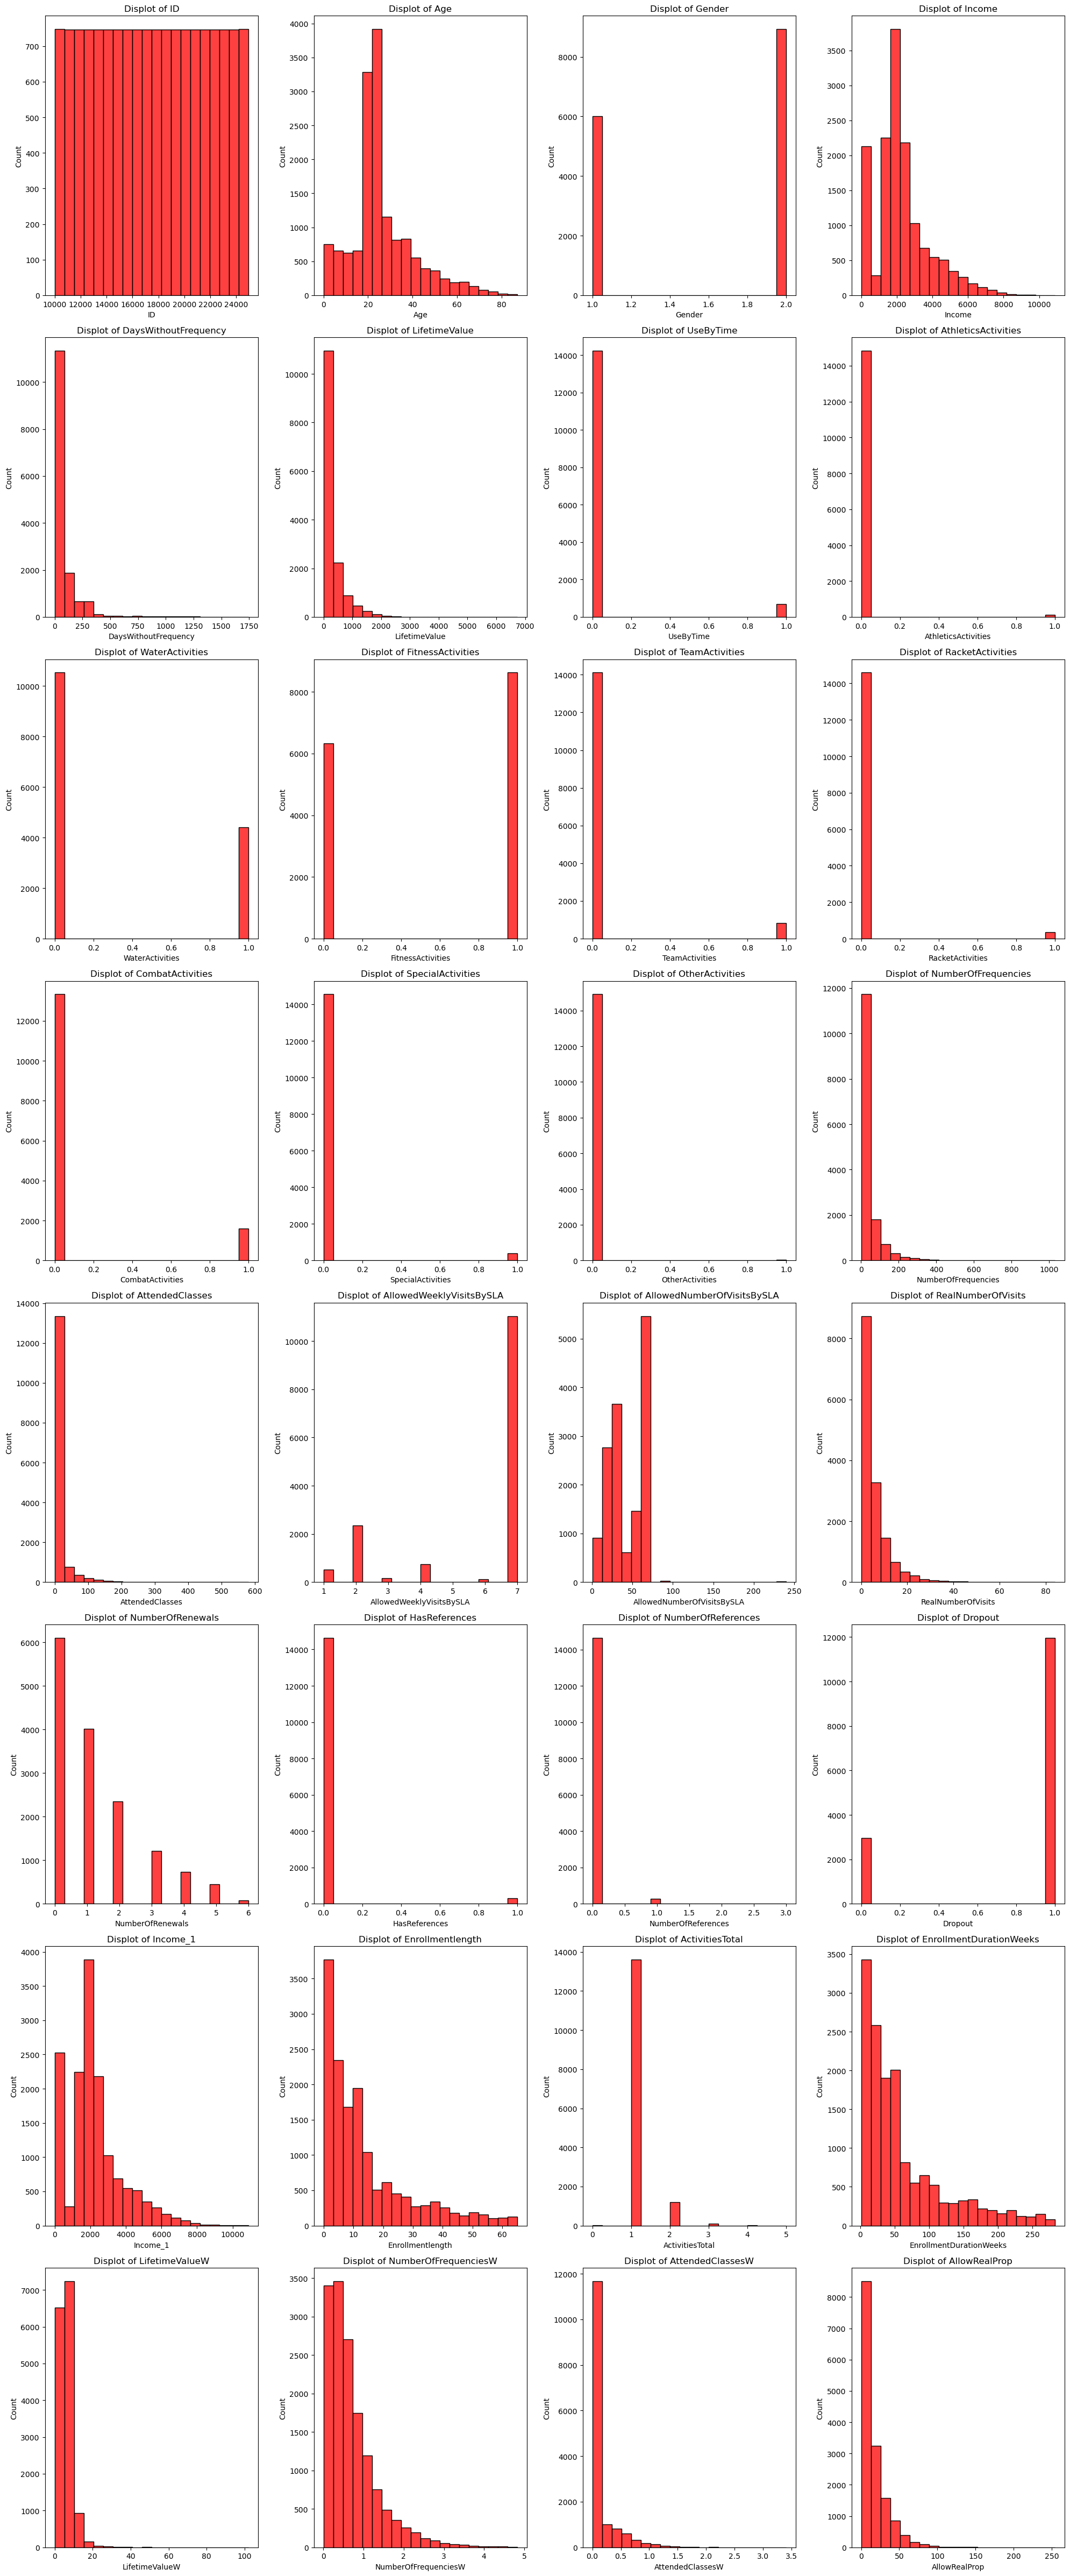

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeros = df_7.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numeros)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows

plt.figure(1, figsize=(20, num_rows * 6))

for n, x in enumerate(numeros, 1):
    plt.subplot(num_rows, 4, n)
    sns.histplot(df_7[x], bins=20, color='red')
    plt.title('Displot of {}'.format(x))

plt.tight_layout()
plt.show()


In [129]:
numeric_F_1= df_7[['Age', 'Gender','Income', 'DaysWithoutFrequency', 
                   'LifetimeValue', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 
                   'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 
                   'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses', 
                   'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 
                   'NumberOfRenewals', 'HasReferences', 'NumberOfReferences', 'Dropout', 'Income_1', 
                   'Enrollmentlength', 'ActivitiesTotal', 'EnrollmentDurationWeeks', 'LifetimeValueW', 
                   'NumberOfFrequenciesW', 'AttendedClassesW', 'AllowRealProp']]

In [130]:
numeric_F_1

Age  Gender  Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
0       60       2  5500.0                     1          89.35          0   
1       29       2  2630.0                    60         479.20          0   
2       23       1  1980.0                     7          37.60          0   
3        9       1     0.0                    22         155.40          0   
4       35       1  4320.0                   210         373.20          0   
...    ...     ...     ...                   ...            ...        ...   
14937   14       1     0.0                     2        1460.45          0   
14938   39       1     NaN                    38         343.85          0   
14939   20       1  1810.0                     2          43.60          0   
14940   55       1  4800.0                     3         788.60          0   
14941   32       2  3700.0                    14         919.60          0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
0                      0.0              0.0                1.0   
1                      0.0              0.0                0.0   
2                      0.0              0.0                1.0   
3                      0.0              0.0                0.0   
4                      0.0              0.0                1.0   
...                    ...              ...                ...   
14937                  0.0              1.0                0.0   
14938                  0.0              0.0                0.0   
14939                  0.0              0.0                1.0   
14940                  0.0              1.0                0.0   
14941                  0.0              0.0                1.0   

       TeamActivities  ...  NumberOfReferences  Dropout  Income_1  \
0                 0.0  ...                   0        0    5500.0   
1                 0.0  ...                   0        1    2630.0   
2                 0.0  ...                   0        1    1980.0   
3                 1.0  ...                   0        1       0.0   
4                 0.0  ...                   0        1    4320.0   
...               ...  ...                 ...      ...       ...   
14937             0.0  ...                   0        0       0.0   
14938             0.0  ...                   0        1    3420.0   
14939             0.0  ...                   0        1    1810.0   
14940             0.0  ...                   0        0    4800.0   
14941             0.0  ...                   0        1    3700.0   

       Enrollmentlength  ActivitiesTotal  EnrollmentDurationWeeks  \
0                     1              1.0                 8.428571   
1                    13              1.0                57.000000   
2                     1              1.0                 4.428571   
3                     5              1.0                23.000000   
4                    25              1.0               111.285714   
...                 ...              ...                      ...   
14937                38              1.0               164.142857   
14938                 8              1.0                37.428571   
14939                 1              1.0                 4.428571   
14940                20              1.0                87.142857   
14941                38              1.0               166.714286   

       LifetimeValueW  NumberOfFrequenciesW  AttendedClassesW  AllowRealProp  
0           10.600847              1.067797          0.830508      31.847134  
1            8.407018              0.403509          0.017544       5.740528  
2            8.490323              1.354839          0.000000      19.980020  
3            6.756522              0.869565          0.086957      16.930023  
4            3.353530              0.368421          0.000000       0.000000  
...               ...                   ...               ...            ...  
14937        8.897433              0.682332          0.584856     

## 9.2 Future Selection Process

### 9.2.1 Correlation Matrix Verification

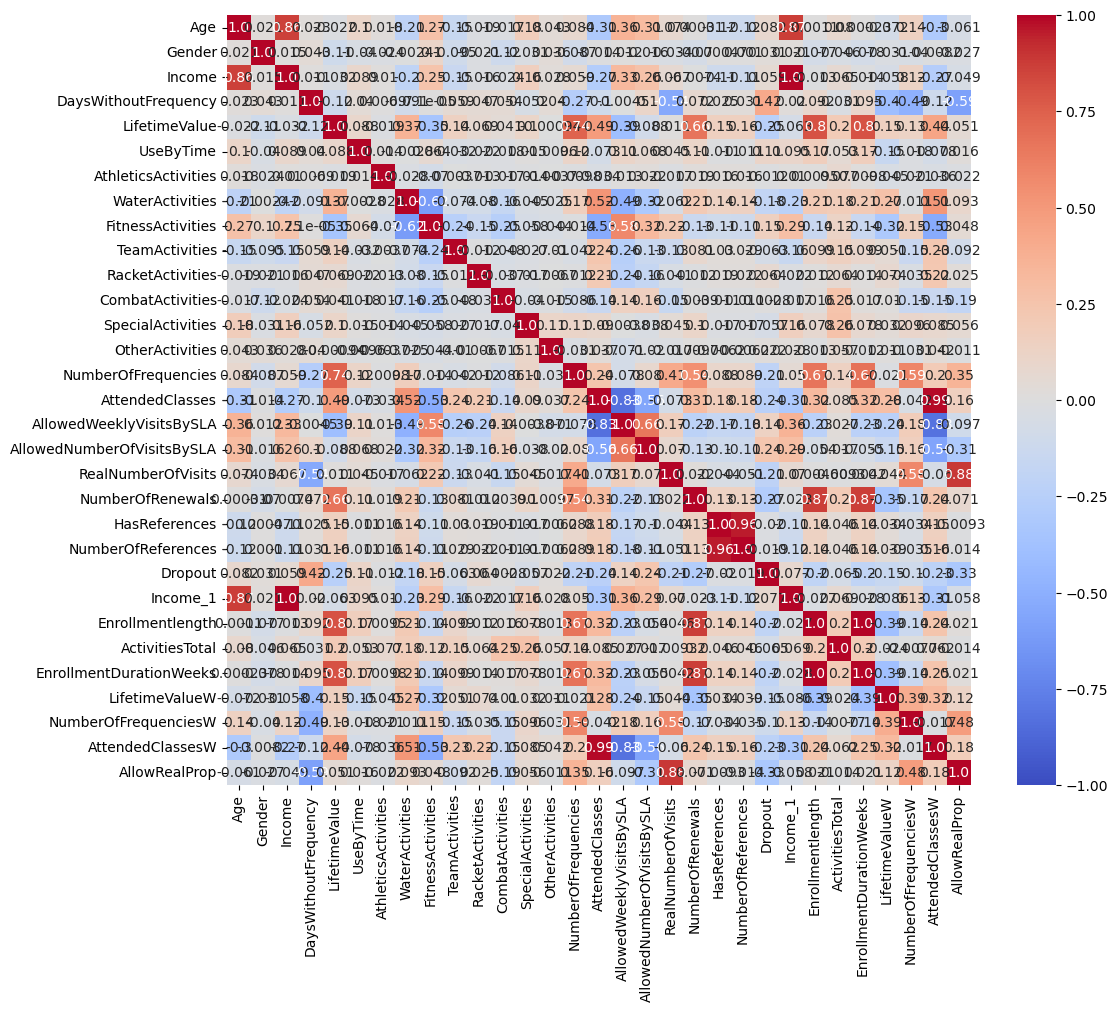

In [131]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, vmin=-1, vmax=1, annot = True, cmap="coolwarm", fmt='.2')
    plt.show()

cor_spearman_df_6 = numeric_F_1.corr(method='spearman')
cor_heatmap(cor_spearman_df_6)


In [132]:
numeric_F_2= df_7[[ 'Age','Gender','Income_1', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences', 'Dropout', 'Enrollmentlength', 'ActivitiesTotal', 'EnrollmentDurationWeeks', 'LifetimeValueW', 'NumberOfFrequenciesW', 'AttendedClassesW', 'AllowRealProp']]

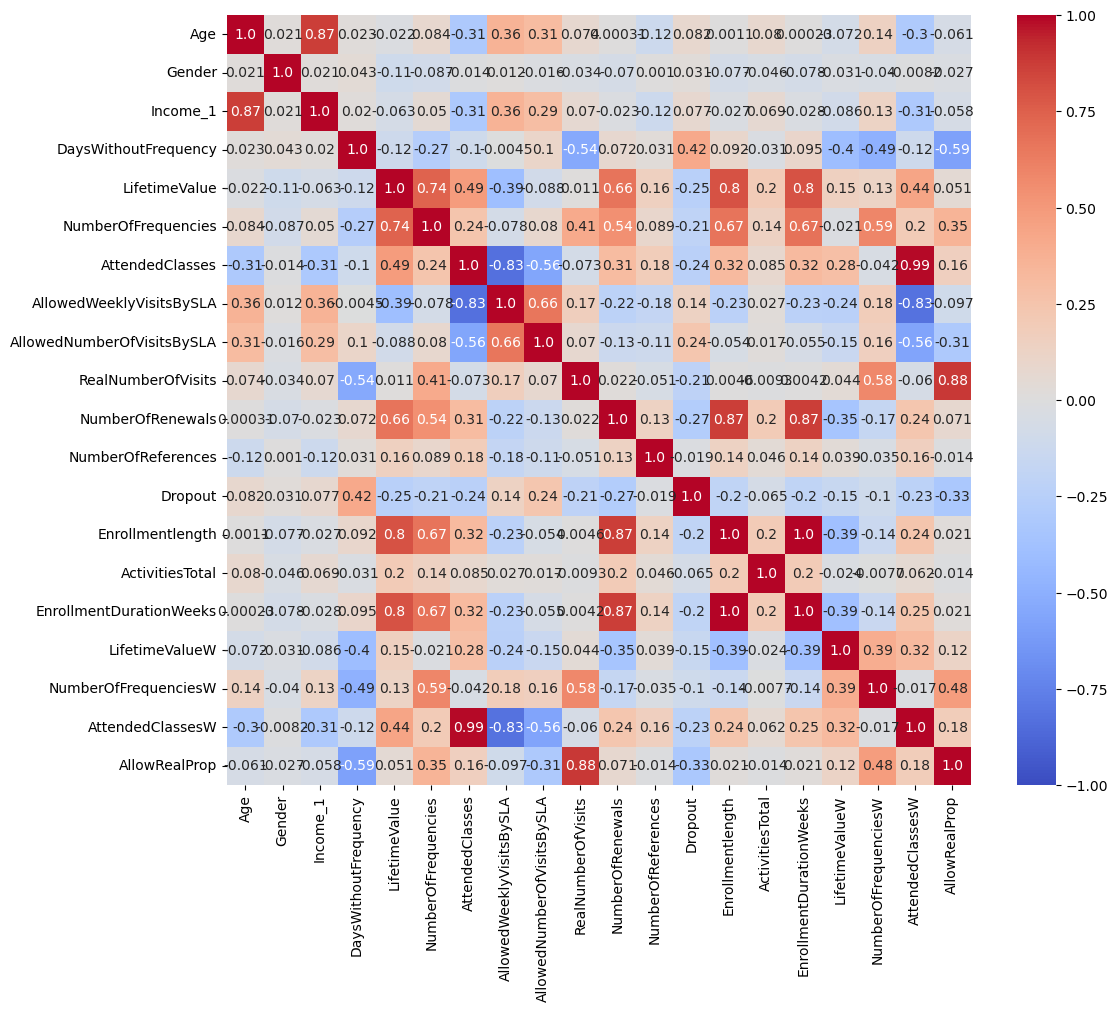

In [133]:
cor_spearman_numeric_F_2 = numeric_F_2.corr(method='spearman')
cor_heatmap(cor_spearman_numeric_F_2)


In [134]:
numeric_F_3= df_7[['Age','Gender', 'Income_1', 'DaysWithoutFrequency', 'LifetimeValue', 
                   'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 
                   'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals', 
                   'NumberOfReferences', 'Dropout','Enrollmentlength', 'ActivitiesTotal', 
                   'EnrollmentDurationWeeks', 'LifetimeValueW', 'NumberOfFrequenciesW', 
                   'AttendedClassesW', 'AllowRealProp']]

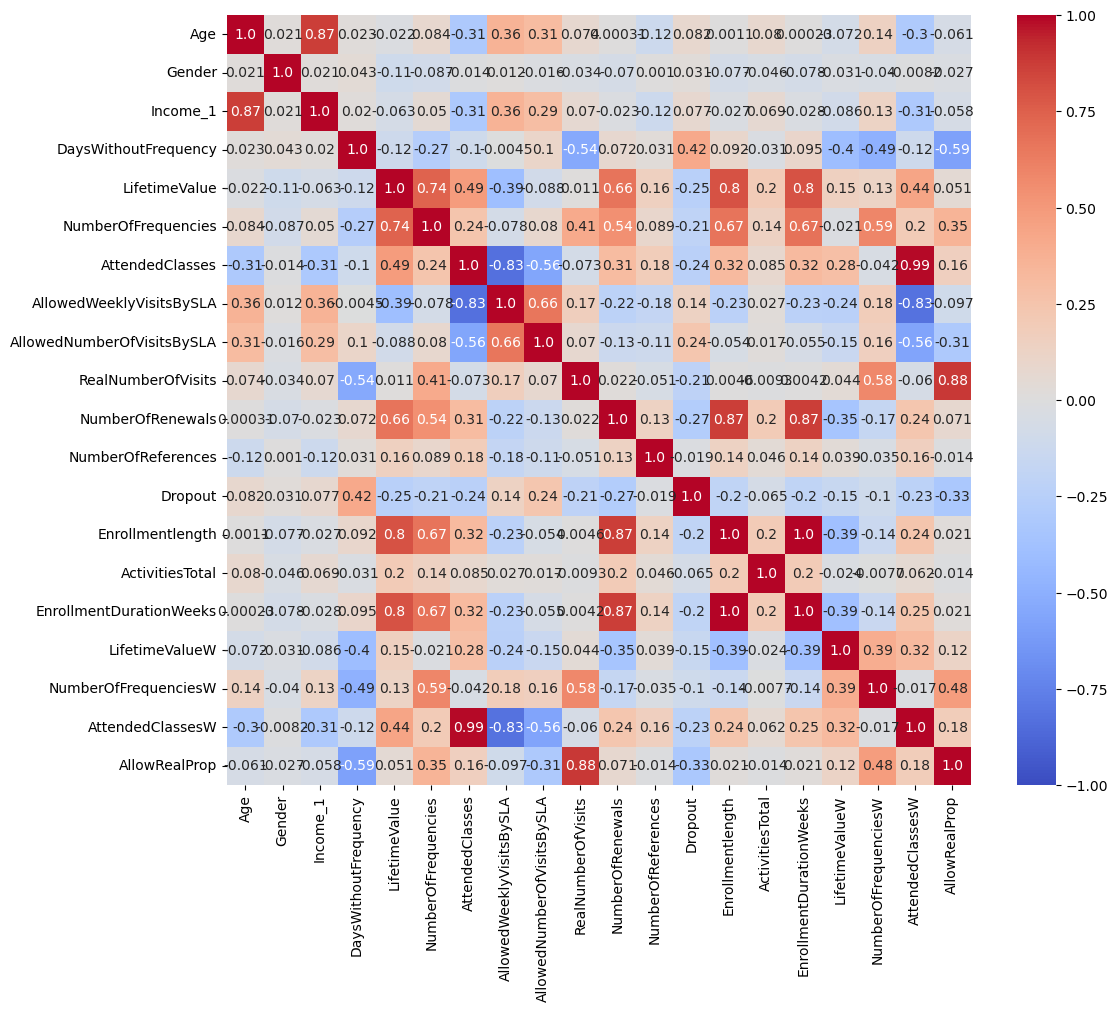

In [135]:
cor_spearman_numeric_F_3 = numeric_F_3.corr(method='spearman')
cor_heatmap(cor_spearman_numeric_F_3)


In [136]:
numeric_F_3.describe(include= 'all').T

count         mean          std       min  \
Age                         14942.0    26.015794    14.156582  0.000000   
Gender                      14942.0     1.597711     0.490376  1.000000   
Income_1                    14942.0  2174.098514  1583.254729  0.000000   
DaysWithoutFrequency        14942.0    81.224936   144.199576  0.000000   
LifetimeValue               14942.0   302.561871   364.319566  0.000000   
NumberOfFrequencies         14942.0    40.054210    65.428767  1.000000   
AttendedClasses             14942.0    10.152456    29.154202  0.000000   
AllowedWeeklyVisitsBySLA    14942.0     5.803975     2.093313  1.000000   
AllowedNumberOfVisitsBySLA  14942.0    41.636299    21.066166  0.560000   
RealNumberOfVisits          14942.0     5.320707     6.332958  0.000000   
NumberOfRenewals            14942.0     1.205260     1.381305  0.000000   
NumberOfReferences          14942.0     0.022286     0.166777  0.000000   
Dropout                     14942.0     0.800964     0.399289  0.000000   
Enrollmentlength            14942.0    13.835564    14.392471  0.000000   
ActivitiesTotal             14942.0     1.094633     0.327058  0.000000   
EnrollmentDurationWeeks     14942.0    61.405157    61.734903  1.285714   
LifetimeValueW              14942.0     5.918412     3.761094  0.000000   
NumberOfFrequenciesW        14942.0     0.711742     0.637477  0.003618   
AttendedClassesW            14942.0     0.125365     0.270917  0.000000   
AllowRealProp               14942.0    15.694687    18.079420  0.000000   

                                    25%          50%          75%  \
Age                           19.000000    23.000000    31.000000   
Gender                         1.000000     2.000000     2.000000   
Income_1                    1410.000000  1960.000000  2760.000000   
DaysWithoutFrequency          13.000000    41.000000    83.750000   
LifetimeValue                 83.600000   166.200000   355.075000   
NumberOfFrequencies            7.000000    18.000000    45.000000   
AttendedClasses                0.000000     0.000000     3.000000   
AllowedWeeklyVisitsBySLA       4.000000     7.000000     7.000000   
AllowedNumberOfVisitsBySLA    25.720000    38.990000    60.970000   
RealNumberOfVisits             1.000000     4.000000     7.000000   
NumberOfRenewals               0.000000     1.000000     2.000000   
NumberOfReferences             0.000000     0.000000     0.000000   
Dropout                        1.000000     1.000000     1.000000   
Enrollmentlength               3.000000     9.000000    19.000000   
ActivitiesTotal                1.000000     1.000000     1.000000   
EnrollmentDurationWeeks       17.000000    40.428571    82.714286   
LifetimeValueW                 3.558662     5.579104     7.508842   
NumberOfFrequenciesW           0.266304     0.534244     0.952705   
AttendedClassesW               0.000000     0.000000     0.094595   
AllowRealProp                  3.224766     9.990010    22.962113   

                                     max  
Age                            87.000000  
Gender                          2.000000  
Income_1                    10890.000000  
DaysWithoutFrequency         1745.000000  
LifetimeValue                6727.800000  
NumberOfFrequencies          1031.000000  
AttendedClasses               581.000000  
AllowedWeeklyVisitsBySLA        7.000000  
AllowedNumberOfVisitsBySLA    240.030000  
RealNumberOfVisits             84.000000  
NumberOfRenewals                6.000000  
NumberOfReferences              3.000000  
Dropout                         1.000000  
Enrollmentlength               65.000000  
ActivitiesTotal                 5.000000  
EnrollmentDurationWeeks       282.571429  
LifetimeValueW                102.050000  
NumberOfFrequenciesW            4.827586  
AttendedClassesW                3.405405  
AllowRealProp                 254.017626

In [137]:
numeric_F_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14942 non-null  int64  
 1   Gender                      14942 non-null  int64  
 2   Income_1                    14942 non-null  float64
 3   DaysWithoutFrequency        14942 non-null  int64  
 4   LifetimeValue               14942 non-null  float64
 5   NumberOfFrequencies         14942 non-null  float64
 6   AttendedClasses             14942 non-null  int64  
 7   AllowedWeeklyVisitsBySLA    14942 non-null  float64
 8   AllowedNumberOfVisitsBySLA  14942 non-null  float64
 9   RealNumberOfVisits          14942 non-null  int64  
 10  NumberOfRenewals            14942 non-null  int64  
 11  NumberOfReferences          14942 non-null  int64  
 12  Dropout                     14942 non-null  int64  
 13  Enrollmentlength            149

In [138]:
numeric_F_3.isna().sum()

Age                           0
Gender                        0
Income_1                      0
DaysWithoutFrequency          0
LifetimeValue                 0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
NumberOfReferences            0
Dropout                       0
Enrollmentlength              0
ActivitiesTotal               0
EnrollmentDurationWeeks       0
LifetimeValueW                0
NumberOfFrequenciesW          0
AttendedClassesW              0
AllowRealProp                 0
dtype: int64

In [139]:
numeric_F_4= df_7[['Age','Gender', 'Income_1','Enrollmentlength','EnrollmentDurationWeeks','DaysWithoutFrequency', 
                 'AllowedWeeklyVisitsBySLA', 'Dropout', 'NumberOfRenewals',  'ActivitiesTotal', 'LifetimeValueW', 
                 'NumberOfFrequenciesW',  'AllowRealProp']]

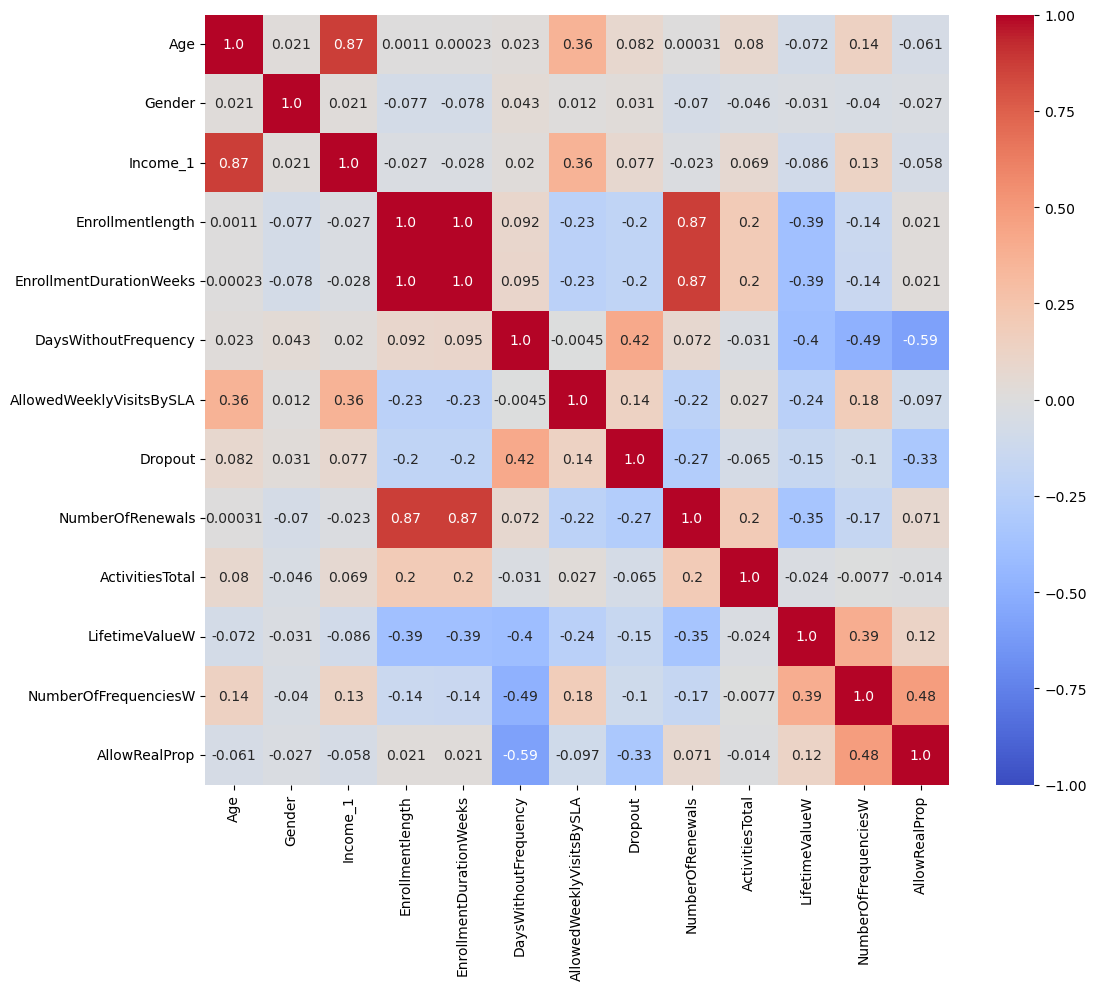

In [140]:
cor_spearman_numeric_F_4 = numeric_F_4.corr(method='spearman')
cor_heatmap(cor_spearman_numeric_F_4)


In [141]:
numeric_F_5= df_7[['Age','Gender', 'DaysWithoutFrequency', 
                    'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA', 'NumberOfRenewals', 
                    'AttendedClassesW','ActivitiesTotal', 'LifetimeValueW', 'NumberOfFrequenciesW',
                    'AllowRealProp', 'NumberOfReferences','Dropout']]

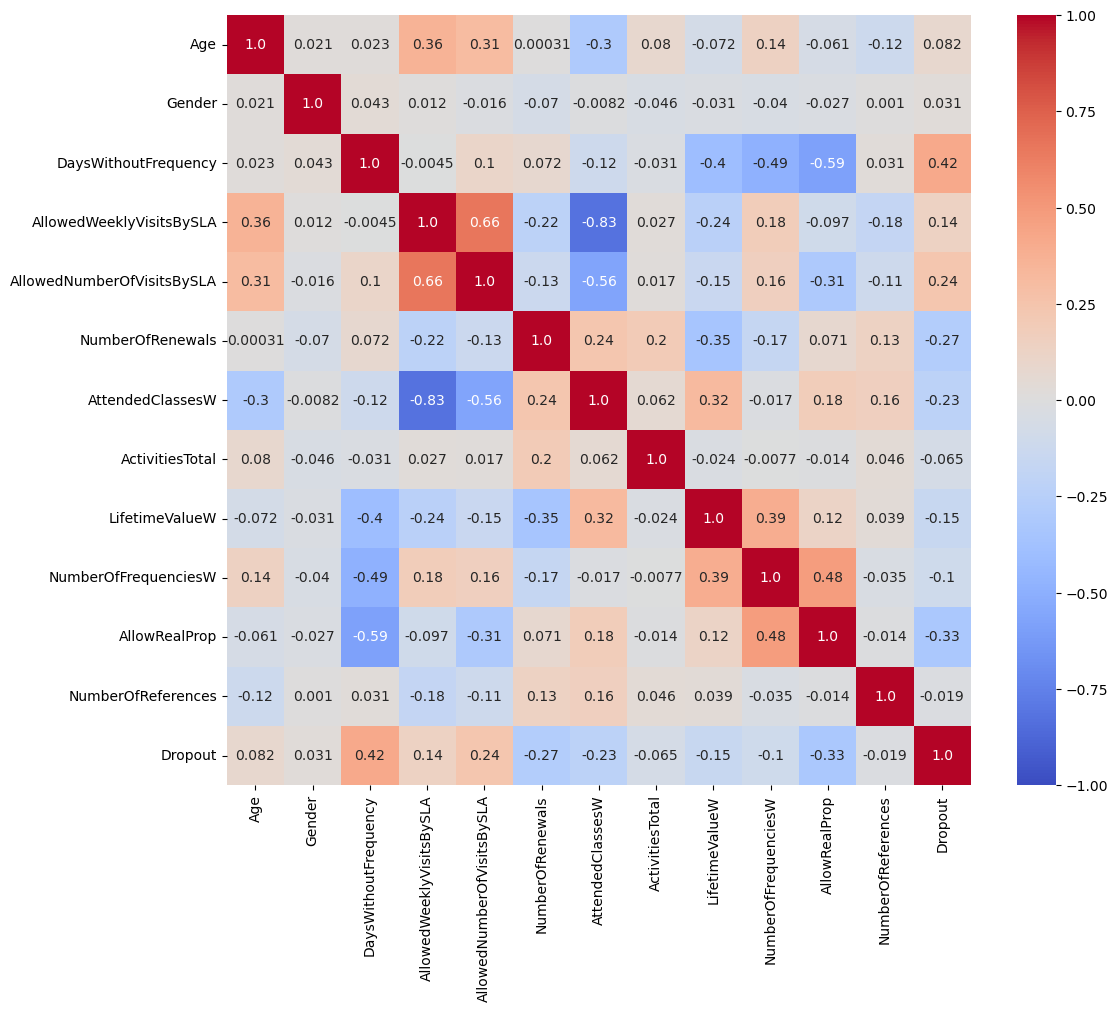

In [142]:
cor_spearman_numeric_F_5 = numeric_F_5.corr(method='spearman')
cor_heatmap(cor_spearman_numeric_F_5)


In [143]:
numeric_F_6= df_7[['Age','Gender', 'DaysWithoutFrequency', 
                    'AllowedWeeklyVisitsBySLA', 'NumberOfRenewals', 
                    'AttendedClassesW','ActivitiesTotal', 'LifetimeValueW', 'NumberOfFrequenciesW',
                    'AllowRealProp', 'NumberOfReferences','Dropout']]

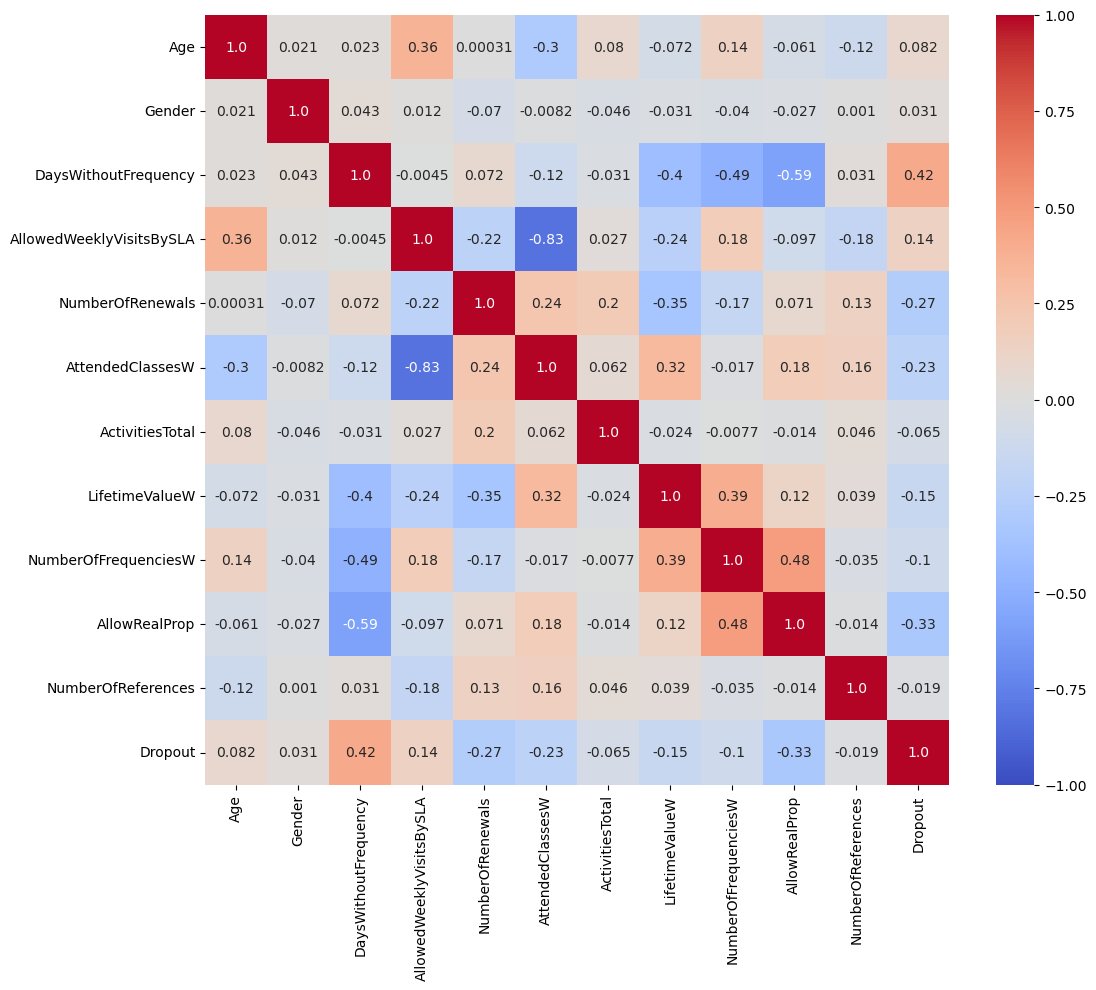

In [144]:
cor_spearman_numeric_F_6 = numeric_F_6.corr(method='spearman')
cor_heatmap(cor_spearman_numeric_F_6)

In [145]:
numeric_F_7= df_7[['Age','Income_1','Gender', 'DaysWithoutFrequency', 
                    'AllowedNumberOfVisitsBySLA', 'NumberOfRenewals', 'Enrollmentlength',
                    'AttendedClassesW','ActivitiesTotal', 'LifetimeValueW', 'NumberOfFrequenciesW',
                    'AllowRealProp', 'NumberOfReferences','Dropout']]

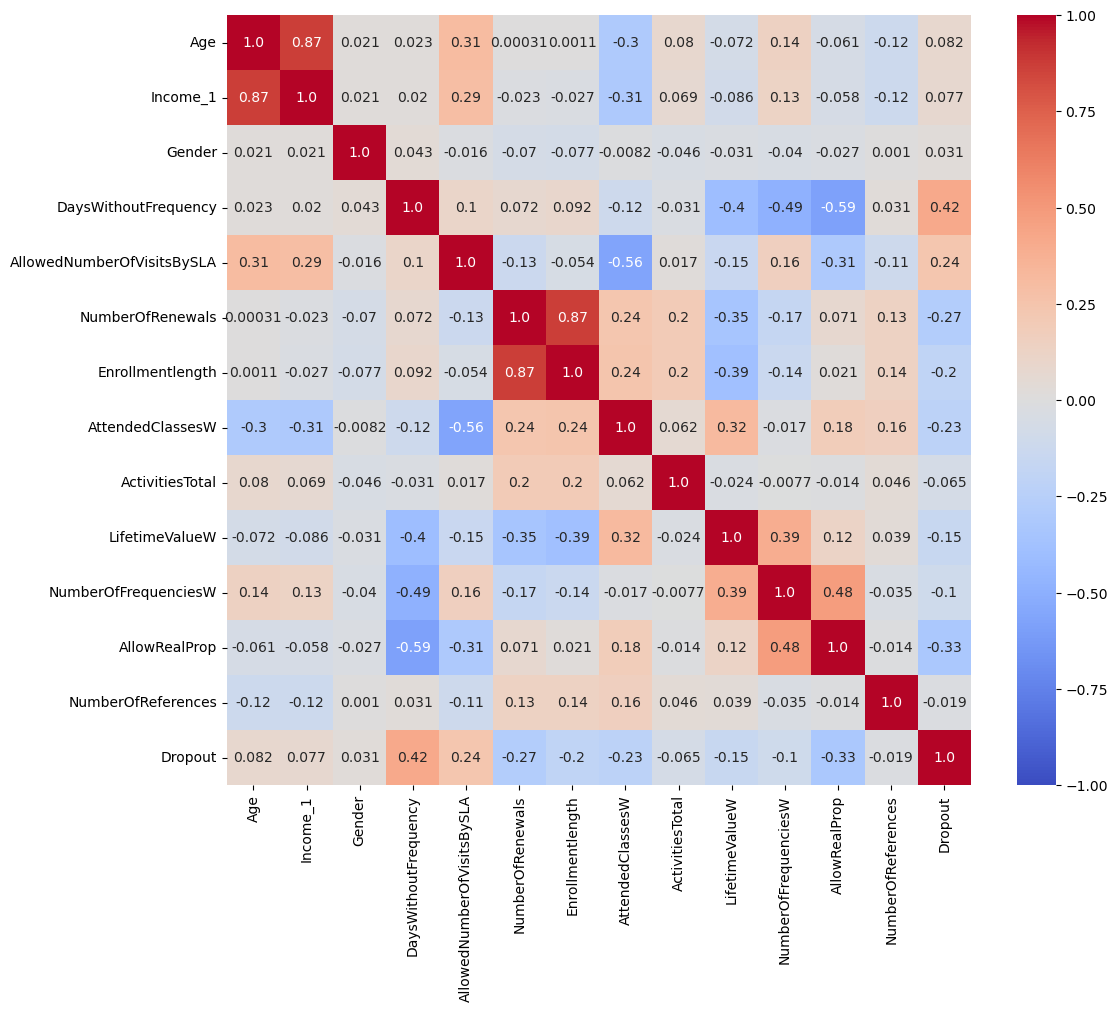

In [146]:
cor_spearman_numeric_F_7 = numeric_F_7.corr(method='spearman')
cor_heatmap(cor_spearman_numeric_F_7)

In [147]:
numeric_F_8= df_7[['Age','Gender', 'DaysWithoutFrequency', 
                    'AllowedNumberOfVisitsBySLA', 'NumberOfRenewals', 
                    'AttendedClassesW','ActivitiesTotal', 'LifetimeValueW', 'NumberOfFrequenciesW',
                    'AllowRealProp', 'NumberOfReferences','Dropout']]

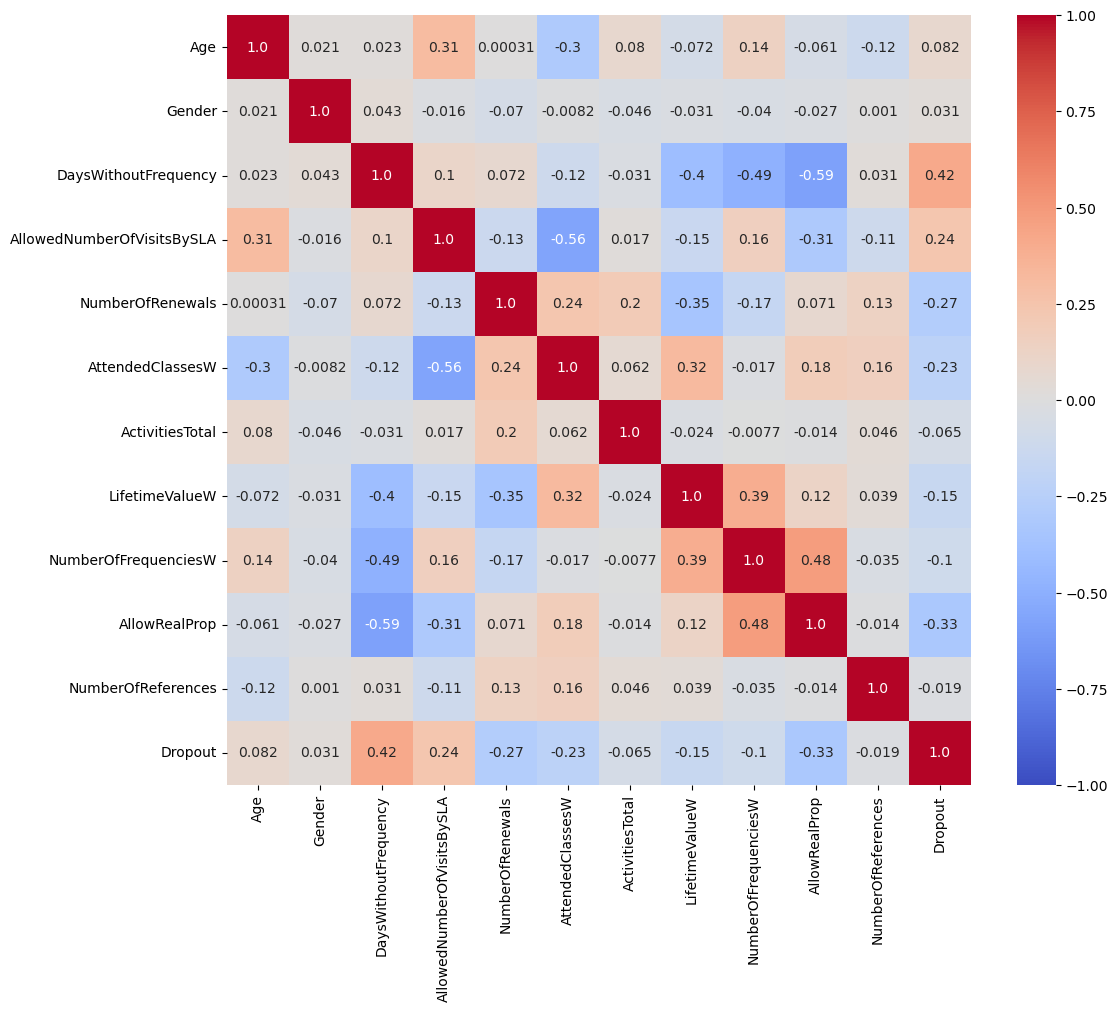

In [148]:
cor_spearman_numeric_F_8 = numeric_F_8.corr(method='spearman')
cor_heatmap(cor_spearman_numeric_F_8)

### Correlated variables 
Texto

## 9.2 Future Selection Process

These profiles allow us to segment users according to the criteria mentioned by Kotler and Keller (2012), which indicates that segmentation is only useful if the segments meet five criteria: they are measurable, substantial, accessible, differentiable and actionable.

In [149]:
df_8=df_7.copy()

In [150]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          14942 non-null  int64         
 1   Age                         14942 non-null  int64         
 2   Gender                      14942 non-null  int64         
 3   Income                      14447 non-null  float64       
 4   EnrollmentStart             14942 non-null  datetime64[ns]
 5   EnrollmentFinish            14942 non-null  object        
 6   LastPeriodStart             14942 non-null  datetime64[ns]
 7   LastPeriodFinish            14942 non-null  datetime64[ns]
 8   DateLastVisit               14942 non-null  datetime64[ns]
 9   DaysWithoutFrequency        14942 non-null  int64         
 10  LifetimeValue               14942 non-null  float64       
 11  UseByTime                   14942 non-null  int64     

Selecting the type - fit into one of the following clustering group 

In [151]:
sociodemographic_features = ['Age','Gender','Income_1']
frequency_features_full = ['Enrollmentlength','EnrollmentDurationWeeks','DaysWithoutFrequency','NumberOfFrequencies',
                      'NumberOfFrequenciesW','AttendedClasses','AttendedClassesW','AthleticsActivities','WaterActivities',
                      'FitnessActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities',
                      'OtherActivities','ActivitiesTotal']
service_agreement_features_full = ['LifetimeValue','LifetimeValueW','UseByTime','AllowedWeeklyVisitsBySLA',
                              'AllowedNumberOfVisitsBySLA','RealNumberOfVisits', 'AllowRealProp',
                              'NumberOfRenewals','HasReferences','NumberOfReferences','Dropout']

Check Correlation I

## First Selection

In [152]:
sociodemographic_features = ['Age','Gender','Income_1']
frequency_features = ['DaysWithoutFrequency','NumberOfFrequenciesW','AttendedClassesW','ActivitiesTotal']
service_agreement_features = ['LifetimeValueW','AllowedWeeklyVisitsBySLA','AllowedNumberOfVisitsBySLA', 
                                 'AllowRealProp','NumberOfRenewals','NumberOfReferences','Dropout']

### SocioDemographic Features: We will see what Socio Demographic Features have discriminant power

### On frequency_features

### 'Age'

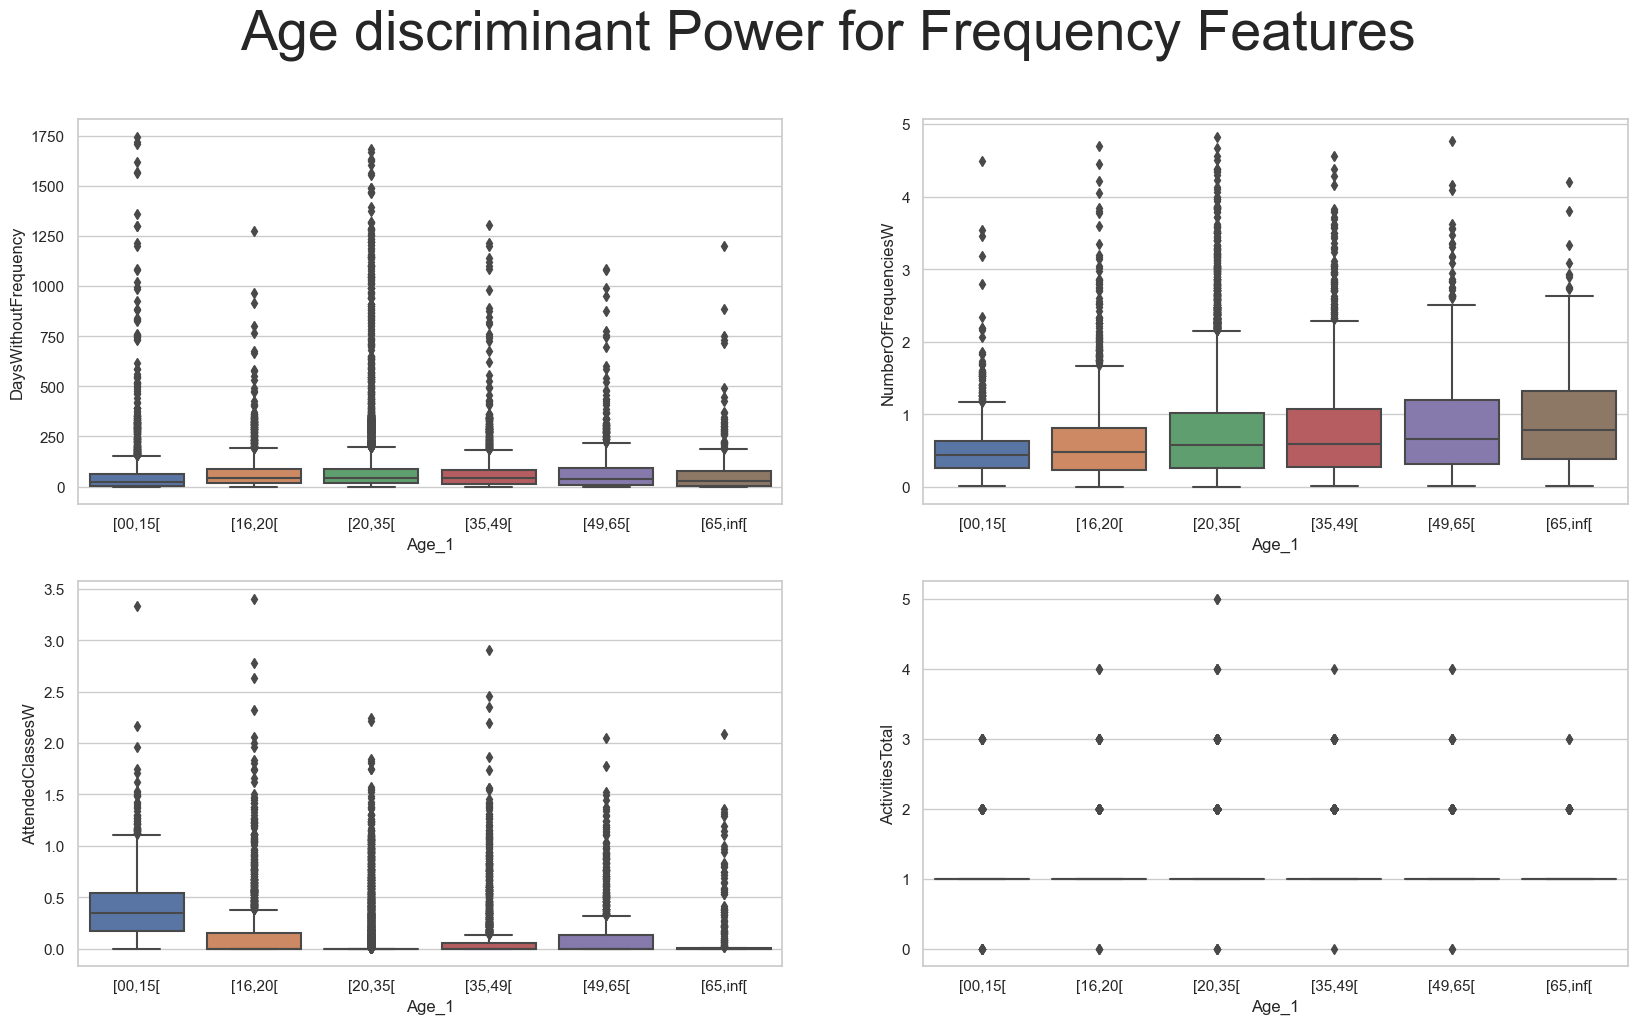

In [153]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
sns.set_palette("Set3")  # You can choose a different palette if you prefer

# All Numeric Variables' Box Plots in one figure
sns.set(style="whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, math.ceil(len(frequency_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), frequency_features): 
    sns.boxplot(x=df_8["Age_1"], y=df_8[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Age discriminant Power for Frequency Features"

plt.suptitle(title, size=40)
plt.show()



### 'Income_1'

In [154]:
# Calculate quartiles
quartiles = df_8['Income_1'].quantile([0, 0.25, 0.5, 0.75, 1])

# Create custom bins and labels
custom_bins = [quartiles.iloc[0], quartiles.iloc[1], quartiles.iloc[2], quartiles.iloc[3], quartiles.iloc[4]]
custom_labels = [1, 2, 3, 4]

# Create the new 'NumberOfFreqQ' column with custom bins and labels
df_8['Income_1Q'] = pd.cut(df_5['Income_1'], bins=custom_bins, labels=custom_labels, right=False)

# Print the DataFrame with the new variable
#print(df_5[['NumberOfFrequencies', 'NumberOfFreqQ']])
df_8[['Income_1', 'Income_1Q']]


Income_1 Income_1Q
0        5500.0         4
1        2630.0         3
2        1980.0         3
3           0.0         1
4        4320.0         4
...         ...       ...
14937       0.0         1
14938    3420.0         4
14939    1810.0         2
14940    4800.0         4
14941    3700.0         4

[14942 rows x 2 columns]

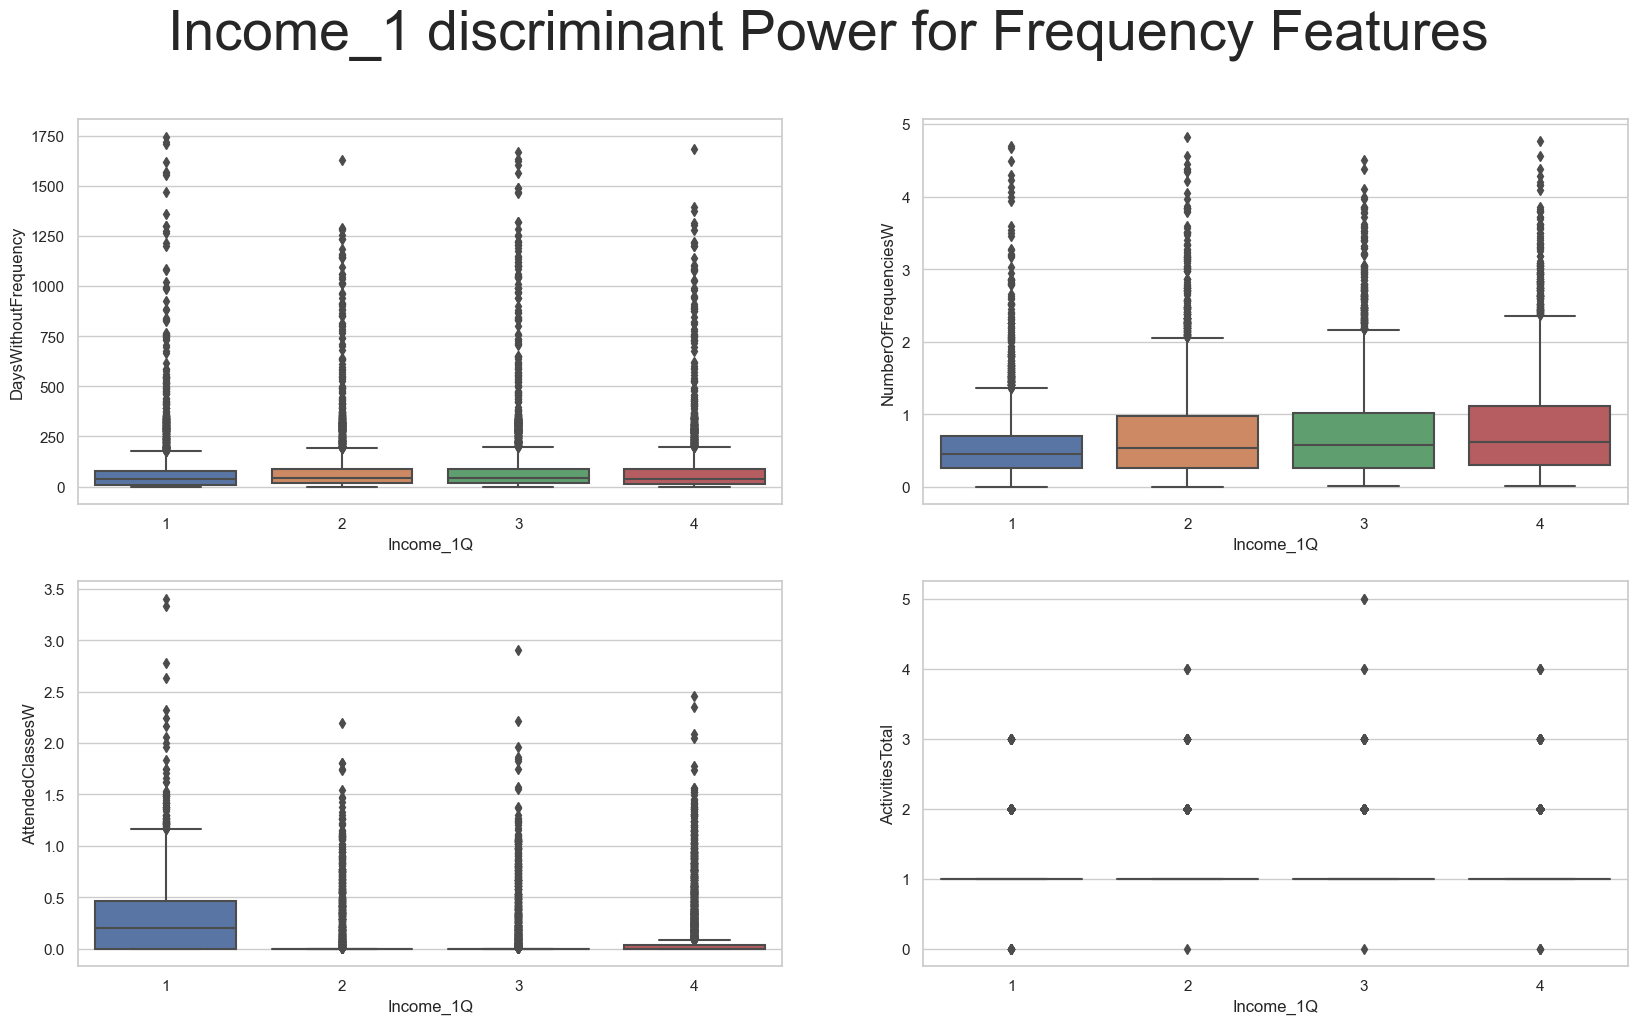

In [155]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
sns.set_palette("Set3")  # You can choose a different palette if you prefer

# All Numeric Variables' Box Plots in one figure
sns.set(style="whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, math.ceil(len(frequency_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), frequency_features): 
    sns.boxplot(x=df_8['Income_1Q'], y=df_8[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Income_1 discriminant Power for Frequency Features"

plt.suptitle(title, size=40)
plt.show()



### 'Gender'

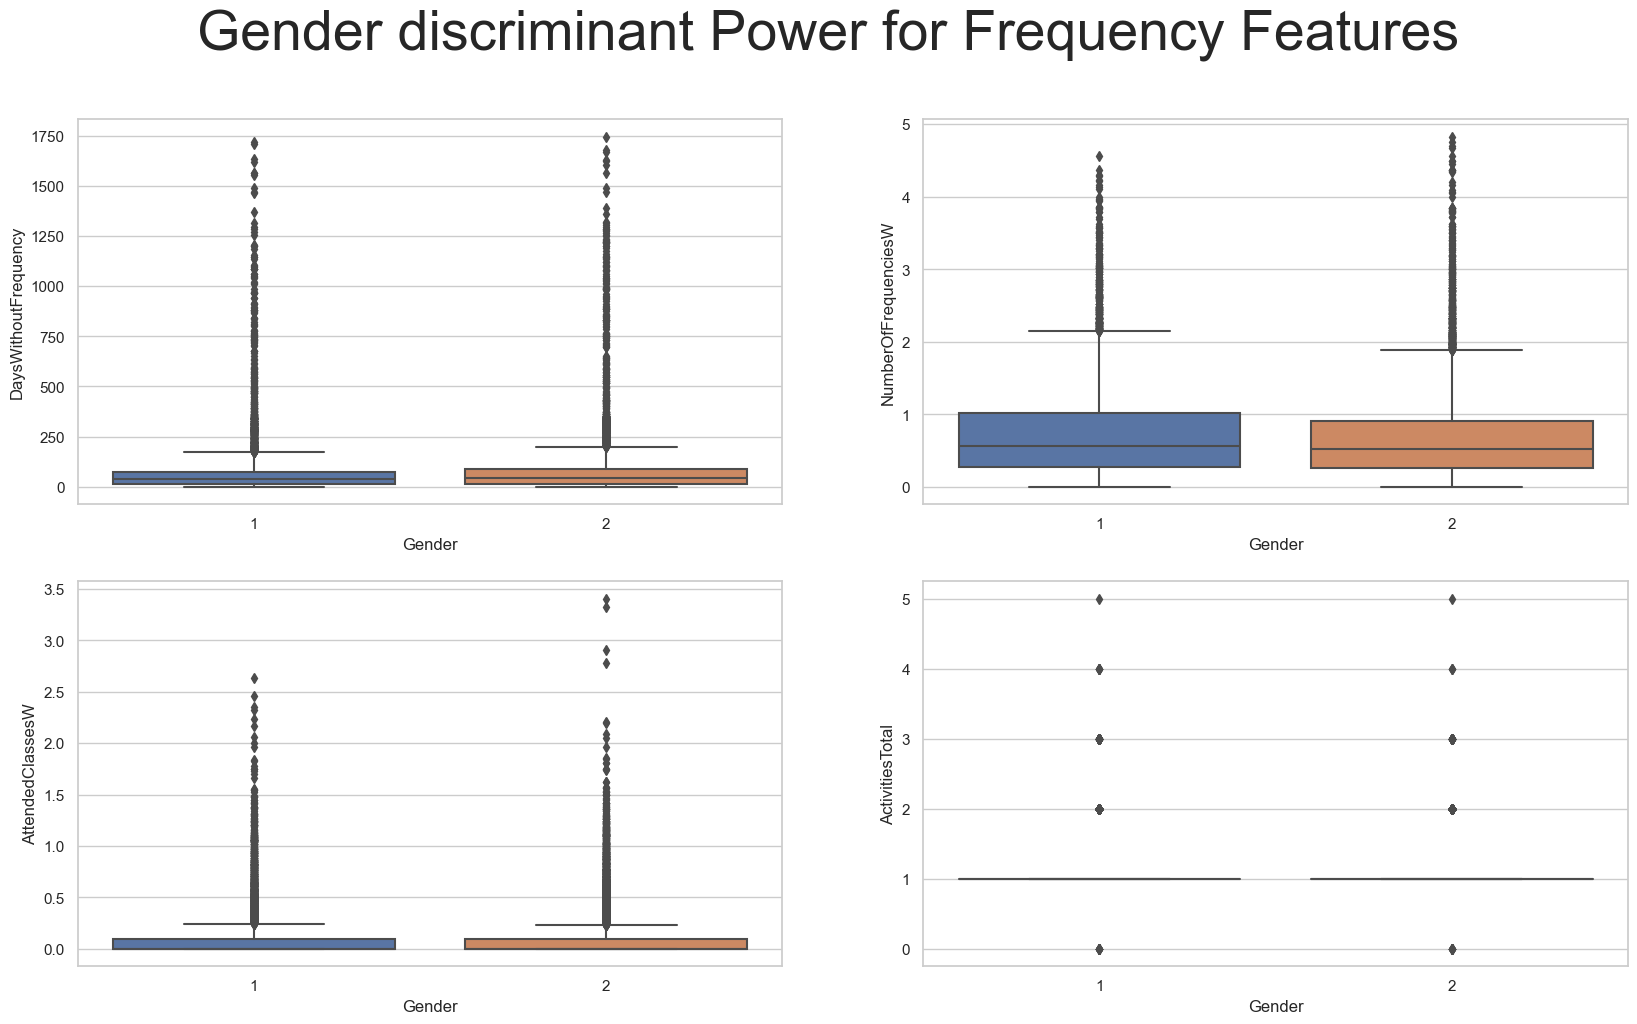

In [156]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
sns.set_palette("Set3")  # You can choose a different palette if you prefer

# All Numeric Variables' Box Plots in one figure
sns.set(style="whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, math.ceil(len(frequency_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), frequency_features): 
    sns.boxplot(x=df_8["Gender"], y=df_8[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Gender discriminant Power for Frequency Features"

plt.suptitle(title, size=40)
plt.show()


### On service_agreement_features

### 'Age'

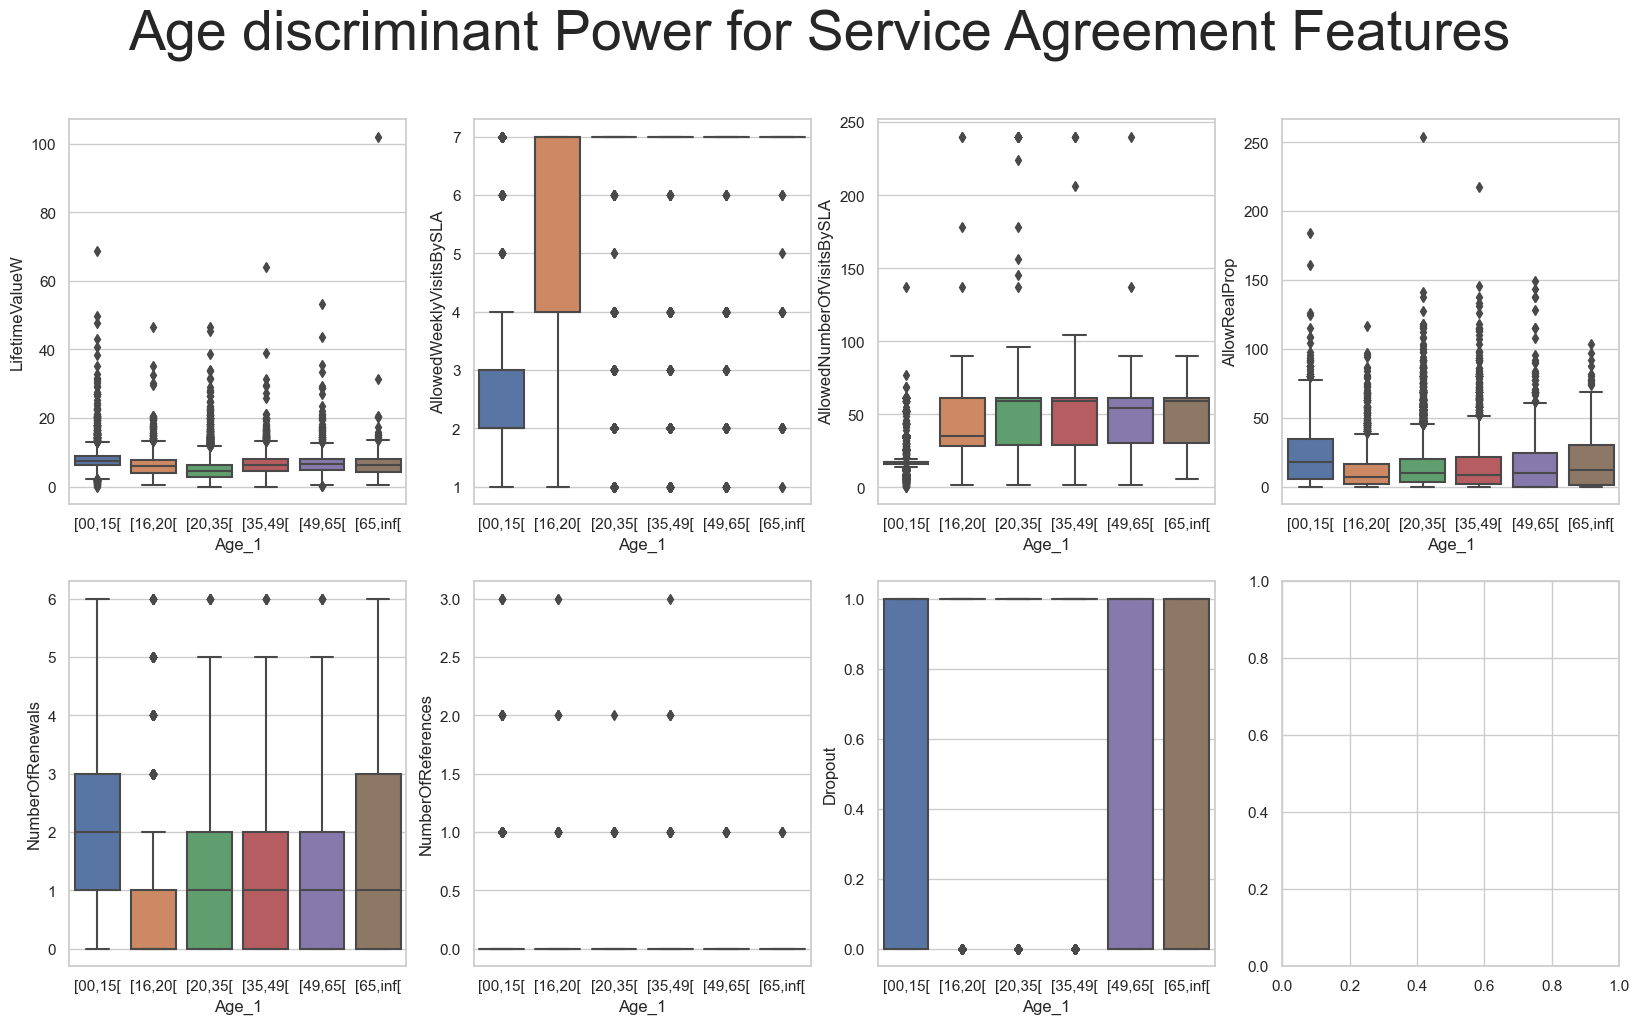

In [157]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
sns.set_palette("Set3")  # You can choose a different palette if you prefer

# All Numeric Variables' Box Plots in one figure
sns.set(style="whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, math.ceil(len(service_agreement_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), service_agreement_features): 
    sns.boxplot(x=df_8["Age_1"], y=df_8[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Age discriminant Power for Service Agreement Features"

plt.suptitle(title, size=40)
plt.show()


### 'Income_1'

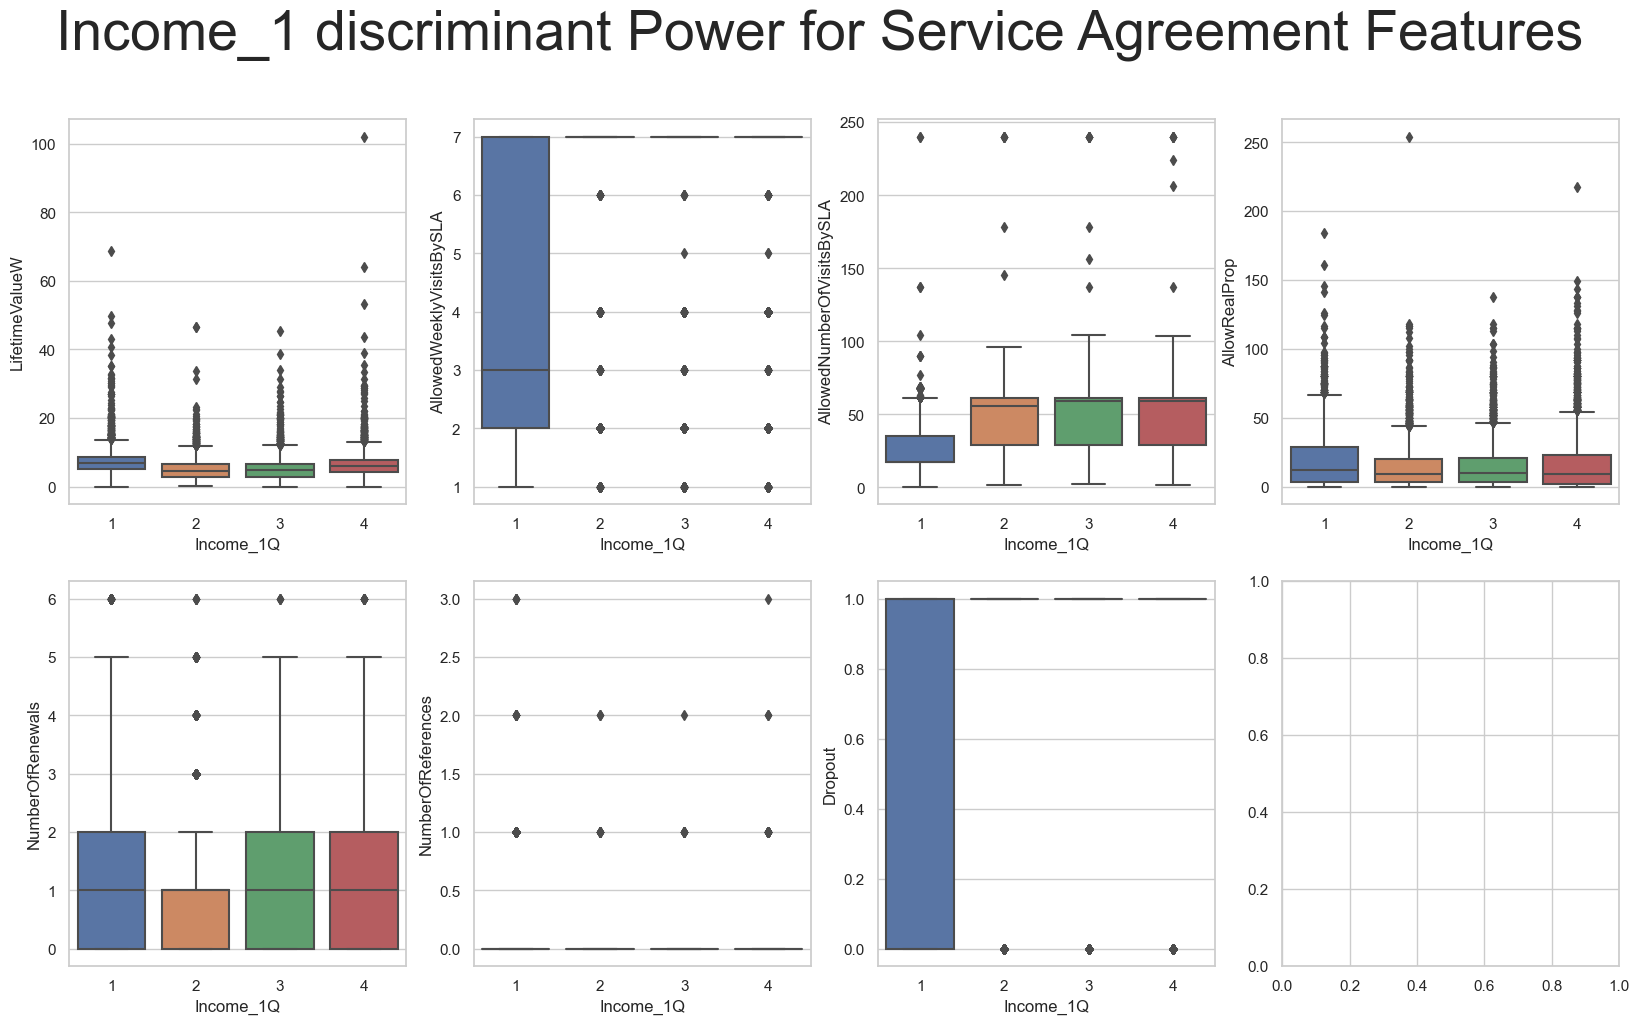

In [158]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
sns.set_palette("Set3")  # You can choose a different palette if you prefer

# All Numeric Variables' Box Plots in one figure
sns.set(style="whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, math.ceil(len(service_agreement_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), service_agreement_features): 
    sns.boxplot(x=df_8["Income_1Q"], y=df_8[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Income_1 discriminant Power for Service Agreement Features"

plt.suptitle(title, size=40)
plt.show()


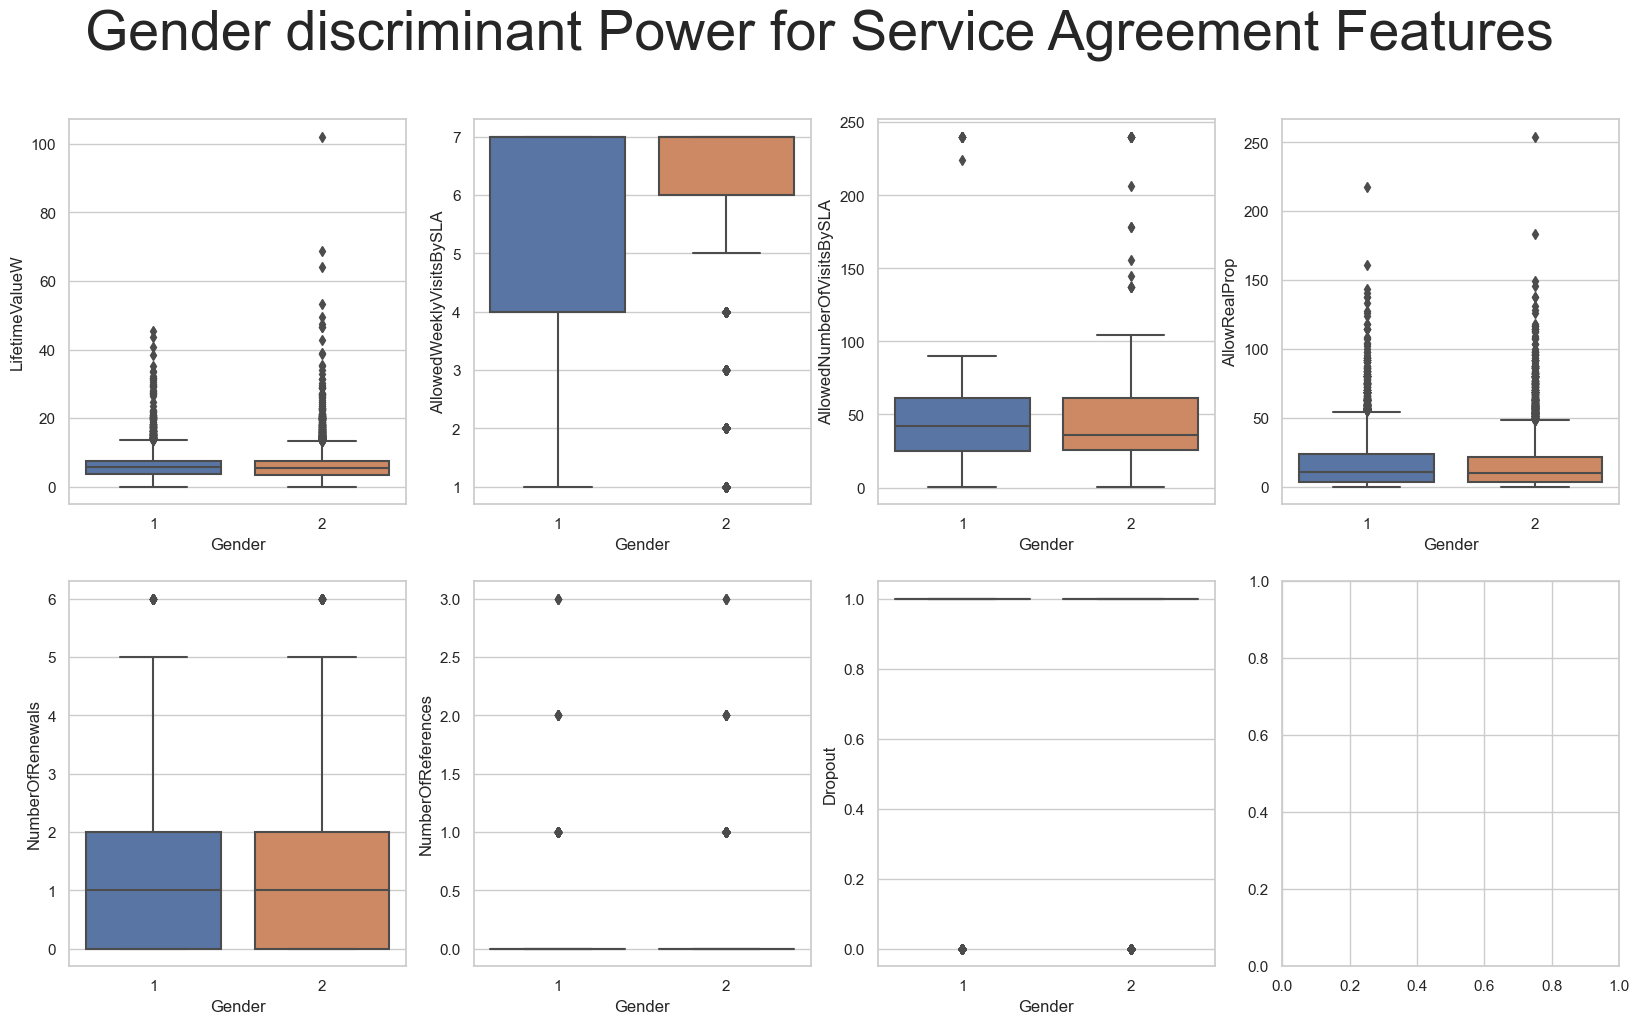

In [159]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
sns.set_palette("Set3")  # You can choose a different palette if you prefer

# All Numeric Variables' Box Plots in one figure
sns.set(style="whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, math.ceil(len(service_agreement_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), service_agreement_features): 
    sns.boxplot(x=df_8["Gender"], y=df_8[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Gender discriminant Power for Service Agreement Features"

plt.suptitle(title, size=40)
plt.show()

In [252]:
Feature correlation

SyntaxError: invalid syntax (933619649.py, line 1)

Feature Selected

In [383]:
feature_1= df_8[['Age', 'Gender', 'DaysWithoutFrequency', 'AllowedWeeklyVisitsBySLA', 
                 'NumberOfRenewals', 'LifetimeValueW', 'ActivitiesTotal','AttendedClassesW',
                 'NumberOfFrequenciesW',  'AllowRealProp', 'Dropout', 'NumberOfReferences',]]

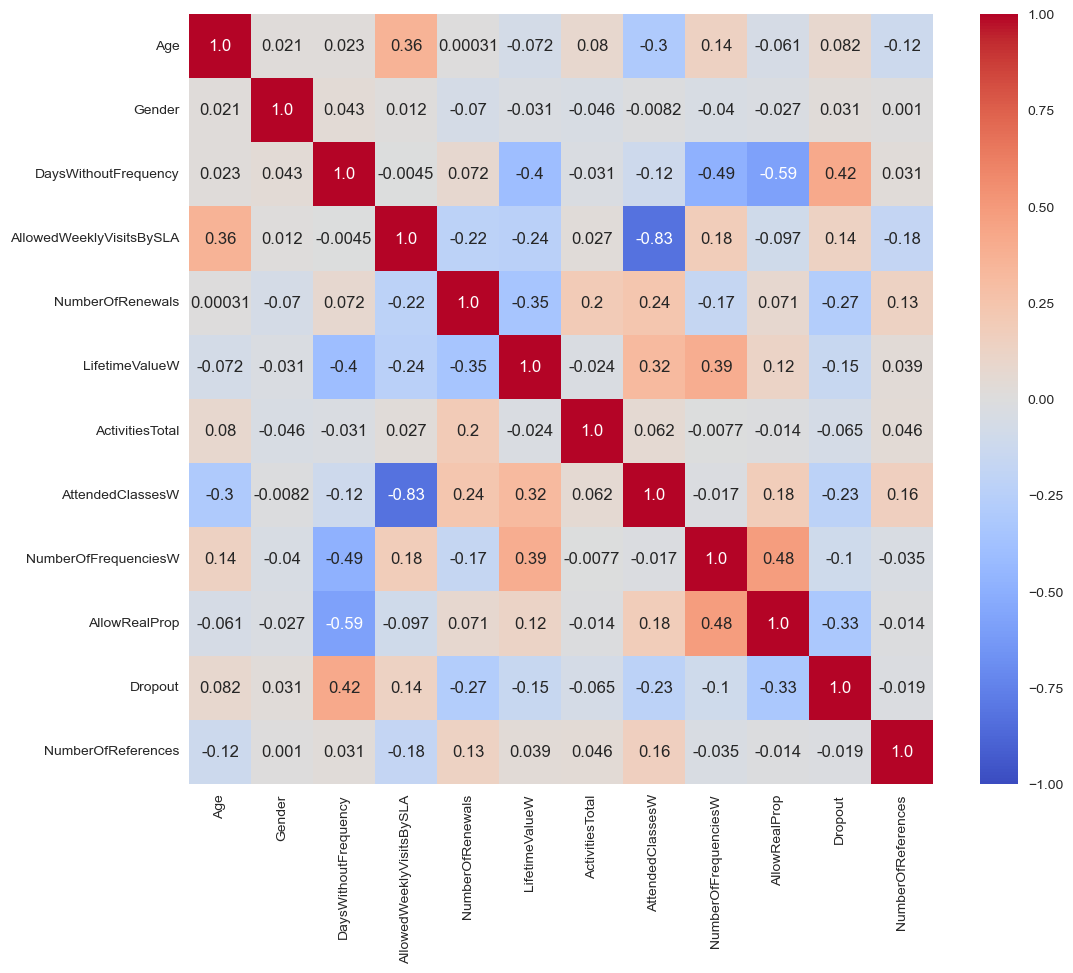

In [384]:
cor_spearman_feature_1 = feature_1.corr(method='spearman')
cor_heatmap(cor_spearman_feature_1)


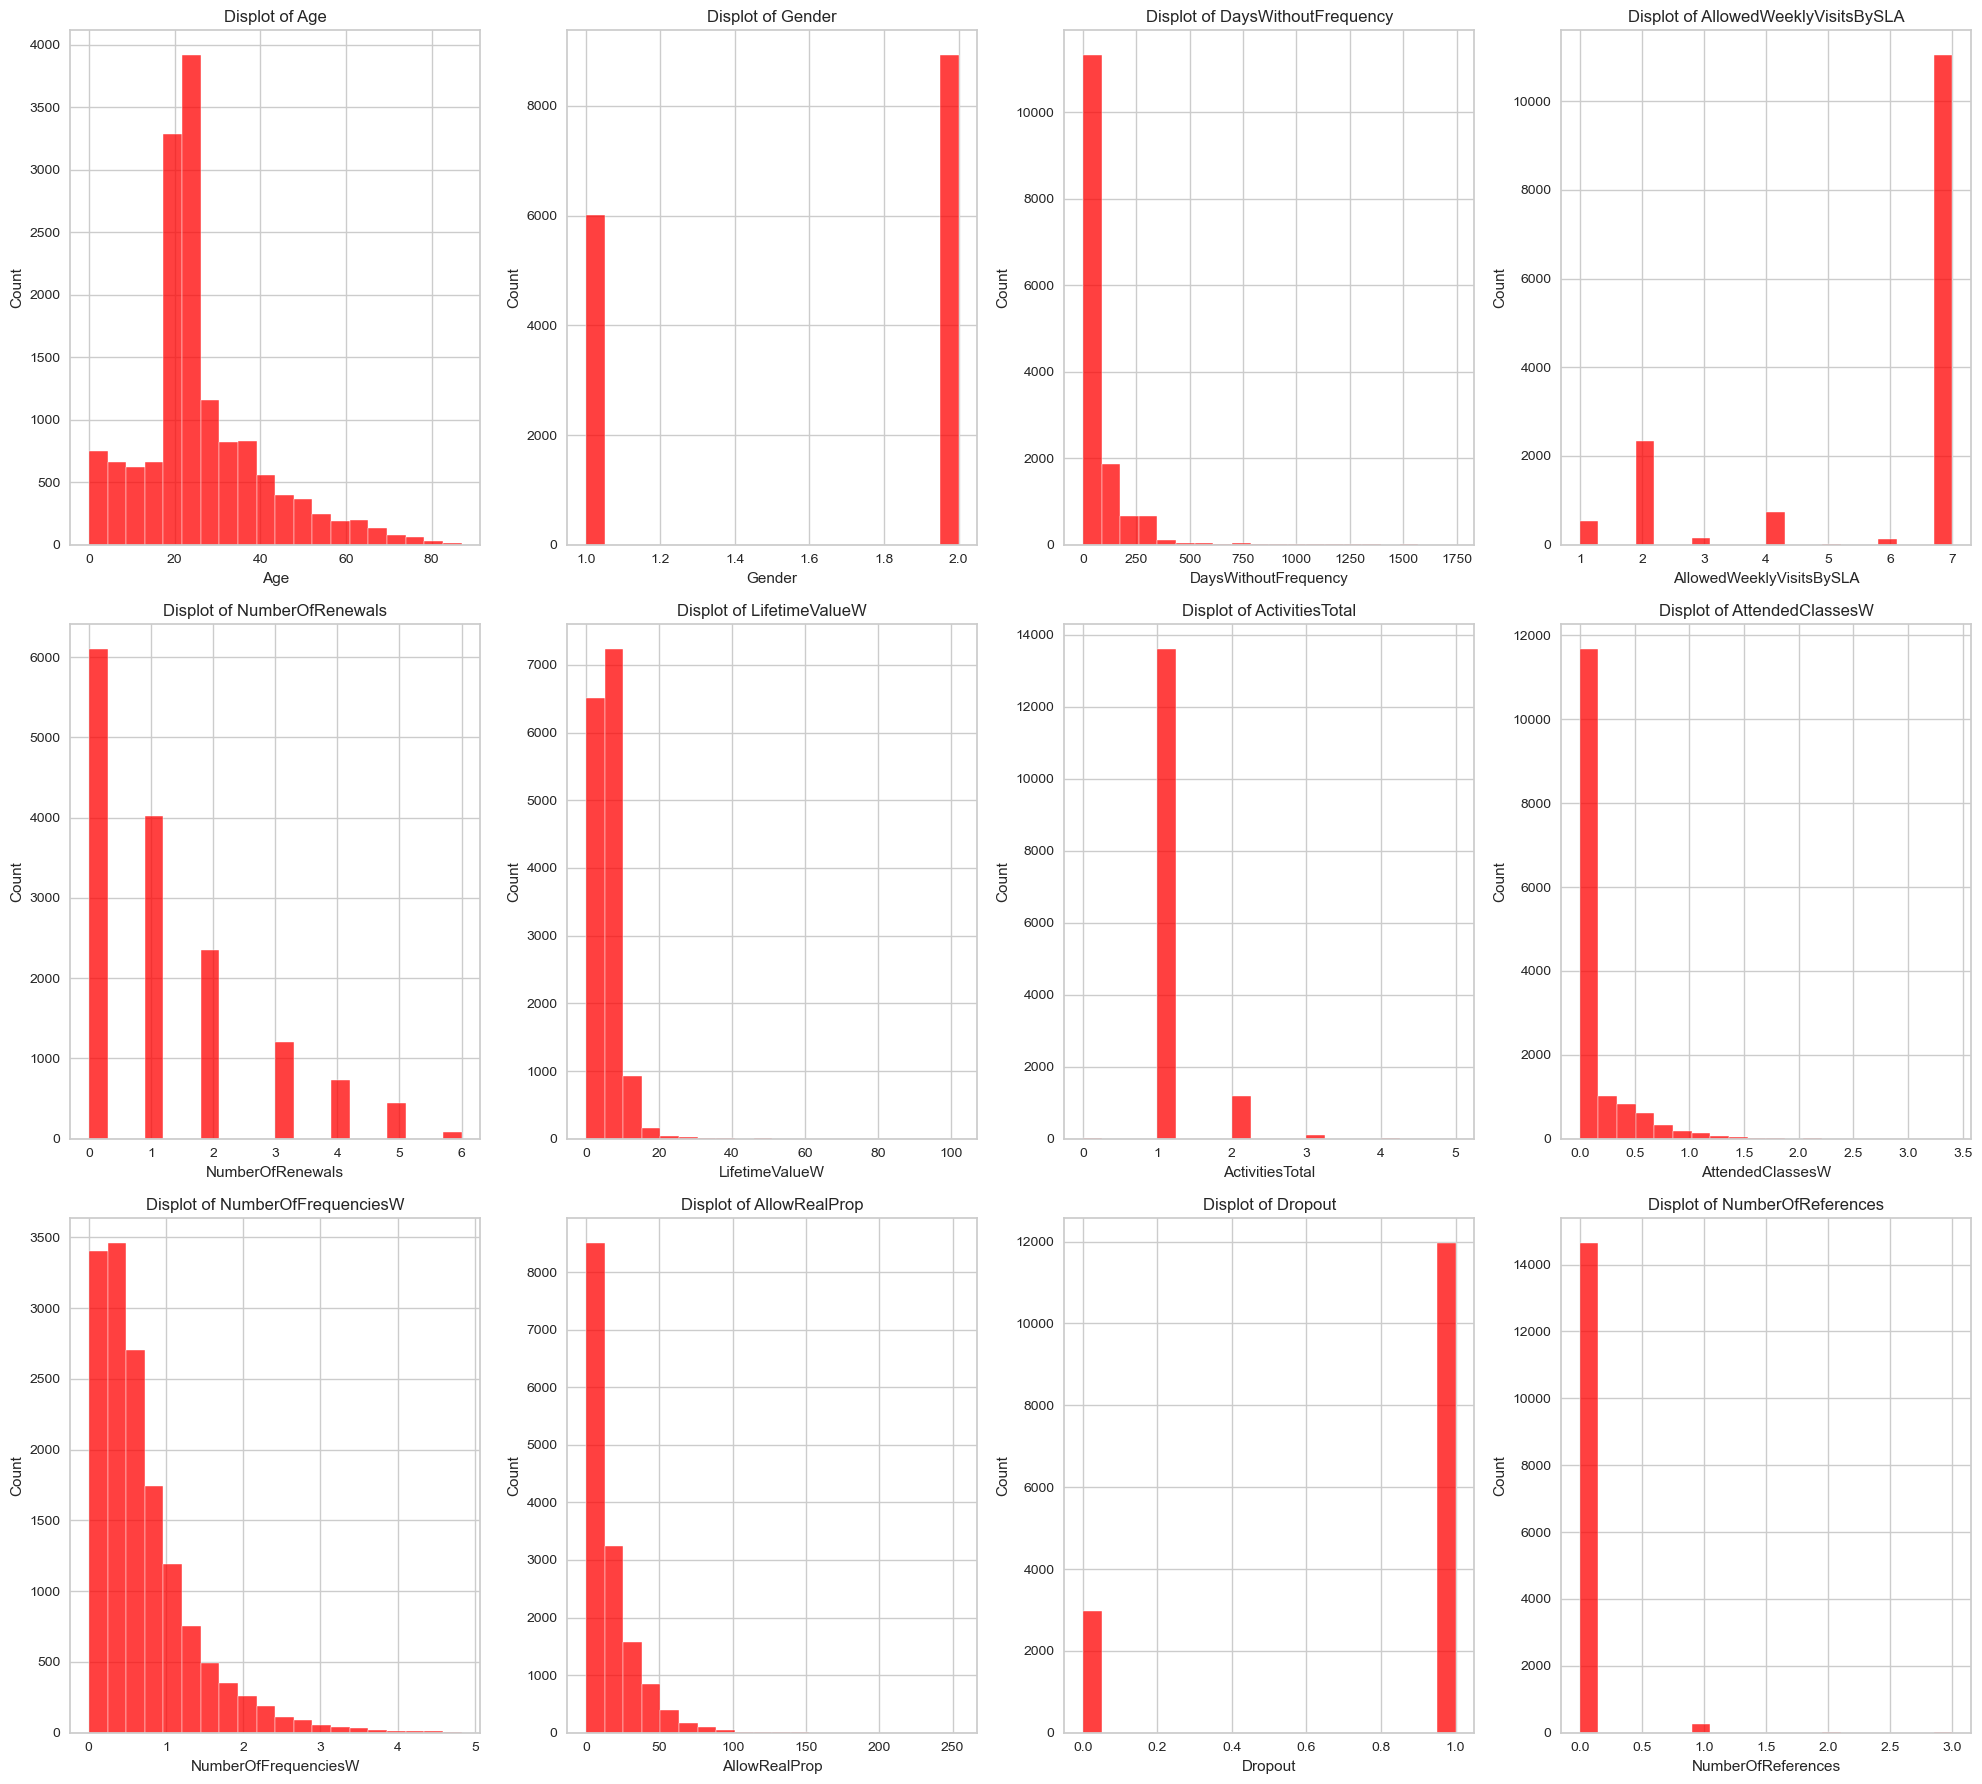

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeros = feature_1.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numeros)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows

plt.figure(1, figsize=(20, num_rows * 6))

for n, x in enumerate(numeros, 1):
    plt.subplot(num_rows, 4, n)
    sns.histplot(df_9[x], bins=20, color='red')
    plt.title('Displot of {}'.format(x))

plt.tight_layout()
plt.show()

In [386]:
feature_2= df_8[['Income_1', 'Gender', 'DaysWithoutFrequency', 'AllowedWeeklyVisitsBySLA', 
                 'NumberOfRenewals', 'LifetimeValueW', 'ActivitiesTotal','AttendedClassesW',
                 'NumberOfFrequenciesW',  'AllowRealProp', 'Dropout', 'NumberOfReferences',]]

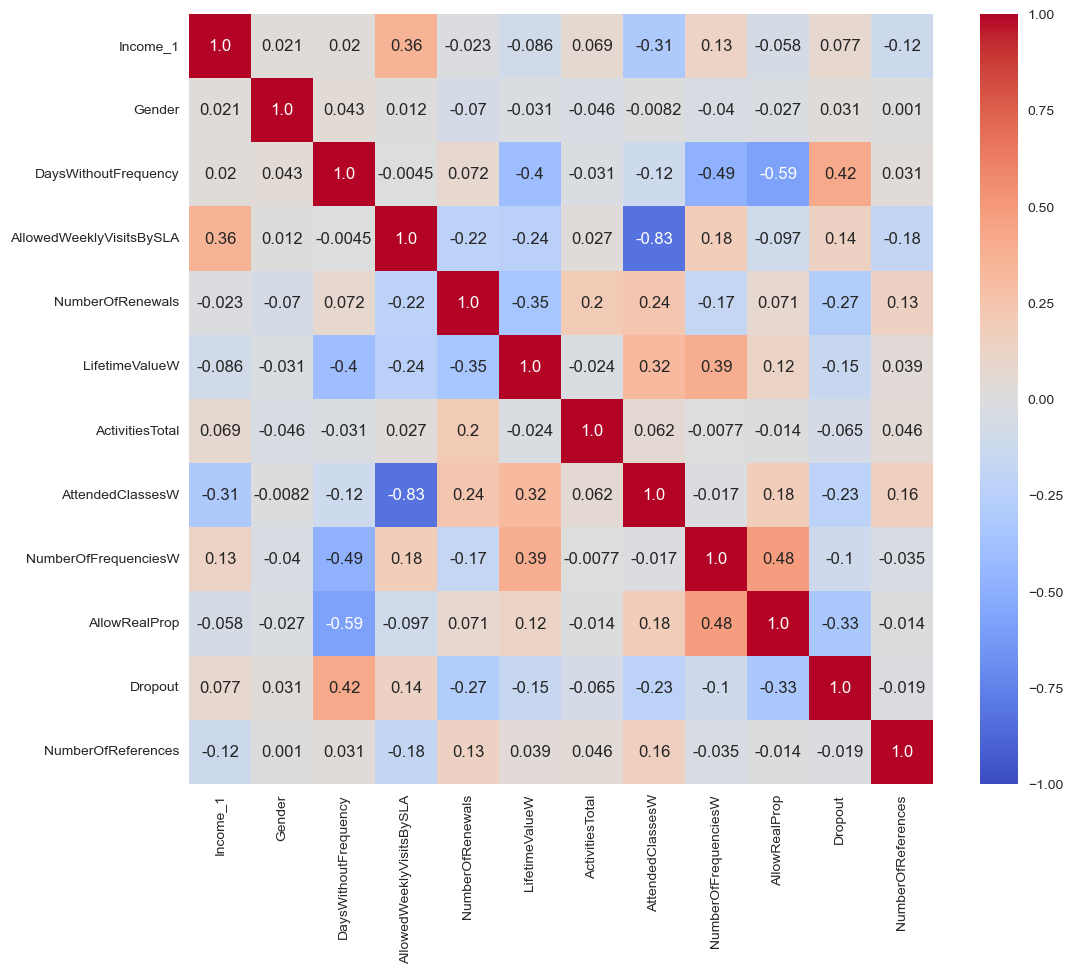

In [387]:
cor_spearman_feature_2 = feature_2.corr(method='spearman')
cor_heatmap(cor_spearman_feature_2)


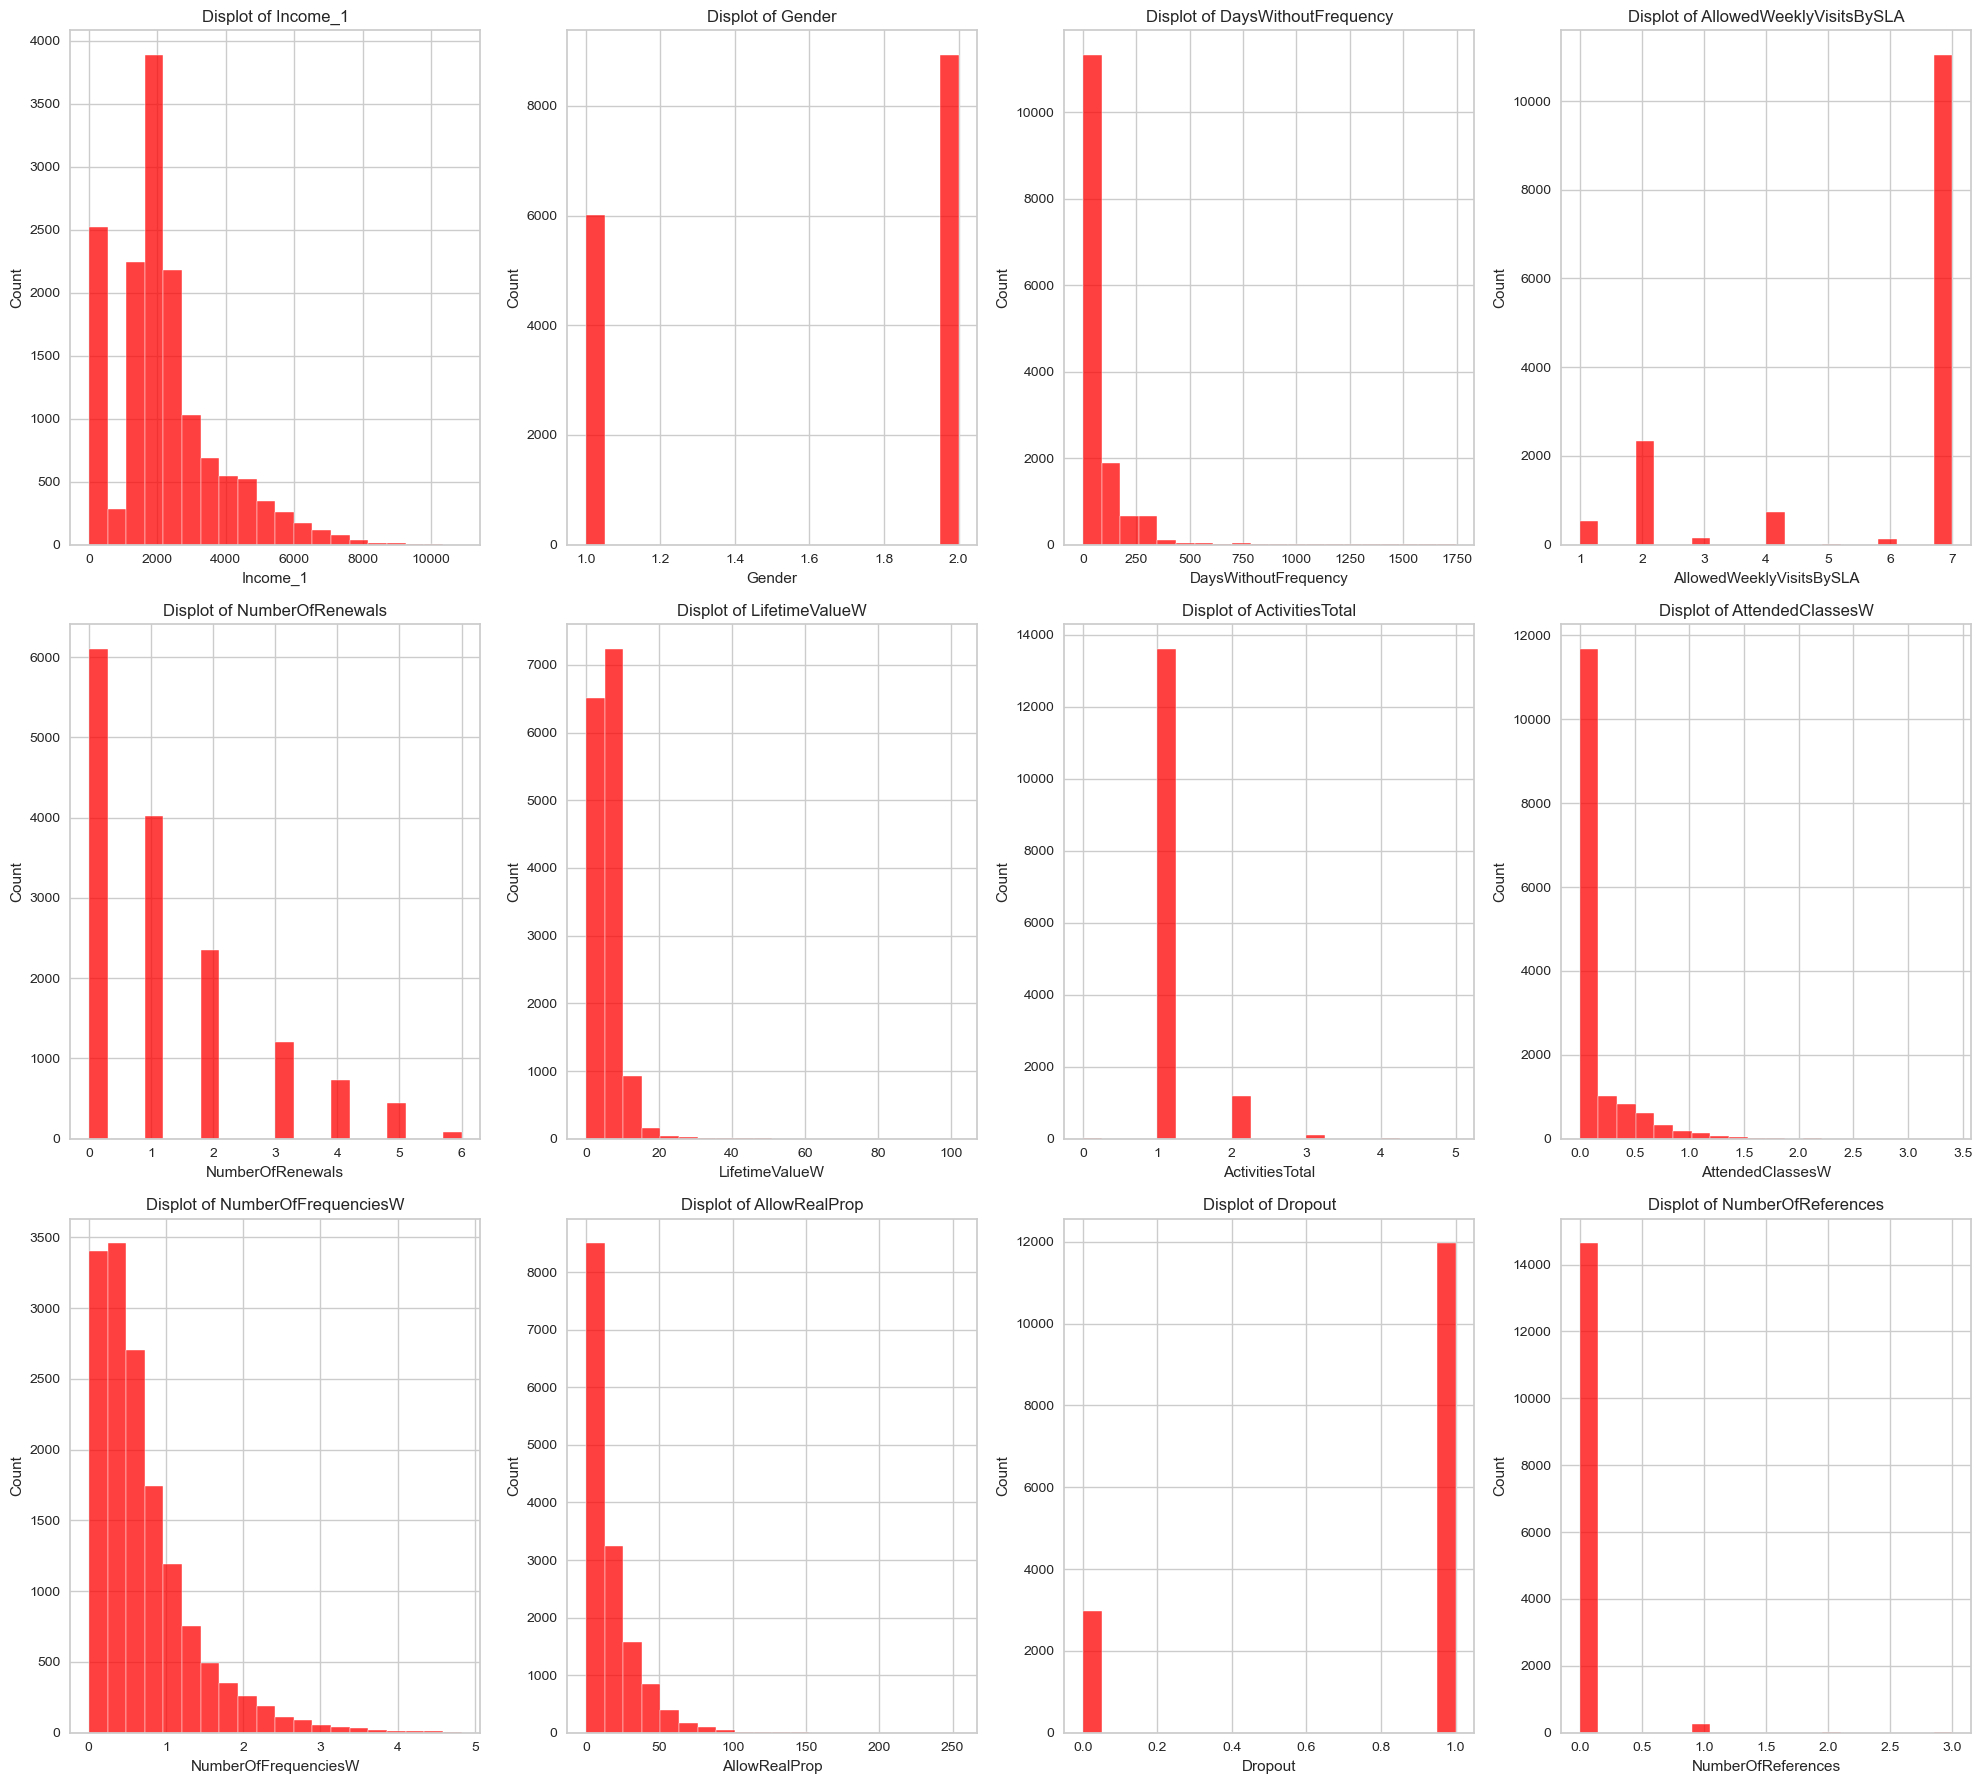

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeros = feature_2.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numeros)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows

plt.figure(1, figsize=(20, num_rows * 6))

for n, x in enumerate(numeros, 1):
    plt.subplot(num_rows, 4, n)
    sns.histplot(df_9[x], bins=20, color='red')
    plt.title('Displot of {}'.format(x))

plt.tight_layout()
plt.show()

# 10. Data Outliers Check

In [389]:
df_9=df_8.copy()

In [390]:
df_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          14942 non-null  int64         
 1   Age                         14942 non-null  int64         
 2   Gender                      14942 non-null  int64         
 3   Income                      14447 non-null  float64       
 4   EnrollmentStart             14942 non-null  datetime64[ns]
 5   EnrollmentFinish            14942 non-null  object        
 6   LastPeriodStart             14942 non-null  datetime64[ns]
 7   LastPeriodFinish            14942 non-null  datetime64[ns]
 8   DateLastVisit               14942 non-null  datetime64[ns]
 9   DaysWithoutFrequency        14942 non-null  int64         
 10  LifetimeValue               14942 non-null  float64       
 11  UseByTime                   14942 non-null  int64     

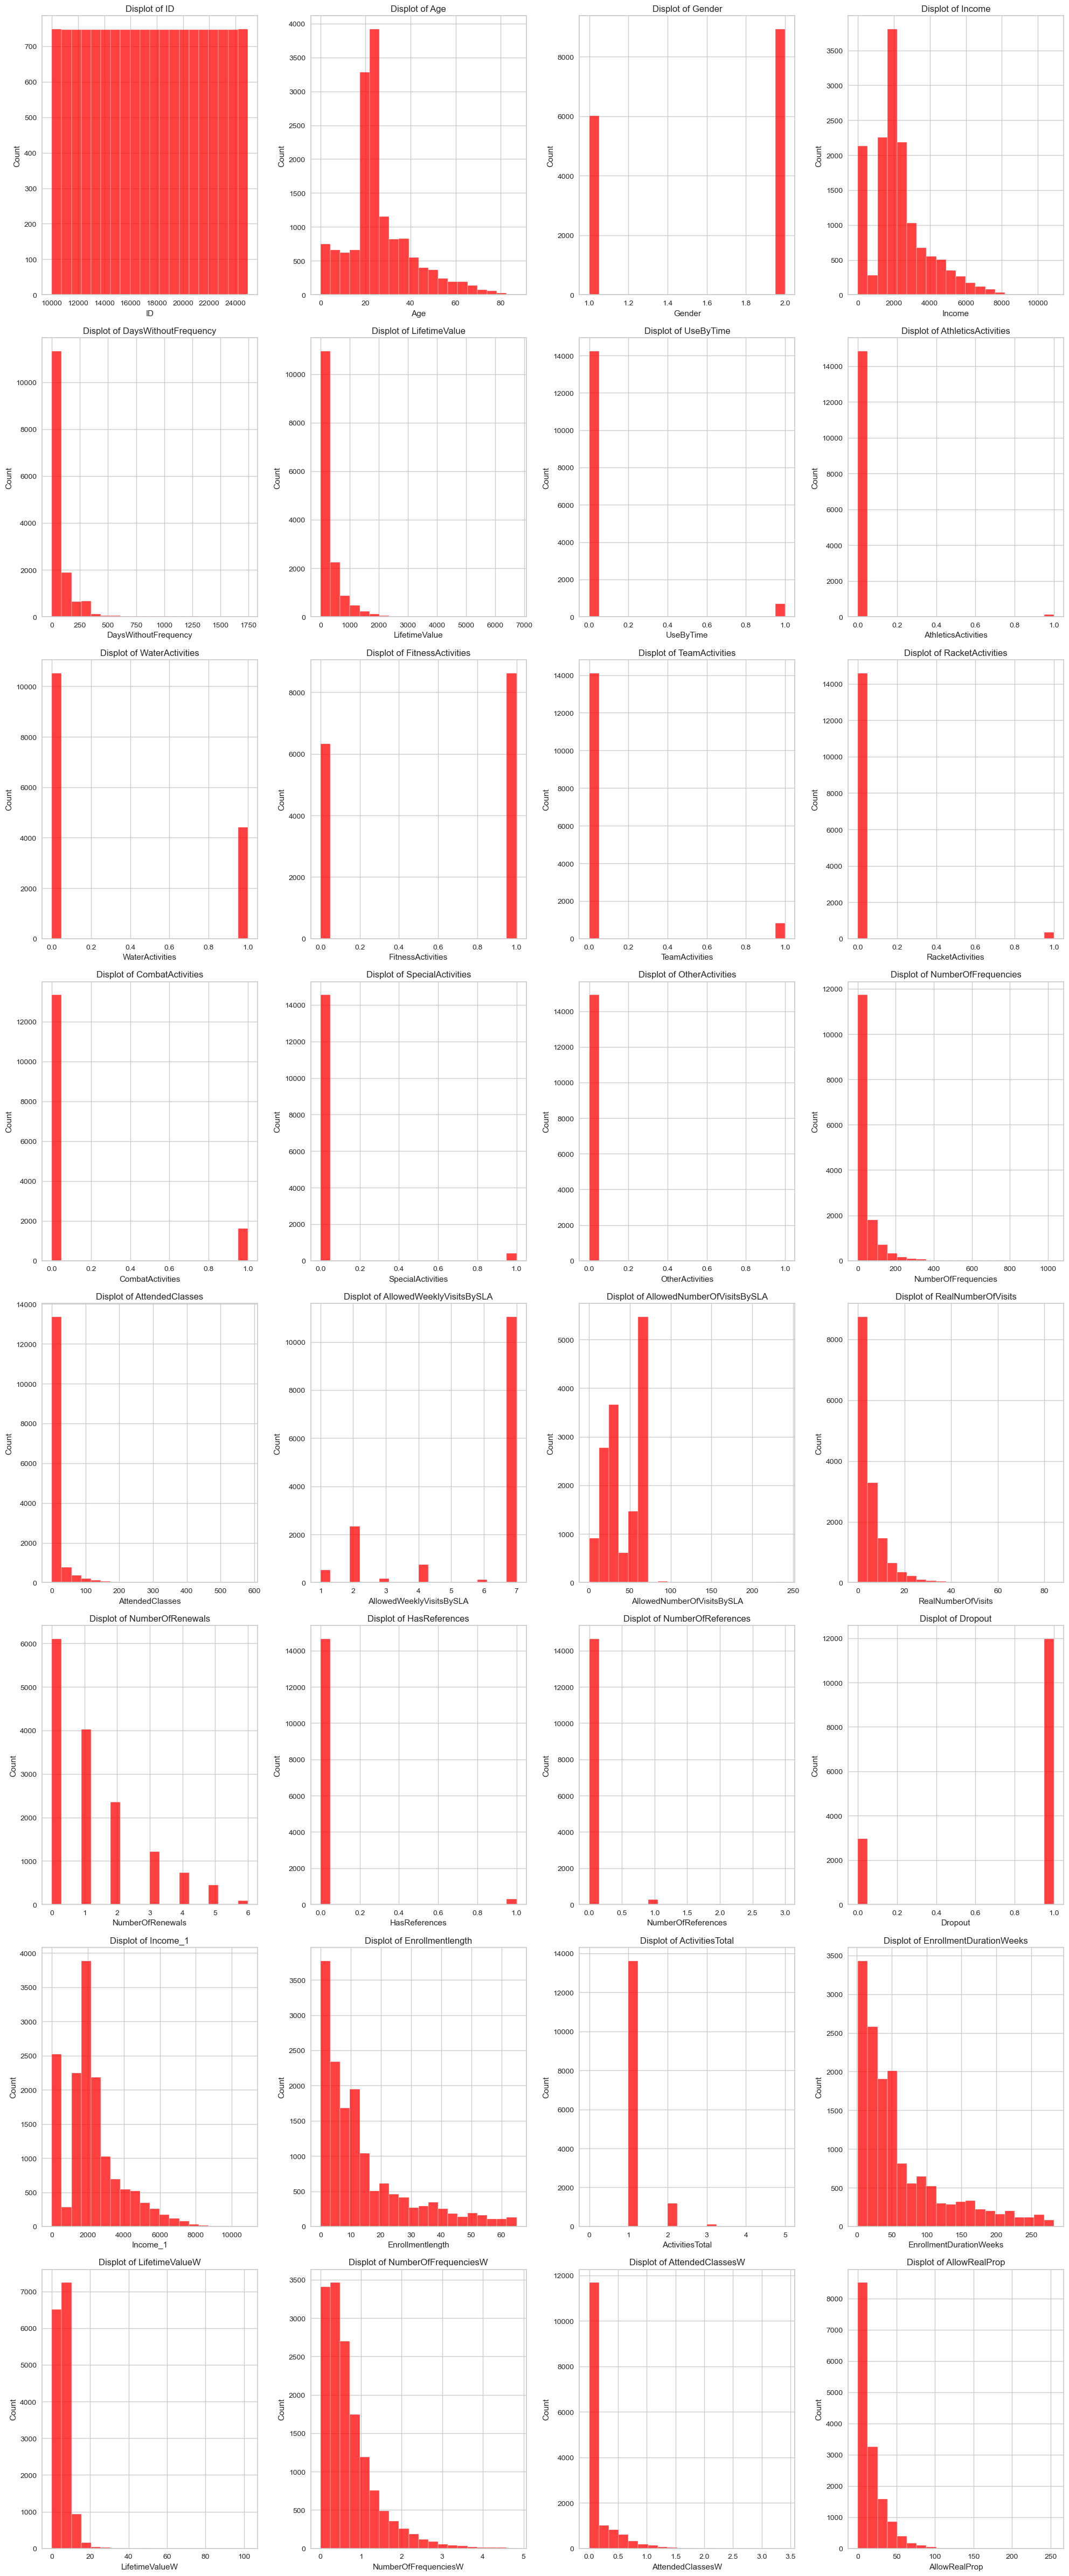

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeros = df_9.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numeros)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows

plt.figure(1, figsize=(20, num_rows * 6))

for n, x in enumerate(numeros, 1):
    plt.subplot(num_rows, 4, n)
    sns.histplot(df_9[x], bins=20, color='red')
    plt.title('Displot of {}'.format(x))

plt.tight_layout()
plt.show()


In [392]:
features_scaler = df_9 [['Age','Income_1', 'Gender', 'DaysWithoutFrequency', 'AllowedWeeklyVisitsBySLA', 
                 'NumberOfRenewals', 'LifetimeValueW', 'ActivitiesTotal','AttendedClassesW',
                 'NumberOfFrequenciesW',  'AllowRealProp', 'Dropout', 'NumberOfReferences',]]
features_scaler 



Age  Income_1  Gender  DaysWithoutFrequency  AllowedWeeklyVisitsBySLA  \
0       60    5500.0       2                     1                       7.0   
1       29    2630.0       2                    60                       2.0   
2       23    1980.0       1                     7                       7.0   
3        9       0.0       1                    22                       2.0   
4       35    4320.0       1                   210                       7.0   
...    ...       ...     ...                   ...                       ...   
14937   14       0.0       1                     2                       4.0   
14938   39    3420.0       1                    38                       7.0   
14939   20    1810.0       1                     2                       7.0   
14940   55    4800.0       1                     3                       3.0   
14941   32    3700.0       2                    14                       7.0   

       NumberOfRenewals  LifetimeValueW  ActivitiesTotal  AttendedClassesW  \
0                     0       10.600847              1.0          0.830508   
1                     2        8.407018              1.0          0.017544   
2                     0        8.490323              1.0          0.000000   
3                     0        6.756522              1.0          0.086957   
4                     3        3.353530              1.0          0.000000   
...                 ...             ...              ...               ...   
14937                 3        8.897433              1.0          0.584856   
14938                 0        9.186832              1.0          0.000000   
14939                 0        9.845161              1.0          0.000000   
14940                 2        9.049508              1.0          1.778689   
14941                 4        5.516024              1.0          0.005998   

       NumberOfFrequenciesW  AllowRealProp  Dropout  NumberOfReferences  
0                  1.067797      31.847134        0                   0  
1                  0.403509       5.740528        1                   0  
2                  1.354839      19.980020        1                   0  
3                  0.869565      16.930023        1                   0  
4                  0.368421       0.000000        1                   0  
...                     ...            ...      ...                 ...  
14937              0.682332      22.962113        0                   0  
14938              1.522901       4.920453        1                   0  
14939              1.354839      26.640027        1                   0  
14940              2.122951      44.108381        0                   0  
14941              1.013710      21.321962        1                   0  

[14942 rows x 13 columns]

In [393]:
def out_std(data, nstd=3.0, return_thresholds=False):
# nstd - number of standard deviations from the mean to consider an outlier
# return_thresholds - True returns the lower and upper bounds, good for plotting; False returns the masked array 
    
    data_mean, data_std = data.mean(), data.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    if return_thresholds:
        return lower, upper
    
    else:
        # Return a boolean mask of outliers for a series using standard deviation
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

def out_iqr(data, k=1.5, return_thresholds=False):
# k - some cutoff to multiply by the iqr
# return_thresholds - True returns the lower and upper bounds, good for plotting; False returns the masked array 

    # Calculate interquartile range
    q25, q75 = np.percentile(data, 25, axis=0), np.percentile(data, 75, axis=0)
    iqr = q75 - q25
    
    # Calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if return_thresholds:
        return lower, upper
    
    else: # Identify outliers
        # Return a boolean mask of outliers for a series using interquartile range
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

In [394]:
outlier_labels = pd.concat([out_std(features_scaler , 3), out_iqr(features_scaler , 1.5)], axis=1)

# True = classified as outlier, False otherwise
outlier_labels.columns = ['out_std','out_iqr']
outlier_labels

out_std  out_iqr
0        False     True
1        False    False
2        False    False
3        False    False
4        False     True
...        ...      ...
14937    False     True
14938    False    False
14939    False    False
14940     True     True
14941    False    False

[14942 rows x 2 columns]

In [395]:
print('\033[1mPercentage of outliers, first with the Standard Deviation Method\033[0m')
print('out_std:', round(outlier_labels['out_std'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['out_std'].value_counts(), '\n')

print('\033[1mWith the Interquartile Range Method\033[0m')
print('out_iqr:', round(outlier_labels['out_iqr'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['out_iqr'].value_counts(), '\n')



Percentage of outliers, first with the Standard Deviation Method
out_std: 12.789 %
out_std
False    13031
True      1911
Name: count, dtype: int64 

With the Interquartile Range Method
out_iqr: 46.266 %
out_iqr
True     8029
False    6913
Name: count, dtype: int64 



In [396]:
outlier_labels = pd.concat([out_std(features_scaler , 4), out_iqr(features_scaler , 2.5)], axis=1)

# True = classified as outlier, False otherwise
outlier_labels.columns = ['out_std','out_iqr']
outlier_labels

out_std  out_iqr
0        False     True
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
14937    False     True
14938    False    False
14939    False    False
14940     True     True
14941    False    False

[14942 rows x 2 columns]

In [397]:
print('\033[1mPercentage of outliers, first with the Standard Deviation Method\033[0m')
print('out_std:', round(outlier_labels['out_std'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['out_std'].value_counts(), '\n')

print('\033[1mWith the Interquartile Range Method\033[0m')
print('out_iqr:', round(outlier_labels['out_iqr'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['out_iqr'].value_counts(), '\n')



Percentage of outliers, first with the Standard Deviation Method
out_std: 6.572 %
out_std
False    13960
True       982
Name: count, dtype: int64 

With the Interquartile Range Method
out_iqr: 44.713 %
out_iqr
False    8261
True     6681
Name: count, dtype: int64 



Conclusions regarding these methods:

The IQR method yields an exceptionally high number of outliers, which are identified by this method, leading to the removal of 46.266% of the data when using the Interquartile Range Method with a factor of 1.5. Even when we increase the IQR range to 2.5, the percentage of outliers remains significantly elevated, at approximately 15.205%.

On the other hand, the Std. Deviation method provides more favorable results. It classifies approximately 6.572% of the records as outliers when using a threshold of 4 standard deviations and 12.789% for the 99% percentile with 3 standard deviations. Therefore, we have opted to standardize the data using the z-transformation method as it seems to be a more suitable approach for our analysis.

# 12 Clustering Algorithms 

## 12.1 Select Posible Variabels to Clustering

In [398]:
sociodemographic_features = df_9 [['Age','Gender','Income_1']]
frequency_features = df_9  [['DaysWithoutFrequency','NumberOfFrequenciesW', 'ActivitiesTotal','AllowRealProp','Dropout']]
service_agreement_features = df_9  [['LifetimeValueW','AllowedWeeklyVisitsBySLA','NumberOfRenewals']]

### 12.1.1 Inspect Correlation Matrix Cluster Segments 

In [399]:
df_cluster= df_9 [['Age','Gender','Income_1', 'DaysWithoutFrequency','NumberOfFrequenciesW', 
                     'ActivitiesTotal','AllowRealProp','Dropout', 'LifetimeValueW',
                     'AllowedWeeklyVisitsBySLA','NumberOfRenewals']]

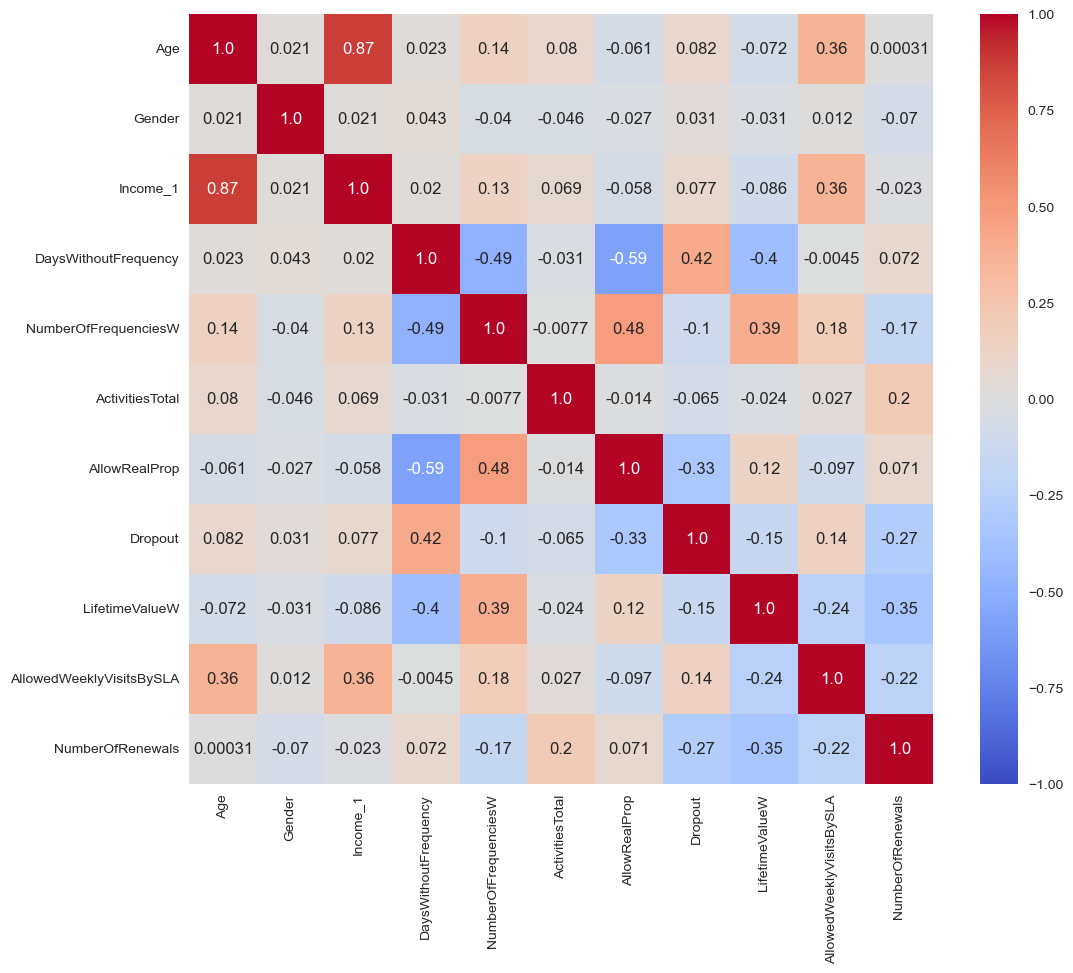

In [400]:
cor_spearman_df_cluster = df_cluster.corr(method='spearman')
cor_heatmap(cor_spearman_df_cluster)

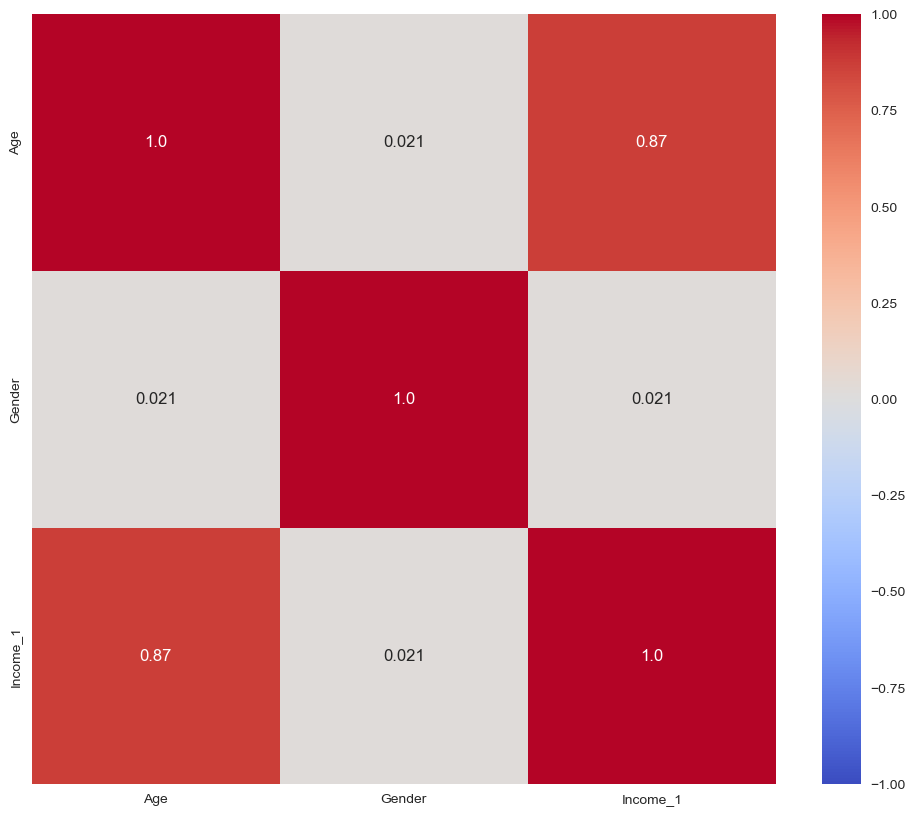

In [401]:
cor_spearman_sociodemographic_features = sociodemographic_features.corr(method='spearman')
cor_heatmap(cor_spearman_sociodemographic_features)

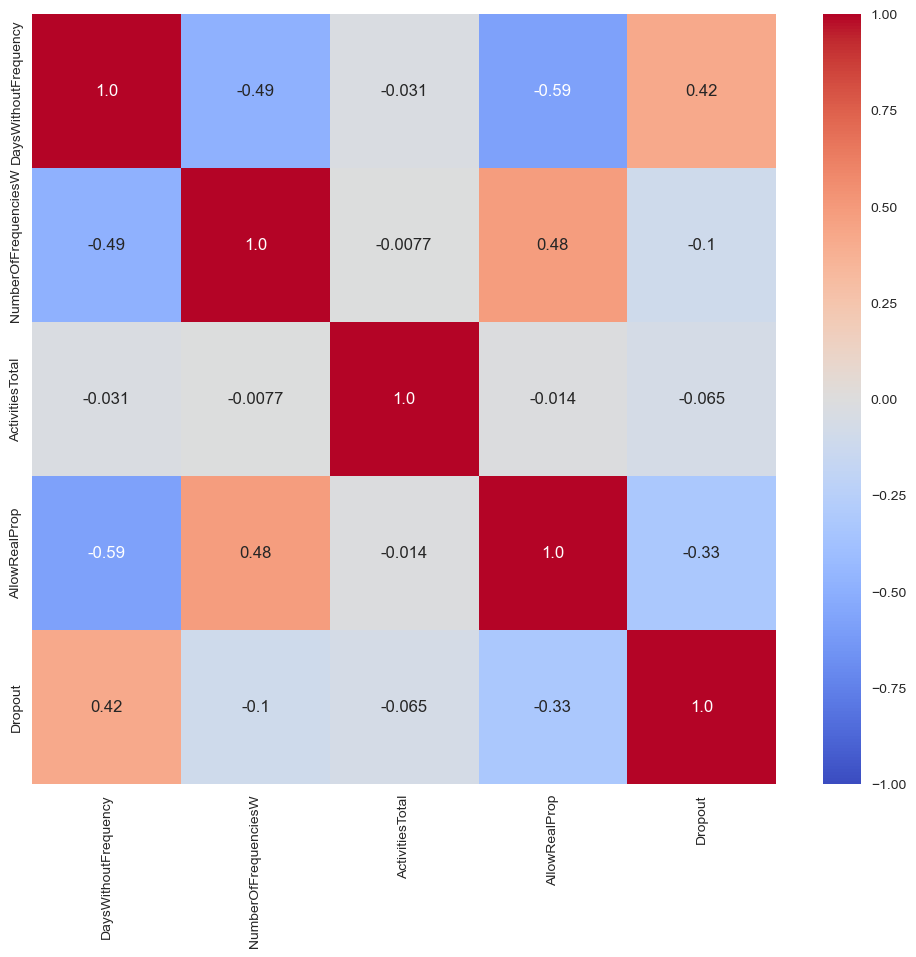

In [402]:
cor_spearman_frequency_features = frequency_features.corr(method='spearman')
cor_heatmap(cor_spearman_frequency_features)

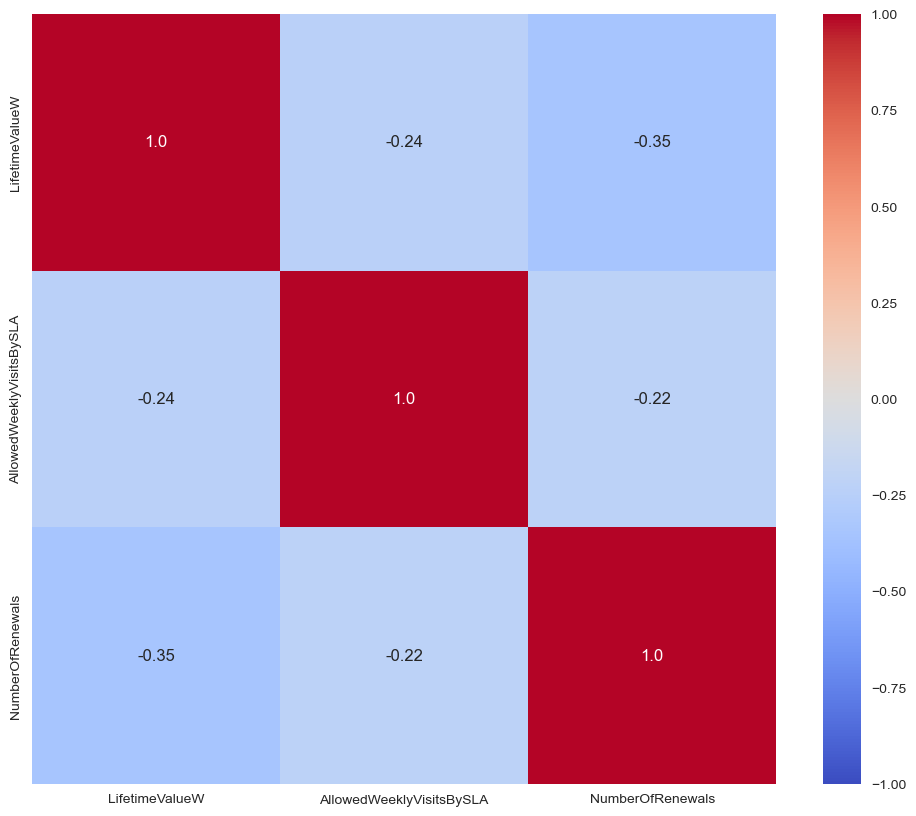

In [403]:
cor_spearman_service_agreement_features = service_agreement_features.corr(method='spearman')
cor_heatmap(cor_spearman_service_agreement_features)

### 12.1.2 Cluster Outliers

In [404]:
outlier_labels = pd.concat([out_std(df_cluster , 4), out_iqr(df_cluster , 2.5)], axis=1)

# True = classified as outlier, False otherwise
outlier_labels.columns = ['out_std','out_iqr']
outlier_labels

out_std  out_iqr
0        False     True
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
14937    False     True
14938    False    False
14939    False    False
14940    False     True
14941    False    False

[14942 rows x 2 columns]

In [405]:
print('\033[1mPercentage of outliers, first with the Standard Deviation Method\033[0m')
print('out_std:', round(outlier_labels['out_std'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['out_std'].value_counts(), '\n')

print('\033[1mWith the Interquartile Range Method\033[0m')
print('out_iqr:', round(outlier_labels['out_iqr'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['out_iqr'].value_counts(), '\n')


Percentage of outliers, first with the Standard Deviation Method
out_std: 4.049 %
out_std
False    14337
True       605
Name: count, dtype: int64 

With the Interquartile Range Method
out_iqr: 36.14 %
out_iqr
False    9542
True     5400
Name: count, dtype: int64 



In [406]:
pd.DataFrame(np.round(outlier_labels.mean()*100, 2), columns=["Percentage of potential outliers in each method"])

Percentage of potential outliers in each method
out_std                                             4.05
out_iqr                                            36.14

### 12.1.3 Data Scalling

In [407]:
from sklearn.preprocessing import StandardScaler

# Selecione os recursos que deseja normalizar
features_to_normalize = df_cluster

# Crie uma instância do StandardScaler
scaler = StandardScaler()

# Ajuste e transforme os dados
normalized_features = scaler.fit_transform(features_to_normalize)

# Crie um DataFrame com os recursos normalizados
df_cluster_scaler = pd.DataFrame(data=normalized_features, columns=features_to_normalize.columns)

df_cluster_scaler.T

0         1         2         3         4      \
Age                       2.400674  0.210807 -0.213038 -1.202011  0.634652   
Gender                    0.820396  0.820396 -1.218924 -1.218924 -1.218924   
Income_1                  2.100744  0.287962 -0.122599 -1.373229  1.355419   
DaysWithoutFrequency     -0.556365 -0.147196 -0.514755 -0.410729  0.893063   
NumberOfFrequenciesW      0.558556 -0.483537  1.008849  0.247583 -0.538581   
ActivitiesTotal          -0.289355 -0.289355 -0.289355 -0.289355 -0.289355   
AllowRealProp             0.893446 -0.550598  0.237036  0.068331 -0.868126   
Dropout                  -2.006043  0.498494  0.498494  0.498494  0.498494   
LifetimeValueW            1.245008  0.661693  0.683843  0.222844 -0.681974   
AllowedWeeklyVisitsBySLA  0.571374 -1.817264  0.571374 -1.817264  0.571374   
NumberOfRenewals         -0.872581  0.575374 -0.872581 -0.872581  1.299351   

                             5         6         7         8         9      \
Age                      -0.142397 -0.213038 -0.213038  0.210807 -0.848806   
Gender                    0.820396 -1.218924 -1.218924 -1.218924  0.820396   
Income_1                  0.028993  0.104789 -0.166813  0.660624 -1.373229   
DaysWithoutFrequency     -0.542495 -0.452339  0.123271 -0.084781 -0.050105   
NumberOfFrequenciesW      0.143597 -0.928385 -0.881719 -0.961872 -0.802789   
ActivitiesTotal          -0.289355 -0.289355 -0.289355 -0.289355 -0.289355   
AllowRealProp             1.568999 -0.315545  0.129819 -0.868126 -0.868126   
Dropout                   0.498494  0.498494  0.498494  0.498494  0.498494   
LifetimeValueW           -0.505726 -1.365630 -1.299842 -0.644777  0.673121   
AllowedWeeklyVisitsBySLA  0.571374  0.571374  0.571374  0.571374 -1.817264   
NumberOfRenewals         -0.872581  1.299351  2.747306  0.575374  0.575374   

                          ...     14932     14933     14934     14935  \
Age                       ... -0.424961 -0.566243 -0.354320 -0.213038   
Gender                    ...  0.820396 -1.218924 -1.218924  0.820396   
Income_1                  ... -0.368935 -0.400517 -0.002589 -0.463680   
DaysWithoutFrequency      ... -0.244287 -0.556365 -0.119456 -0.036235   
NumberOfFrequenciesW      ... -0.833151 -0.430214 -0.947595  1.145785   
ActivitiesTotal           ... -0.289355 -0.289355 -0.289355 -0.289355   
AllowRealProp             ... -0.537848 -0.499738 -0.868126 -0.868126   
Dropout                   ...  0.498494  0.498494  0.498494  0.498494   
LifetimeValueW            ... -0.464111  1.194929 -0.130477 -0.505161   
AllowedWeeklyVisitsBySLA  ...  0.571374  0.571374  0.571374  0.571374   
NumberOfRenewals          ... -0.872581 -0.872581 -0.872581 -0.148604   

                             14936     14937     14938     14939     14940  \
Age                      -0.354320 -0.848806  0.917216 -0.424961  2.047470   
Gender                    0.820396 -1.218924 -1.218924 -1.218924 -1.218924   
Income_1                 -0.223660 -1.373229  0.786951 -0.229976  1.658602   
DaysWithoutFrequency     -0.036235 -0.549430 -0.299768 -0.549430 -0.542495   
NumberOfFrequenciesW     -0.665256 -0.046136  1.272494  1.008849  2.213815   
ActivitiesTotal          -0.289355 -0.289355 -0.289355 -0.289355 -0.289355   
AllowRealProp            -0.777404  0.401986 -0.595959  0.605424  1.571657   
Dropout                   0.498494 -2.006043  0.498494  0.498494 -2.006043   
LifetimeValueW           -0.780071  0.792089  0.869037  1.044079  0.832524   
AllowedWeeklyVisitsBySLA  0.571374 -0.861809  0.571374  0.571374 -1.339537   
NumberOfRenewals          0.575374  1.299351 -0.872581 -0.872581  0.575374   

                             14941  
Age                       0.422730  
Gender                    0.820396  
Income_1                  0.963807  
DaysWithoutFrequency     -0.466209  
NumberOfFrequenciesW      0.473708  
ActivitiesTotal          -0.289355  
AllowRealProp             0.311263  
Dropout                   0.498494  
Lifetime

In [408]:
df_cluster_scaler.describe().T

count          mean       std       min       25%  \
Age                       14942.0  4.660232e-17  1.000033 -1.837779 -0.495602   
Gender                    14942.0 -1.160303e-16  1.000033 -1.218924 -1.218924   
Income_1                  14942.0 -6.181941e-17  1.000033 -1.373229 -0.482629   
DaysWithoutFrequency      14942.0 -4.660232e-17  1.000033 -0.563300 -0.473144   
NumberOfFrequenciesW      14942.0 -1.673879e-16  1.000033 -1.110861 -0.698775   
ActivitiesTotal           14942.0 -2.641591e-16  1.000033 -3.347022 -0.289355   
AllowRealProp             14942.0 -2.567883e-17  1.000033 -0.868126 -0.689753   
Dropout                   14942.0 -1.590661e-16  1.000033 -2.006043  0.498494   
LifetimeValueW            14942.0  1.540730e-16  1.000033 -1.573640 -0.627431   
AllowedWeeklyVisitsBySLA  14942.0  1.084217e-16  1.000033 -2.294992 -0.861809   
NumberOfRenewals          14942.0 -4.993106e-17  1.000033 -0.872581 -0.872581   

                               50%       75%        max  
Age                      -0.213038  0.352089   4.307978  
Gender                    0.820396  0.820396   0.820396  
Income_1                 -0.135231  0.370074   5.505237  
DaysWithoutFrequency     -0.278963  0.017511  11.538389  
NumberOfFrequenciesW     -0.278448  0.378007   6.456675  
ActivitiesTotal          -0.289355 -0.289355  11.941314  
AllowRealProp            -0.315545  0.401986  13.182442  
Dropout                   0.498494  0.498494   0.498494  
LifetimeValueW           -0.090218  0.422878  25.560329  
AllowedWeeklyVisitsBySLA  0.571374  0.571374   0.571374  
NumberOfRenewals         -0.148604  0.575374   3.471284

### 12.1.4 Removing outliers from our Cluster database 

In [409]:
# Set the threshold for outliers (4 standard deviations)
threshold = 4

# Create a boolean mask to identify outliers
outliers_mask = np.abs(df_cluster_scaler) > threshold

# Apply the mask to filter out outliers
df_no_outliers = df_cluster_scaler[~outliers_mask].dropna()

# Now, df_no_outliers contains only the rows without outliers

# Calculate the number of rows removed
num_rows_removed = len(df_cluster_scaler) - len(df_no_outliers)

# Calculate the percentage of rows removed
percent_removed = (num_rows_removed / len(df_cluster_scaler)) * 100

# Print the results
print(f"Percentage removed: {percent_removed:.2f}%")
print(f"Rows removed: {num_rows_removed}")


Percentage removed: 4.05%
Rows removed: 605


In [410]:
cluster_db= df_no_outliers.copy()

In [411]:
cluster_db.describe().T

count      mean       std       min       25%  \
Age                       14337.0 -0.014025  0.984751 -1.837779 -0.495602   
Gender                    14337.0  0.003644  0.999302 -1.218924 -1.218924   
Income_1                  14337.0 -0.012374  0.981575 -1.373229 -0.482629   
DaysWithoutFrequency      14337.0 -0.082368  0.612453 -0.563300 -0.473144   
NumberOfFrequenciesW      14337.0 -0.033351  0.904569 -1.110861 -0.694184   
ActivitiesTotal           14337.0 -0.051558  0.833116 -3.347022 -0.289355   
AllowRealProp             14337.0 -0.050381  0.883219 -0.868126 -0.689753   
Dropout                   14337.0  0.024733  0.980902 -2.006043  0.498494   
LifetimeValueW            14337.0 -0.033700  0.817850 -1.573640 -0.616830   
AllowedWeeklyVisitsBySLA  14337.0  0.002679  0.997742 -2.294992 -0.861809   
NumberOfRenewals          14337.0 -0.030996  0.971955 -0.872581 -0.872581   

                               50%       75%       max  
Age                      -0.213038  0.352089  3.954774  
Gender                    0.820396  0.820396  0.820396  
Income_1                 -0.141548  0.357441  3.970373  
DaysWithoutFrequency     -0.278963 -0.001560  3.965297  
NumberOfFrequenciesW     -0.279877  0.358545  3.984116  
ActivitiesTotal          -0.289355 -0.289355  2.768312  
AllowRealProp            -0.323792  0.361743  3.983923  
Dropout                   0.498494  0.498494  0.498494  
LifetimeValueW           -0.090322  0.415368  3.992469  
AllowedWeeklyVisitsBySLA  0.571374  0.571374  0.571374  
NumberOfRenewals         -0.148604  0.575374  3.471284

In [412]:
cluster_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14337 entries, 0 to 14941
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14337 non-null  float64
 1   Gender                    14337 non-null  float64
 2   Income_1                  14337 non-null  float64
 3   DaysWithoutFrequency      14337 non-null  float64
 4   NumberOfFrequenciesW      14337 non-null  float64
 5   ActivitiesTotal           14337 non-null  float64
 6   AllowRealProp             14337 non-null  float64
 7   Dropout                   14337 non-null  float64
 8   LifetimeValueW            14337 non-null  float64
 9   AllowedWeeklyVisitsBySLA  14337 non-null  float64
 10  NumberOfRenewals          14337 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [413]:
sociodemographic_features = cluster_db [['Age','Gender','Income_1']]
frequency_features = cluster_db  [['DaysWithoutFrequency','NumberOfFrequenciesW', 'ActivitiesTotal',
                                   'AllowRealProp']]
service_agreement_features = cluster_db  [['LifetimeValueW','AllowedWeeklyVisitsBySLA','NumberOfRenewals','Dropout']]

Back_up

In [414]:
sociodemographic_features_1 = sociodemographic_features.copy()
frequency_features_1 = frequency_features.copy()
service_agreement_features_1 = service_agreement_features.copy()

## Clustering 

### 12.2. Assess feature importance: Using the R²

In [415]:
def get_ss(df):
    """
    Computes the sum of squares for all variables given a dataset.
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss # Return sum of sum of squares of each df variable

In [416]:
def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst

In [417]:
def get_r2_scores(df, clusterer, min_k=2, max_k=11):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

In [418]:
from sklearn.cluster import KMeans
import pandas as pd

def kmeans_FS(df):
    # Set up the clusterer
    kmeans = KMeans(
        n_clusters=2000,
        init='k-means++',
        n_init=10,
        random_state=42
    )

    # Get cluster labels
    km_labels = kmeans.fit_predict(df)
    
    # Dataframe to put the labels on
    kmeans_df = df.copy()
    
    # Create a new column 'CONTROLN' with cluster labels
    kmeans_df['CONTROLN'] = km_labels
    
    # Get the centroids of each cluster given by K-means
    kmeans_2000 = kmeans_df.groupby('CONTROLN').mean()
    
    return kmeans_2000


In [419]:
def r_sq_plot(df):
    r2_scores = {}

    hierarchical = AgglomerativeClustering(affinity='euclidean')
    
    # Doing hierarchical on top of the K-means
    for linkage in ['complete', 'average', 'single', 'ward']:
        r2_scores[linkage] = get_r2_scores(
            df, hierarchical.set_params(linkage=linkage)
        )

    # Visualizing the R² scores for each cluster solution
    pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

    plt.title("R² plot for various clustering methods\n", fontsize=21)
    plt.legend(title="Cluster methods", title_fontsize=11)
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R² metric", fontsize=13)
    plt.show()

In [420]:
def get_ss_variables(df):
    """
    Get the SS for each variable.
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

In [421]:
def r2_variables(df, labels):
    """
    Get the R² for each variable.
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

## 12.3. Socio Demographic Variables (K-Mean)

In [422]:
# K-means on sociodemographic_features
kmeans_2000_social = kmeans_FS(sociodemographic_features)

In [423]:
# Data Social Perspective
r_sq_plot(kmeans_2000_social)

NameError: name 'AgglomerativeClustering' is not defined

In [ ]:
hclust_social = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_social = hclust_social.fit_predict(kmeans_2000_social)

In [ ]:
# Mesclar os DataFrames usando a coluna 'CONTROLN'
df_merge_h_social = kmeans_2000_social.merge(pd.Series(hclust_labels_social, name='h_labels', 
                                                       index=kmeans_2000_social.index), left_index=True, right_index=True)


In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_social, 'h_labels').drop('h_labels').sort_values(ascending=False)

Testing without Income_1 only Age and Gender

In [ ]:
# K-means on data_social without the 2 variables
kmeans_2000_social_2 = kmeans_FS(sociodemographic_features.drop(columns=['Income_1']))

In [ ]:
# Data Social Perspective
r_sq_plot(kmeans_2000_social_2)

In [ ]:
hclust_social_2 = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_social_2 = hclust_social_2.fit_predict(kmeans_2000_social_2)

In [ ]:
# Mesclar os DataFrames usando a coluna 'CONTROLN'
df_merge_h_social_2 = kmeans_2000_social_2.merge(pd.Series(hclust_labels_social_2, name='h_labels', 
                                                       index=kmeans_2000_social_2.index), left_index=True, right_index=True)


In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_social_2, 'h_labels').drop('h_labels').sort_values(ascending=False)

Testing without Age only Income_1 and Gender

In [ ]:
# K-means on data_social 
kmeans_2000_social_3 = kmeans_FS(sociodemographic_features.drop(columns=['Age']))

In [ ]:
# Data Social Perspective
r_sq_plot(kmeans_2000_social_3)

In [ ]:
hclust_social_3 = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_social_3 = hclust_social_3.fit_predict(kmeans_2000_social_3)

In [ ]:
# Mesclar os DataFrames usando a coluna 'CONTROLN'
df_merge_h_social_3 = kmeans_2000_social_3.merge(pd.Series(hclust_labels_social_3, name='h_labels', 
                                                       index=kmeans_2000_social_3.index), left_index=True, right_index=True)


In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_social_3, 'h_labels').drop('h_labels').sort_values(ascending=False)

We use Age, Income_1 and Gender because are much more acceptable results in term o R2.

## 12.4. Frequency Features Variables (K-Mean)

In [ ]:
# K-means on frequency_features
kmeans_2000_frequency_1 = kmeans_FS(frequency_features)

In [ ]:
# Data 
r_sq_plot(kmeans_2000_frequency_1)

In [ ]:
hclust_frequency_1 = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_frequency_1 = hclust_frequency_1.fit_predict(kmeans_2000_frequency_1)

In [ ]:
# Mesclar os DataFrames usando a coluna 'CONTROLN'
df_merge_h_frequency_1 = kmeans_2000_frequency_1.merge(pd.Series(hclust_labels_frequency_1, name='h_labels', 
                                                       index=kmeans_2000_frequency_1.index), left_index=True, right_index=True)


In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_frequency_1, 'h_labels').drop('h_labels').sort_values(ascending=False)

Try dropping DaysWithoutFrequency 

In [ ]:
# K-means on frequency_features
kmeans_2000_frequency_2 = kmeans_FS(frequency_features.drop(columns=['NumberOfFrequenciesW']))

In [ ]:
# Data 
r_sq_plot(kmeans_2000_frequency_2)

In [ ]:
hclust_frequency_2 = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_frequency_2 = hclust_frequency_2.fit_predict(kmeans_2000_frequency_2)

In [ ]:
# Mesclar os DataFrames usando a coluna 'CONTROLN'
df_merge_h_frequency_2 = kmeans_2000_frequency_2.merge(pd.Series(hclust_labels_frequency_2, name='h_labels', 
                                                       index=kmeans_2000_frequency_2.index), left_index=True, right_index=True)


In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_frequency_2, 'h_labels').drop('h_labels').sort_values(ascending=False)

Drop NumberOfFrequenciesW  and DaysWithoutFrequency

In [ ]:
# K-means on frequency_features
kmeans_2000_frequency_3 = kmeans_FS(frequency_features.drop(columns=['DaysWithoutFrequency','NumberOfFrequenciesW']))

In [ ]:
# Data 
r_sq_plot(kmeans_2000_frequency_3)

In [ ]:
hclust_frequency_3 = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_frequency_3 = hclust_frequency_3.fit_predict(kmeans_2000_frequency_3)

In [ ]:
# Mesclar os DataFrames usando a coluna 'CONTROLN'
df_merge_h_frequency_3 = kmeans_2000_frequency_3.merge(pd.Series(hclust_labels_frequency_3, name='h_labels', 
                                                       index=kmeans_2000_frequency_3.index), left_index=True, right_index=True)


In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_frequency_3, 'h_labels').drop('h_labels').sort_values(ascending=False)

We use ActivitiesTotal and AllowRealProp because are much more acceptable results in term o R2.

### Service Agreement Features

In [ ]:
# K-means on sociodemographic_features
kmeans_2000_service_agreement_features_1 = kmeans_FS(service_agreement_features)

In [ ]:
# Data 
r_sq_plot(kmeans_2000_service_agreement_features_1)

In [ ]:
hclust_service_agreement_features_1 = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_service_agreement_features_1 = hclust_service_agreement_features_1.fit_predict(kmeans_2000_service_agreement_features_1)

In [ ]:
# Mesclar os DataFrames usando a coluna 'CONTROLN'
df_merge_h_service_agreement_features_1= kmeans_2000_service_agreement_features_1.merge(pd.Series(hclust_labels_service_agreement_features_1, name='h_labels', 
                                                       index=kmeans_2000_service_agreement_features_1.index), left_index=True, right_index=True)


In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_service_agreement_features_1, 'h_labels').drop('h_labels').sort_values(ascending=False)

Verify 

In [ ]:
# K-means on service_agreement_features
kmeans_2000_service_agreement_features_2 = kmeans_FS(service_agreement_features.drop(columns=['Dropout']))

In [ ]:
# Data 
r_sq_plot(kmeans_2000_service_agreement_features_2)

In [ ]:
hclust_service_agreement_features_2 = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_service_agreement_features_2 = hclust_service_agreement_features_2.fit_predict(kmeans_2000_service_agreement_features_2)

In [ ]:
# Mesclar os DataFrames usando a coluna 'CONTROLN'
df_merge_h_service_agreement_features_2= kmeans_2000_service_agreement_features_2.merge(pd.Series(hclust_labels_service_agreement_features_2, name='h_labels', 
                                                       index=kmeans_2000_service_agreement_features_2.index), left_index=True, right_index=True)


In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_service_agreement_features_2, 'h_labels').drop('h_labels').sort_values(ascending=False)

Decision NumberOfRenewals and AllowedWeeklyVisitsBySLA         

In [ ]:
# K-means on service_agreement_features
kmeans_2000_service_agreement_features_3 = kmeans_FS(service_agreement_features.drop(columns=['Dropout', 'AllowedWeeklyVisitsBySLA']))

In [ ]:
# Data 
r_sq_plot(kmeans_2000_service_agreement_features_3)

In [ ]:
hclust_service_agreement_features_3 = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_service_agreement_features_3 = hclust_service_agreement_features_2.fit_predict(kmeans_2000_service_agreement_features_3)

In [ ]:
# Mesclar os DataFrames usando a coluna 'CONTROLN'
df_merge_h_service_agreement_features_3= kmeans_2000_service_agreement_features_3.merge(pd.Series(hclust_labels_service_agreement_features_3, name='h_labels', 
                                                       index=kmeans_2000_service_agreement_features_3.index), left_index=True, right_index=True)


In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_service_agreement_features_3, 'h_labels').drop('h_labels').sort_values(ascending=False)

# 13. Cluster Analysis

In [ ]:
sociodemographic_features

In [ ]:
freq_feat = frequency_features.drop(columns=['DaysWithoutFrequency','NumberOfFrequenciesW'])
freq_feat

In [ ]:
ser_agree_feat=service_agreement_features.drop(columns=['Dropout', 'AllowedWeeklyVisitsBySLA'])
ser_agree_feat

In [382]:
!pip install matplotlib seaborn yellowbrick


## 13.1. Functions

In [ ]:

def kelbowplots(clus, data):
    """
    This function produces the k-elbow plot for a given clustering estimator according to 2 quality measures: 
    Silhouette and Calinski Harabasz.
    """
    sns.set()
    fig, axes = plt.subplots(1, 2, figsize=(15,6))

    # Plot the data
    metrics = ["silhouette", "calinski_harabasz"]
    ylabels = ["Silhouette", "Calinski and Harabasz"]
    titles = ["Silhouette measure plot", "Calinski and Harabasz measure plot"]
    for ax, m, ylabel, title in zip(axes.flatten(), metrics, ylabels, titles):
        # KElbowVisualizer produces the elbow plot for several quality measures
        KElbowVisualizer(clus, metric=m, timings=False, locate_elbow=True, ax=ax).fit(data)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_xlabel("Number of clusters", fontsize=12)
        ax.set_title(title, fontsize=12)

    # Top title
    plt.suptitle("K-Elbow Plots", fontsize=20)

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

def kelbowplots(clus, data):
    """
    This function produces the k-elbow plot for a given clustering estimator according to 2 quality measures: 
    Silhouette and Calinski Harabasz.
    """
    %matplotlib inline  # Enable inline plotting in Jupyter Notebook
    sns.set()
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the data
    metrics = ["silhouette", "calinski_harabasz"]
    ylabels = ["Silhouette", "Calinski and Harabasz"]
    titles = ["Silhouette measure plot", "Calinski and Harabasz measure plot"]
    for ax, m, ylabel, title in zip(axes.flatten(), metrics, ylabels, titles):
        # KElbowVisualizer produces the elbow plot for several quality measures
        KElbowVisualizer(clus, metric=m, timings=False, locate_elbow=True, ax=ax).fit(data)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_xlabel("Number of clusters", fontsize=12)
        ax.set_title(title, fontsize=12)

    # Top title
    plt.suptitle("K-Elbow Plots", fontsize=20)

    plt.show()

# Example usage
# Replace 'your_clustering_estimator' with your actual clustering estimator
# Replace 'your_data' with your actual data
kelbowplots(your_clustering_estimator, your_data)


In [ ]:
def silhouette_analysis(df, estimator, shape, figsize, max_nclus, min_nclus=2, dist="euclidean"):
    """
    This function builds the Silhouette plots for a given range of cluster solutions. This is useful to find out the 
    most appropriate number of clusters.
    """
    range_n_clusters = list(range(min_nclus, max_nclus+1))
    
    sns.set()
    fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=figsize)
    
    if len(range_n_clusters)==1: # In case we want to seed the silhouette for just one cluster solution
        axes_final = [axes]
    else:
        axes_final = axes.flatten()
        
    n = []
    avgs = []
    for ax, n_clusters in zip(axes_final, range_n_clusters):
        # Get parameter that defines number of clusters
        if "n_clusters" in estimator.get_params():
            param = "n_clusters"

        else:
            print("Estimator has no parameter to define number of clusters")
            return None # To stop if this happens
        
        # Get the cluster labels by applying the algorithm
        clustering = estimator.set_params(**{param:n_clusters}) # Set the parameters of the estimator
        labels = clustering.fit_predict(df)
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        n.append(n_clusters)
        silhouette_avg = silhouette_score(df, labels, metric=dist)
        avgs.append(silhouette_avg)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, labels, metric=dist)
        
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()

            # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Filling the silhouette
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        
        ax.set_title("{} Clusters".format(n_clusters), fontsize=13)
        
        ax.set_xlabel("The silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        
        ax.set_yticks([]) # Clear the y axis labels / ticks
        ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette") 
        # The vertical line for average silhouette score of all the values
    
    plt.subplots_adjust(hspace=0.35)
    plt.suptitle(("Clustering Silhouette Plots"), fontsize=23)
    plt.show()
    
    for i in range(len(n)):
        print(f"For n_clusters = {n[i]}, the average silhouette_score is: {round(avgs[i], 4)}")

In [380]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

### 13.2. Social Perspective

#### 13.2.1. K-means

In [ ]:
# Instantiate a K-Means model
clus_estim = KMeans(random_state=42) # Default is already 'k-means++' on init, and 10 on n_init, which is good

# K-elbow plots
kelbowplots(clus_estim, sociodemographic_features)

The measures represented above help us assess how many clusters we should retain. Here, we are using 2 quality measures: Silhouette score, and Calisnki and Harabasz score. These represent the mean ratio of intra-cluster and nearest-cluster distance, and ratio of within to between cluster dispersion, respectively, and their values should be high.

In this case, we agree with the elbows located by the KElbowVisualizer function, because at 6 clusters there is an elbow (the highest value in both measures is reached at that point), and after that we can clearly see a steep drop in quality and performance.

Besides, we should also try to find a relatively small number of clusters, as it becomes increasingly hard to interpret and deal with larger numbers.

We will complement this analysis with the visualization of the Silhouette Plots, to get a better understanding of the quality of this cluster analysis with 2, 3, 4 or 5 clusters.


In [ ]:
kmeans = KMeans(random_state=42)
silhouette_analysis(sociodemographic_features, kmeans, (2,2), (20,12), max_nclus=10)

"Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]." (from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

It is also important to note that negative values on the scores indicate that those samples might have been assigned to the wrong cluster.

From these plots, we visualize that 6 clusters seems to have a good definition, but according to the elbow plots it would not make as much sense to select that number of clusters.

Thus, we conclude that the 3 to 5 clusters solution is the most appropriate, as it has the highest Silhouette score, Calinski and Harabasz score, and it also produces good results on the Silhouette plot.


In [ ]:
# Perform k-means
model_km_social = KMeans(3, random_state=42)
model_km_social.fit(sociodemographic_features)
clust_labels_km_social = model_km_social.predict(sociodemographic_features)
cent_km_social = model_km_social.cluster_centers_

In [ ]:
# Appending the cluster labels to a new dataframe
kmeans_social_df = sociodemographic_features.copy()
kmeans_social_df["k_means_labels"] = clust_labels_km_social

#### 13.2.2. K-means and Hierarchical Clustering

In this section we will apply the K-means algorithm together with the Hierarchical clustering algorithm.

We will first perform a k-means in order to reduce the number of observations to a smaller number (500 centroids) and then we will perform Hierarchical Clustering, to find out the appropriate cluster solution, without having to define the number of clusters.

In [ ]:
# First, perform k-means with a high n_clusters (500)
model_km_hc_social = KMeans(500, random_state=42)
model_km_hc_social.fit(sociodemographic_features)
clust_labels_km_hc_social = model_km_hc_social.predict(sociodemographic_features)
cent_km_hc_social = model_km_hc_social.cluster_centers_

In [ ]:
# Appending the cluster labels to a new dataframe
kmeans_hc_social_df = sociodemographic_features.copy()
kmeans_hc_social_df["k_means_hc_labels"] = clust_labels_km_hc_social

In [ ]:
# Getting the centroids of each cluster given by the K-means
kmeans_hc_social_centroids = kmeans_hc_social_df.groupby("k_means_hc_labels").mean()

In [ ]:
# R-square Plot, using the function from the previous step
r_sq_plot(kmeans_hc_social_centroids)

From the plot above, it is possible to compare the performance of the various Hierarchical Clustering linkages (Ward, complete, average and single) according to R-square. In this case, it can be seen that the Ward's method outperforms the others, and therefore should be used for linking the clusters.

With this, we were able to choose the most adequate method, and it looks like there is an elbow at 4 clusters, which leads us to believe 4 is a good number of clusters. We will also produce some visualizations to further help us.


In [368]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(kmeans_hc_social_centroids, method="ward")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 5
dendrogram(linkage_matrix, truncate_mode='level', p=6, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=21)
plt.xlabel('K-means centroids', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

NameError: name 'linkage' is not defined

Check - Here we can visualize the clustering through the Dendrogram, in which we can define a cut-off at the first big jump of euclidean distance between merged clusters.

With the cut-off defined above, we would retain 4 clusters.???


In [369]:
# Hierarchical clustering with linkage according to the plot above
hc_centroids = AgglomerativeClustering(linkage='ward')

# K-elbow plots
kelbowplots(hc_centroids, kmeans_hc_social_centroids)

NameError: name 'AgglomerativeClustering' is not defined

By analyzing the elbow plots, we get moreless the same visualizations. The Silhouette elbow plot seems to have an elbow on 4, although the Calinski and Harabasz elbow plot seems to have it on 4.

Finally, we will complete this analysis with the Clustering Silhouette plots.


In [370]:
hc_estimator = AgglomerativeClustering(linkage='ward')
silhouette_analysis(kmeans_hc_social_centroids, hc_estimator, (2,2), (20, 12), 5)

NameError: name 'AgglomerativeClustering' is not defined

According to these plots, the solution with 4 clusters seems to have a good quality measure. However, all the other methods seem to indicate also the 4 cluster solution is better (R-square plot, dendrogram and both elbow plots), so we decided to keep 4 clusters using this clustering method.

#### 13.2.3. Self-Organizing Map and K-means

We decided to experiment the combination of these two algorithms, so we will perform a SOM with a big grid of neurons, which will then be grouped with K-means in order to find the appropriate number of clusters and an adequate solution.

# Problems - Walli , please we should finalize this part I can´t find a solution for my sompy .. I will try latter

In [301]:
import sompy

ImportError: cannot import name 'SOM' from partially initialized module 'sompy' (most likely due to a circular import) (C:\ProgramData\anaconda3\Lib\site-packages\sompy\__init__.py)

In [302]:
import sompy

# We're going to set a random seed for reproducibility
np.random.seed(42)

# Performing SOM
sm = sompy.SOMFactory().build(
    data_social.drop(columns=sociodemographic_features).values, 
    mapsize=(10, 10), # 10x10 grid
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=sociodemographic_features.columns
)
# Neighborhood function - 'gaussian': the units will update according to a Normal distribution (the closer points get 
# closer than the far away ones)

sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

ImportError: cannot import name 'SOM' from partially initialized module 'sompy' (most likely due to a circular import) (C:\ProgramData\anaconda3\Lib\site-packages\sompy\__init__.py)

In [303]:
# Obtaining SOM's BMUs labels for each observation
som_bmus_social = pd.DataFrame(
    np.concatenate((sociodemographic_features, np.expand_dims(sm._bmu[0], 1)), axis=1),
    index=data_social.index, columns=np.append(sociodemographic_features.columns, "BMU")
)

NameError: name 'sm' is not defined

In [304]:
print("SOM quantization error on the Social perspective: {0:.3f}".format(sm.calculate_quantization_error()))

NameError: name 'sm' is not defined

In [305]:
# Visualizing the Component plates (feature values) on the 10x10 grids
sns.set()

view2D = View2D(12, 12, "", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Plates", fontsize=20)
plt.show()

NameError: name 'View2D' is not defined

We will now proceed to group the units found by the Self-Organizing Map with K-means.

In [306]:
# Get the nodes
nodes_social = pd.DataFrame(sm.get_node_vectors(), columns=sociodemographic_features.columns)

NameError: name 'sm' is not defined

In [307]:
!pip install sompy


In [308]:
# Kmeans with sklearn
kmeans = KMeans(random_state=42)

# Elbow plots
kelbowplots(kmeans, nodes_social)

NameError: name 'nodes_social' is not defined

As located by the function, both plots have a elbow on the ?? cluster solution. We will, finally, visualize the Clustering Silhouette plots.


In [ ]:
# Same function
estimator = KMeans(random_state=42)
silhouette_analysis(nodes_social, estimator, (2,2), (20, 11), 5)

We keep ? clusters, as the plot shows a very low amount of samples assigned to the wrong cluster, with a high Silhouette score, and the Calinski and Harabasz score, analyzed previously, is also high.

In [ ]:
!pip install --upgrade sompy

In [ ]:
# Perform K-Means clustering on top of the 100 units
model_som_km_social = KMeans(n_clusters=4, random_state=42)
node_clus_labels = sm.cluster(model_som_km_social)

# Show hit map
hits = HitMapView(12, 12, "Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
# Associate the nodes with the clusters
nodes_social['km_label'] = node_clus_labels

In [ ]:
# Get cluster labels for each observation
som_kmeans_social = som_bmus_social.merge(nodes_social['km_label'], 'left', left_on="BMU", right_index=True)

#### 13.2.4. Self-Organizing Map and Hierarchical Clustering

We also decided to experiment the combination of these two algorithms, so we will perform a SOM with a big grid of neurons, which will then be grouped with Hierarchical Clustering in order to find the appropriate number of clusters and an adequate solution.

In [ ]:
# R-square Plot, using the function from the previous step
r_sq_plot(nodes_social.drop(columns='km_label'))

When analyzing the R-square plot, we decided to try 2 clustering methods: average (elbow on ?? clusters) and Ward (elbow on ?? clusters).

After comparing the two, ?? clusters with Ward led to too many samples wrongly assigned to the clusters, and also a somewhat low Silhouette score.

Thus, we proceeded with the average method.


In [ ]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(nodes_social.drop(columns='km_label'), method="average")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 0.27
dendrogram(linkage_matrix, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Average\'s Dendrogram', fontsize=21)
plt.xlabel('SOM units', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
# Hierarchical clustering with sklearn
som_hc = AgglomerativeClustering(linkage='average')

# K-elbow plots
kelbowplots(som_hc, nodes_social.drop(columns='km_label'))

In [ ]:
# Function defined above
estimator = AgglomerativeClustering(linkage='average')
silhouette_analysis(nodes_social.drop(columns='km_label'), estimator, (2,2), (20, 11), 5)

Using the average method, all metrics and plots (R-square plot, dendrogram, elbow plots, and Silhouette plots) indicate the ? cluster solution as the best, so we will keep it.

???? However, this solution has one very large cluster (Cluster_??), and ???? two smaller ones, so we think this is not a quality solution, although it was the best at this stage (SOM + HC).


In [ ]:
# Perform HC clustering on top of the 100 units
hierclust = AgglomerativeClustering(n_clusters=3, linkage='average')
node_clus_labels = sm.cluster(hierclust)

# Show hit map
hits = HitMapView(12, 12, "Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
# Associate the nodes with the clusters
nodes_social['hc_label'] = node_clus_labels

In [ ]:
# Get cluster labels for each observation
som_hc_social = som_bmus_social.merge(nodes_social['hc_label'], 'left', left_on="BMU", right_index=True)

#### 13.2.5. Best clustering solution

# Adapt to our results

| Clustering algorithms                           | # of Clusters | Silhouette | Calinski and Harabasz | R²    |
|-------------------------------------------------|---------------|------------|-----------------------|-------|
| K-means                                         | 3             | 0.303      | ~32000                | -     |
| K-means and Hierarchical Clustering             | 3             | 0.2339     | ~170                  | ~0.41 |
| Self-Organizing Map and K-means                 | 4             | 0.3802     | ~80                   | -     |
| Self-Organizing Map and Hierarchical Clustering | 3             | 0.3662     | ~57                   | ~0.55 |

To compare this four cluster solutions, we shouldn't compare the solutions with 3 clusters with the one with 4, as that is not a best practice (more clusters can lead to better scores and measures).

We will check the profilling of the K-means solution (3 clusters, and highest Calinski and Harabasz among the ones with 3 clusters) with the Self-Organizing Map and K-means (4 clusters, well defined clusters on the Silhouette plot) on the next step, and we will interpret and analyze the one we think has the best interpretability.

#### 13.2.6. Cluster Profilling

First, checking the cluster profiles of the K-means solution:

In [ ]:
# K-means
cluster_profiles(kmeans_social_df, ["k_means_labels"], (23, 7))

Now, checking the cluster profiles of the SOM + K-means solution:

In [ ]:
som_kmeans_social = som_kmeans_social

In [ ]:
# SOM + K-means
cluster_profiles(som_kmeans_social, ["km_label"], (23, 7))

# Change to our results

In this first perspective, we compared all cluster solutions and decided to check the profiling of the K-means solution with 3 clusters, that had a good Silhouette score and the highest Calinski and Harabasz, and the SOM and K-means with 4 clusters, that presented well defined clusters on the Silhouette plot.

After better analyzing these two options, we decided to interpret the 4-cluster solution with SOM and K-means, because the K-means only solution has a disproportionately large cluster compared to the other two, which is not the case on the SOM and K-means. Also, we believed this second solution would provide good insights.

From the graphs and the table with the average values on the binary variables, we will characterize and attribute a label to each cluster.

Cluster_0: Low Education and Rural Donors – This cluster is characterized by having the lowest years of education, with an older population living in mostly rural zones (GEOCODE2), with the second highest percentage of veterans in the neighborhood. This is the biggest segment with more than 25 000 donors.

Cluster_1: Young Population in Large Cities – This cluster has the lowest values for veterans in the neighborhood, and also the youngest population, mostly living in larger and urbanized cities. Although they are younger, they have the highest probability of having at least one child, but the lowest on being married. This cluster has almost 25 000 donors.

Cluster_2: Retired Donors – This is the smallest cluster, containing only about 10 000 donors, that are specially characterized for living in neighborhoods with the highest percentage of veterans, an older population (more baby-boomers), and more probability of being married. They are mainly situated in large cities but have a strong presence in more rural areas as well.

Cluster_3: Urban Donors – This segment has the neighborhood with the highest level of education, but an old population living almost exclusively in the large cities. They are also characterized for having a big use of public transportation. This segment has between 15 000 and 20 000 donors.


### 13.3.Frequency Perspective

## "We shoul repeat the former section with the same sections"

# This is the file that I should use 

In [4]:
freq_feat

NameError: name 'freq_feat' is not defined

### 13.4.Service Agreement Perspective

## "Do the same"

# This is the file that I should use 

In [5]:
ser_agree_feat

NameError: name 'ser_agree_feat' is not defined

### 13.5. Cluster Concatenation

In [ ]:
# Get df with all variables
pva_clusters = data_social.merge(data_eco, on='CONTROLN').merge(data_donation, on='CONTROLN')

# Get the clusters labels of the 3 perspectives on the final df
pva_clusters = pva_clusters.merge(som_kmeans_social['km_label'], 'left', on="CONTROLN")\
                                 .rename(columns={'km_label':'social_label'})

pva_clusters = pva_clusters.merge(kmeans_freq_df['k_means_labels'], 'left', on="CONTROLN")\
                                 .rename(columns={'k_means_labels':'freq_label'})

pva_clusters = pva_clusters.merge(som_kmeans_service['km_label'], 'left', on="CONTROLN")\
                                 .rename(columns={'km_label':'service_label'})

# Get the concatenated versions for the 36 clusters
pva_clusters["concat"] = pva_clusters.loc[:, ["social_label", "freq_label", "service_label"]]\
                                         .apply(lambda x: "_".join(map(str,x.to_list())), axis=1)

In [ ]:
# Producing centroids to cluster the clusters of the 3 perspectives
pva_clusters_mean = pva_clusters.drop(columns=['social_label', 'freq_label', 'service_label'])\
                                     .groupby(by="concat").mean()

We will now apply Hierarchical Clustering on the "centroids" of the clusters of the 3 perspectives, in order to concatenate them and develop the marketing approaches to those concatenations.

In [ ]:
# R-square Plot, using the function from the previous step
r_sq_plot(pva_clusters_mean)

In [ ]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(pva_clusters_mean, method="ward")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 1.35
dendrogram(linkage_matrix, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=21)
plt.xlabel('Clusters', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
# Hierarchical clustering with sklearn
concat_hc = AgglomerativeClustering(linkage='ward')

# K-elbow plots
kelbowplots(concat_hc, pva_clusters_mean)

From the methods above, we decided that ?? clusters would be the best option, with the Ward linkage , so we will perform the HC with n_clusters=???.

In [ ]:
# Perform the final HC on the centroids
model_hc_final = AgglomerativeClustering(n_clusters=3, linkage='ward')
clust_labels_final = model_hc_final.fit_predict(pva_clusters_mean)

In [ ]:
# Appending the cluster labels to a new dataframe
pva_clusters_mean_df = pva_clusters_mean.copy()
pva_clusters_mean_df["final_labels"] = clust_labels_final

In [ ]:
# Get cluster labels for each observation
pva_clusters_df = pva_clusters.merge(pva_clusters_mean_df['final_labels'], 'left', left_on="concat", right_index=True)\
                              .drop(columns=['social_label', 'freq_label', 'service_label', 'concat'])

In [ ]:
# Final concatenation
cluster_profiles(pva_clusters_df, ["final_labels"], (45, 10))

# We should insert the variabels that we created .. 

In [ ]:
social_features_extra = 

In [ ]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities) - Social
pva_clusters_df[social_features_extra+['final_labels']].groupby('final_labels').mean()

In [ ]:
frequency_features_extra = 

In [ ]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities) - Economic
pva_clusters_df[frequency_features_extra+['final_labels']].groupby('final_labels').mean()

In [ ]:
service_features_extra = 

In [ ]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities) - Donation
pva_clusters_df[service_features_extra+['final_labels']].groupby('final_labels').mean()

Text to produce below from the other work

Cluster_0: Wealthier and Biggest Donors – This is the smallest cluster with around 10 000 donors. This cluster is composed by the donors who donate more in terms of monetary amounts and the ones who are more financially stable. The donors in this group tend to live in geocode A counties, which are composed by the 25 largest and highly urbanized areas in the USA, and they tend to live in neighborhoods where the houses value are higher, higher years of education on average, less people below poverty level and a higher usage of public transportation. Donors in this group are, generally, homeowners. One interesting fact about this cluster, is that it is the one with least interest in veterans, which might make sense considering they live in areas with the least percentage of male veterans and males active in the military, so the awareness about the topic might be lower.

Cluster_1: Loyal Donors – This is the biggest cluster, with over 40 000 donors. This cluster is composed by the long-time donors and the ones who gave more donations to PVA to date. These are older donors, more baby-boomers, they live in neighborhoods with the most percentage of male veterans, which might lead to more awareness and a more emotional/personal connection to the organization. Also, this is the cluster with the most interest in veterans. This is the cluster that is more evenly distributed through the geocodes, and these donors can be classified as middle/lower-middle class. This is the cluster with more responses to sweepstakes campaigns which might be focused on the marketing strategies.

Cluster_2: New and Young Donors – This cluster is composed by the new donors, the ones who donated the first time recently. These donors are the youngest, the ones with more children and the least married. All of the clusters are composed mainly by women, but this one has the highest proportion. One interesting fact about this cluster is that it is the one where the neighborhood has more percentage of males active in the military. The geocodes are fairly distributed but the number of donors from geocodes A and B is larger, which might suggest they belong to the middle/upper-middle class, however, according to INCOME and WEALTH2, they behave the same as Cluster_1 donors, which might indicate they actually belong to the middle/lower-middle class. This cluster has around 28 000 donors.


## Code References

Isolation Forest: <br>
https://www.kdnuggets.com/2018/12/four-techniques-outlier-detection.html <br>
https://quantdare.com/isolation-forest-algorithm/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html <br>
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/ <br>

DBSCAN: <br>
https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf <br>

Elbow Plots: <br>
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html <br>
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics <br>

Silhouette Analysis: <br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py <br>